In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [1]:
import pandas as pd
import numpy as np
#from catboost import CatBoostRegressor as cb_reg
#import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('wide_dataset.csv')
df

In [ ]:
df['DATE'] = df.TIMESTAMP.astype(str).str[:-2]

In [ ]:
df.TIMESTAMP.astype(str).str[:-2].nunique()*0.05

In [ ]:
np.random.seed(123)
test_val_ids = np.random.choice(df.TIMESTAMP.astype(str).str[:-2].unique(), int(df.TIMESTAMP.astype(str).str[:-2].nunique()*0.05), replace=False)
np.sort(test_val_ids.astype(int))

In [ ]:
df.loc[df.DATE.isin(test_val_ids)]

In [ ]:
df['DATE_id'] = df.DATE.astype('category').cat.codes
test_val_id = df.loc[df.DATE.isin(test_val_ids)]['DATE_id'].unique()
test_val_id

In [ ]:
len(test_val_id)*9*5

In [ ]:
test_val = df.loc[(df.DATE_id <= test_val_id[0]) & (df.DATE_id >= test_val_id[0]-4)]
for i in range(len(test_val_id)-1):
    test_val = pd.concat([test_val, df.loc[(df.DATE_id <= test_val_id[i+1]) & (df.DATE_id >= test_val_id[i+1]-4)]], ignore_index=True)
test_val

In [ ]:
test_val.DATE.nunique()

In [ ]:
test_ids = np.random.choice(test_val_id, int(len(test_val_id)*0.5), replace=False)
test_ids

In [ ]:
test = test_val.loc[(test_val.DATE_id <= test_ids[0]) & (test_val.DATE_id >= test_ids[0]-4)]
for i in range(len(test_ids)-1):
    test = pd.concat([test, test_val.loc[(test_val.DATE_id <= test_ids[i+1]) & (test_val.DATE_id >= test_ids[i+1]-4)]], ignore_index=True)
test

In [ ]:
test_val.DATE_id.unique()

In [ ]:
train = df.loc[~df['DATE_id'].isin(test_val.DATE_id.unique())]
val = test_val[~test_val['DATE_id'].isin(test.DATE_id.unique())]
print(len(train), len(val), len(test))

In [ ]:
leak_dates = df.loc[(df.DATE_id <= test_val_id[0]+2) & (df.DATE_id > test_val_id[0])]
for i in range(len(test_val_id)-1):
    leak_dates = pd.concat([leak_dates, df.loc[(df.DATE_id > test_val_id[i+1]) & (df.DATE_id <= test_val_id[i+1]+2)]], ignore_index=True)
leak_dates

In [ ]:
train = train.loc[~train['DATE_id'].isin(leak_dates.DATE_id.unique())]
print(len(train)/(len(train)+len(val)+len(test)), len(val)/(len(train)+len(val)+len(test)), len(test)/(len(train)+len(val)+len(test)))

# Featured dataset split

In [ ]:
data = pd.read_csv('dataset_features.csv')
data

,RV_EST_MEAN_AFKS_TARGET,RV_EST_MEAN_AFLT_TARGET,RV_EST_MEAN_ALRS_TARGET,RV_EST_MEAN_CBOM_TARGET,RV_EST_MEAN_CHMF_TARGET,RV_EST_MEAN_DSKY_TARGET,RV_EST_MEAN_ENPG_TARGET,RV_EST_MEAN_FEES_TARGET,RV_EST_MEAN_FIVE_TARGET,RV_EST_MEAN_FIXP_TARGET,...,RV_EST_STD_TATNP,RV_EST_STD_TCSG,RV_EST_STD_TRNFP,RV_EST_STD_VKCO,RV_EST_STD_VTBR,RV_EST_STD_YNDX,YEAR,MONTH,DAY,day_period
0,0.000015,0.000020,NaN,NaN,0.000042,NaN,NaN,0.000023,NaN,NaN,...,0.000004,NaN,0.000040,NaN,9.500616e-07,NaN,2010,2,1,0
1,0.000016,0.000019,NaN,NaN,0.000065,NaN,NaN,0.000037,NaN,NaN,...,0.000012,NaN,0.000008,NaN,2.145903e-05,NaN,2010,2,1,1
2,0.000056,0.000091,NaN,NaN,0.000047,NaN,NaN,0.000053,NaN,NaN,...,0.000002,NaN,0.000007,NaN,1.934337e-05,NaN,2010,2,1,2
3,0.000051,0.000067,NaN,NaN,0.000024,NaN,NaN,0.000026,NaN,NaN,...,0.000061,NaN,0.000032,NaN,2.613301e-06,NaN,2010,2,2,0
4,0.000032,0.000008,NaN,NaN,0.000110,NaN,NaN,0.000027,NaN,NaN,...,0.000028,NaN,0.000021,NaN,1.511274e-05,NaN,2010,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,0.000080,0.000010,0.000036,0.000004,0.000013,1.616739e-05,0.000035,0.000013,0.000045,0.000036,...,0.000031,0.000047,0.000004,0.000055,1.985965e-05,0.000009,2022,1,31,1
9152,0.000141,0.000035,0.000102,0.000055,0.000035,3.015687e-05,0.000067,0.000041,0.000077,0.000139,...,0.000012,0.000022,0.000016,0.000067,1.034818e-05,0.000051,2022,1,31,2
9153,0.000018,0.000019,0.000032,0.000008,0.000018,4.254454e-05,0.000022,0.000034,0.000033,0.000081,...,0.000017,0.000052,0.000015,0.000291,7.759391e-05,0.000590,2022,2,1,0
9154,0.000044,0.000025,0.000019,0.000007,0.000015,8.518451e-06,0.000030,0.000012,0.000044,0.000091,...,0.000020,0.000017,0.000017,0.000033,1.585212e-05,0.000038,2022,2,1,1


In [ ]:
np.random.seed(2022)
train_ids = np.random.choice(data.TIMESTAMP.unique(), int(data.TIMESTAMP.nunique()*0.8), replace=False)
train = data.loc[data['TIMESTAMP'].isin(train_ids)]
test = data.loc[~data['TIMESTAMP'].isin(train_ids)]
test_ids = np.random.choice(test.TIMESTAMP.unique(), int(test.TIMESTAMP.nunique()*0.5), replace=False)
val = test.loc[test['TIMESTAMP'].isin(test_ids)]
test = test.loc[~test['TIMESTAMP'].isin(test_ids)]
test.TIMESTAMP

0       201002010
30      201002150
44      201002192
48      201002250
84      201003150
          ...    
9026    202112032
9065    202112212
9067    202112221
9129    202201202
9138    202201251
Name: TIMESTAMP, Length: 916, dtype: int64

In [ ]:
def plot_hists(X1, X2, X3, names, label1, label2, label3):
    fig, axs = plt.subplots(len(names)//2, 2, figsize=(20, 12))
    for i, column in enumerate(names):
        bins = np.max([X1[column].nunique(), X2[column].nunique(), X2[column].nunique()])
        if bins<50:
            axs[i//2, i%2].hist(X1[column], bins=bins, alpha=0.3, label=label1, color='C0', density=True)
            axs[i//2, i%2].hist(X2[column], bins=bins, alpha=0.3, label=label2, color='C1', density=True)
            axs[i//2, i%2].hist(X3[column], bins=bins, alpha=0.3, label=label3, color='C2', density=True)
        else:
            axs[i//2, i%2].hist(X1[column], bins=20, alpha=0.3, label=label1, color='C0', density=True)
            axs[i//2, i%2].hist(X2[column], bins=20, alpha=0.3, label=label2, color='C1', density=True)
            axs[i//2, i%2].hist(X3[column], bins=20, alpha=0.3, label=label3, color='C2', density=True)
        axs[i//2, i%2].set_title(column)
        axs[i//2, i%2].legend(loc='best')
    plt.tight_layout()

In [ ]:
names = ['YEAR', 'MONTH', 'DAY', 'day_period']

In [ ]:
plot_hists(train, val, test, names, label1="train", label2="val", label3='test')

In [ ]:
train.loc[:, ~train.columns.str.endswith('_TARGET')]

In [ ]:
X_train = train.loc[:, ~train.columns.str.endswith('_TARGET')]
y_train = train.loc[:, train.columns.str.endswith('_TARGET')]

X_val = val.loc[:, ~val.columns.str.endswith('_TARGET')]
y_val = val.loc[:, val.columns.str.endswith('_TARGET')]

X_test = test.loc[:, ~test.columns.str.endswith('_TARGET')]
y_test = test.loc[:, test.columns.str.endswith('_TARGET')]

# Modelling

In [2]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
def calc_metrics(y_true, y_pred):
    print('R2 для каждого столбца =', np.round(r2_score(y_true, y_pred, multioutput='uniform_average'), decimals=3))
    print('MAPE для каждого столбца =', np.round(np.sqrt(mean_absolute_percentage_error(y_true, y_pred, multioutput='uniform_average')), decimals=3).astype(np.float16))
    print('MSE для каждого столбца =', np.round(np.sqrt(mean_squared_error(y_true, y_pred, multioutput='uniform_average')), decimals=3).astype(np.float16))
    print('R2 для каждого столбца =', np.round(r2_score(y_true, y_pred, multioutput='raw_values'), decimals=3))
    print('MAPE для каждого столбца =', np.round(np.sqrt(mean_absolute_percentage_error(y_true, y_pred, multioutput='raw_values')), decimals=3).astype(np.float16))
    print('MSE для каждого столбца =', np.round(np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values')), decimals=3).astype(np.float16))

In [3]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
!pip install wandb
import wandb
wandb.init(project="diploma")

     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 144 kB 48.7 MB/s 
     |████████████████████████████████| 181 kB 50.2 MB/s 
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

## xgboost

In [ ]:
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

X_val.fillna(0, inplace=True)
y_val.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "booster": {
            "values": ["gbtree","gblinear"]
        },
        "max_depth": {
            "values": [2, 4, 6, 8]
        },
        "learning_rate": {
            "values": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
        },
        "subsample": {
            "values": [1, 0.5, 0.3]
        },
        "n_estimators":{
            "values": [20, 50, 100, 200, 500],
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

In [ ]:
def train():
    config_defaults = {
    "booster": "gbtree",
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 1,
    "seed": 123,
    "test_size": 0.33,
    }

    wandb.init(config=config_defaults)  # defaults are over-ridden during the sweep
    config = wandb.config

    # fit model on train
    model = MultiOutputRegressor(xgb.XGBRegressor(booster=config.booster, max_depth=config.max_depth,
                        learning_rate=config.learning_rate, subsample=config.subsample, seed=123,
                                                 gpu_id=0, tree_method='gpu_hist'))
    model.fit(X_train, y_train)

    # make predictions on test
    y_pred = model.predict(X_val)
    
    # evaluate predictions
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
    val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
    val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
    val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
    print(val_metrics)
    wandb.log({"rmse": val_metrics["rmse"]})
    wandb.log({"mape": val_metrics["mape"]})
    wandb.log({"r2": val_metrics["r2"]})    

In [ ]:
wandb.agent(sweep_id, train, count=25)

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "booster": {
            "values": ["gbtree"]
        },
        "max_depth": {
            "values": [2, 4, 5, 6, 7]
        },
        "learning_rate": {
            "values": [0.075, 0.1, 0.125, 0.15, 0.3]
        },
        "subsample": {
            "values": [1, 0.5, 0.3]
        },
        "n_estimators":{
            "values": [20, 50, 100, 200],
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

In [ ]:
wandb.agent(sweep_id, train, count=100)

In [ ]:
config = {
    "booster": "gbtree",
    "max_depth": 2,
    "learning_rate": 0.125,
    "subsample": 1,
    "seed": 123,
    "test_size": 0.33,
    "n_estimators": 100,
    }

# fit model on train
model = MultiOutputRegressor(xgb.XGBRegressor(booster=config['booster'], max_depth=config['max_depth'],
                    learning_rate=config['learning_rate'], subsample=config['subsample'], n_estimators=config['n_estimators'], seed=123,
                                             gpu_id=0, tree_method='gpu_hist'))
model.fit(X_train, y_train)

# make predictions on test
y_pred = model.predict(X_val)

# evaluate predictions
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

In [ ]:
coefs = model.estimators_[0].feature_importances_ * X_train.mean().to_numpy() / y_train.iloc[:, 0].mean()
for i in range(len(model.estimators_)-1):
    coefs = np.vstack([coefs, 
                       model.estimators_[i+1].feature_importances_ * X_train.mean().to_numpy() / \
                                                   y_train.iloc[:, i+1].mean()])

indexes = np.argpartition(np.abs(coefs[0, ]), -15)[-15:]
for i in range(len(model.estimators_)-1):
    indexes = np.vstack([indexes, np.argpartition(np.abs(coefs[i+1, ]), -15)[-15:]])
indexes

In [ ]:
model.estimators_[0].feature_importances_[np.argpartition(model.estimators_[0].feature_importances_, -15)[-15:]]

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(X_val.columns[indexes[0]], model.estimators_[0].feature_importances_[np.argpartition(model.estimators_[0].feature_importances_, -15)[-15:]])
plt.xticks(X_val.columns[indexes[0]], X_val.columns[indexes[0]], rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(X_val.columns, model.feature_importances_)
plt.xticks(X_val.columns, X_val.columns, rotation=45, horizontalalignment='right')
plt.show()

# catboost

In [ ]:
from catboost import Pool
train_pool = Pool(X_train, label=y_train)
val_pool = Pool(X_val, label=y_val)
test_pool = Pool(X_test, label=y_test)

In [ ]:
cb = cb_reg(depth=3, l2_leaf_reg=7, 
                        iterations=200, learning_rate=0.1,
                        random_state=21,
                       loss_function='MultiRMSE', eval_metric='MultiRMSE')
cb.fit(train_pool, plot=True, 
           eval_set=val_pool, verbose=True, metric_period=20)
y_pred = cb.predict(X_val)
calc_metrics(y_val, y_pred)

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "max_depth": {
            "values": [2, 3, 4, 6, 8]
        },
        "learning_rate": {
            "values": [0.01, 0.05, 0.1, 0.2, 0.3]
        },
        "iterations":{
            "values": [20, 40, 70, 100, 200],
        },
        "l2_leaf_reg": {
            "values": [1, 3, 5, 7]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

Create sweep with ID: 7yc3kmas
Sweep URL: https://wandb.ai/zolotarev/diploma/sweeps/7yc3kmas


In [ ]:
def train():
    config_defaults = {
    "max_depth": 3,
    "learning_rate": 0.1,
    "seed": 123,
    "test_size": 0.33,
    }

    wandb.init(config=config_defaults)  # defaults are over-ridden during the sweep
    config = wandb.config

    # fit model on train
    model = cb_reg(iterations=config.iterations, max_depth=config.max_depth,
                        learning_rate=config.learning_rate, l2_leaf_reg=config.l2_leaf_reg, random_state=123,
                        loss_function='MultiRMSE', eval_metric='MultiRMSE')
    model.fit(train_pool, plot=False, 
           eval_set=val_pool, verbose=True, metric_period=20, early_stopping_rounds=20)

    # make predictions on test
    y_pred = model.predict(X_val)
    
    # evaluate predictions
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
    val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
    val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
    val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
    print(val_metrics)
    wandb.log({"rmse": val_metrics["rmse"]})
    wandb.log({"mape": val_metrics["mape"]})
    wandb.log({"r2": val_metrics["r2"]})    

In [ ]:
wandb.agent(sweep_id, train, count=100)

wandb: Agent Starting Run: ojh1vt1c with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3


0:	learn: 0.0018446	test: 0.0018371	best: 0.0018371 (0)	total: 896ms	remaining: 17s
19:	learn: 0.0017165	test: 0.0018310	best: 0.0018307 (17)	total: 14.7s	remaining: 0us

bestTest = 0.001830741462
bestIteration = 17

Shrink model to first 18 iterations.
{'rmse': 0.0002791854544831916, 'mape': 15146509273.662596, 'r2': 0.03442169994267351}



mape,▁
r2,▁
rmse,▁
mape,15146509273.6626
r2,0.03442
rmse,0.00028


wandb: Agent Starting Run: x443gtlu with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3


0:	learn: 0.0018591	test: 0.0018376	best: 0.0018376 (0)	total: 878ms	remaining: 16.7s
19:	learn: 0.0018528	test: 0.0018367	best: 0.0018367 (19)	total: 15.8s	remaining: 0us

bestTest = 0.001836702756
bestIteration = 19

{'rmse': 0.0002800945434070031, 'mape': 19907094454.444958, 'r2': 0.0015129945476059644}



mape,▁
r2,▁
rmse,▁
mape,19907094454.44496
r2,0.00151
rmse,0.00028


wandb: Agent Starting Run: bmmt3wsy with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0018589	test: 0.0018376	best: 0.0018376 (0)	total: 7.61s	remaining: 8m 45s
20:	learn: 0.0018434	test: 0.0018363	best: 0.0018363 (20)	total: 2m 44s	remaining: 6m 24s
40:	learn: 0.0018316	test: 0.0018353	best: 0.0018353 (40)	total: 5m 9s	remaining: 3m 38s
60:	learn: 0.0018196	test: 0.0018342	best: 0.0018342 (60)	total: 7m 44s	remaining: 1m 8s
69:	learn: 0.0018145	test: 0.0018337	best: 0.0018337 (69)	total: 8m 55s	remaining: 0us

bestTest = 0.001833690836
bestIteration = 69

{'rmse': 0.0002796352298910902, 'mape': 18500937794.839687, 'r2': 0.03346101532646478}



mape,▁
r2,▁
rmse,▁
mape,18500937794.83969
r2,0.03346
rmse,0.00028


wandb: Agent Starting Run: 1xvdxng6 with config:
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


0:	learn: 0.0018590	test: 0.0018376	best: 0.0018376 (0)	total: 482ms	remaining: 18.8s
20:	learn: 0.0018527	test: 0.0018369	best: 0.0018369 (20)	total: 8.75s	remaining: 7.92s
39:	learn: 0.0018466	test: 0.0018363	best: 0.0018363 (37)	total: 16.4s	remaining: 0us

bestTest = 0.00183631673
bestIteration = 37

Shrink model to first 38 iterations.
{'rmse': 0.00028003567491751406, 'mape': 19941490924.025066, 'r2': 0.0065649190909797045}



mape,▁
r2,▁
rmse,▁
mape,19941490924.02507
r2,0.00656
rmse,0.00028


wandb: Agent Starting Run: ge93lyse with config:
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3


0:	learn: 0.0018447	test: 0.0018372	best: 0.0018372 (0)	total: 775ms	remaining: 30.2s
20:	learn: 0.0016985	test: 0.0018277	best: 0.0018275 (17)	total: 13.9s	remaining: 12.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001827526277
bestIteration = 17

Shrink model to first 18 iterations.
{'rmse': 0.00027869514341248125, 'mape': 14573007430.70376, 'r2': 0.08123878426915283}



mape,▁
r2,▁
rmse,▁
mape,14573007430.70376
r2,0.08124
rmse,0.00028


wandb: Agent Starting Run: txg0syq1 with config:
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0018572	test: 0.0018374	best: 0.0018374 (0)	total: 25.7s	remaining: 42m 22s
20:	learn: 0.0017923	test: 0.0018326	best: 0.0018326 (20)	total: 8m 43s	remaining: 32m 48s
40:	learn: 0.0017342	test: 0.0018295	best: 0.0018295 (40)	total: 17m	remaining: 24m 27s
60:	learn: 0.0016884	test: 0.0018273	best: 0.0018273 (60)	total: 25m 12s	remaining: 16m 6s
80:	learn: 0.0016465	test: 0.0018243	best: 0.0018243 (80)	total: 33m 20s	remaining: 7m 49s
99:	learn: 0.0016107	test: 0.0018232	best: 0.0018232 (99)	total: 41m 5s	remaining: 0us

bestTest = 0.001823244965
bestIteration = 99

{'rmse': 0.00027804224939161217, 'mape': 12446734518.413284, 'r2': 0.1277778808237711}



mape,▁
r2,▁
rmse,▁
mape,12446734518.41328
r2,0.12778
rmse,0.00028


wandb: Agent Starting Run: 0lp3a40d with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3


0:	learn: 0.0018570	test: 0.0018376	best: 0.0018376 (0)	total: 722ms	remaining: 13.7s
19:	learn: 0.0018255	test: 0.0018340	best: 0.0018340 (19)	total: 12.8s	remaining: 0us

bestTest = 0.001833985442
bestIteration = 19

{'rmse': 0.0002796801568097136, 'mape': 19016674164.78634, 'r2': 0.029783476254854262}



mape,▁
r2,▁
rmse,▁
mape,19016674164.78634
r2,0.02978
rmse,0.00028


wandb: Agent Starting Run: fhs27iqw with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0018485	test: 0.0018369	best: 0.0018369 (0)	total: 23.9s	remaining: 27m 32s
20:	learn: 0.0016425	test: 0.0018298	best: 0.0018298 (20)	total: 8m 30s	remaining: 19m 50s
40:	learn: 0.0015066	test: 0.0018252	best: 0.0018252 (40)	total: 16m 37s	remaining: 11m 45s
60:	learn: 0.0014049	test: 0.0018232	best: 0.0018232 (60)	total: 24m 45s	remaining: 3m 39s
69:	learn: 0.0013675	test: 0.0018226	best: 0.0018223 (64)	total: 28m 26s	remaining: 0us

bestTest = 0.001822328702
bestIteration = 64

Shrink model to first 65 iterations.
{'rmse': 0.0002779025206677978, 'mape': 12128658728.489424, 'r2': 0.1284756618870611}



mape,▁
r2,▁
rmse,▁
mape,12128658728.48942
r2,0.12848
rmse,0.00028


wandb: Agent Starting Run: n88wuu1n with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0018444	test: 0.0018371	best: 0.0018371 (0)	total: 6.54s	remaining: 2m 4s
19:	learn: 0.0016000	test: 0.0018288	best: 0.0018288 (19)	total: 2m 12s	remaining: 0us

bestTest = 0.001828774097
bestIteration = 19

{'rmse': 0.00027888543414157424, 'mape': 14864942428.173225, 'r2': 0.09268377776837777}



mape,▁
r2,▁
rmse,▁
mape,14864942428.17323
r2,0.09268
rmse,0.00028


wandb: Agent Starting Run: 7kbb8dr6 with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0018540	test: 0.0018371	best: 0.0018371 (0)	total: 6.59s	remaining: 7m 34s
20:	learn: 0.0017202	test: 0.0018300	best: 0.0018300 (20)	total: 2m 19s	remaining: 5m 25s
40:	learn: 0.0016369	test: 0.0018260	best: 0.0018259 (39)	total: 4m 32s	remaining: 3m 12s
60:	learn: 0.0015691	test: 0.0018233	best: 0.0018233 (60)	total: 6m 45s	remaining: 59.8s
69:	learn: 0.0015374	test: 0.0018228	best: 0.0018228 (67)	total: 7m 45s	remaining: 0us

bestTest = 0.00182276186
bestIteration = 67

Shrink model to first 68 iterations.
{'rmse': 0.00027796857667245373, 'mape': 12017637202.78474, 'r2': 0.142107277765372}



mape,▁
r2,▁
rmse,▁
mape,12017637202.78474
r2,0.14211
rmse,0.00028


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mr8htcy8 with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0018569	test: 0.0018375	best: 0.0018375 (0)	total: 1.95s	remaining: 37.1s
19:	learn: 0.0018120	test: 0.0018332	best: 0.0018332 (19)	total: 39.1s	remaining: 0us

bestTest = 0.001833239558
bestIteration = 19

{'rmse': 0.00027956641058218254, 'mape': 18980804827.823727, 'r2': 0.038697179994852324}



mape,▁
r2,▁
rmse,▁
mape,18980804827.82373
r2,0.0387
rmse,0.00028


wandb: Agent Starting Run: ggg2cprv with config:
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3


0:	learn: 0.0018446	test: 0.0018371	best: 0.0018371 (0)	total: 708ms	remaining: 1m 10s
20:	learn: 0.0017108	test: 0.0018309	best: 0.0018307 (17)	total: 13.4s	remaining: 50.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001830741462
bestIteration = 17

Shrink model to first 18 iterations.
{'rmse': 0.0002791854544831916, 'mape': 15146509273.662596, 'r2': 0.03442169994267351}



mape,▁
r2,▁
rmse,▁
mape,15146509273.6626
r2,0.03442
rmse,0.00028


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 608ovsmu with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6


0:	learn: 0.0018574	test: 0.0018375	best: 0.0018375 (0)	total: 6.59s	remaining: 7m 34s
20:	learn: 0.0018032	test: 0.0018331	best: 0.0018331 (20)	total: 2m 18s	remaining: 5m 23s
40:	learn: 0.0017638	test: 0.0018308	best: 0.0018308 (40)	total: 4m 31s	remaining: 3m 12s
60:	learn: 0.0017275	test: 0.0018277	best: 0.0018276 (59)	total: 6m 44s	remaining: 59.7s
69:	learn: 0.0017125	test: 0.0018271	best: 0.0018271 (68)	total: 7m 44s	remaining: 0us

bestTest = 0.001827066501
bestIteration = 68

Shrink model to first 69 iterations.
{'rmse': 0.0002786250281592437, 'mape': 14987208210.23952, 'r2': 0.0939473544173599}



mape,▁
r2,▁
rmse,▁
mape,14987208210.23952
r2,0.09395
rmse,0.00028


wandb: Agent Starting Run: kvtd35p3 with config:
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0018550	test: 0.0018372	best: 0.0018372 (0)	total: 24.2s	remaining: 40m
20:	learn: 0.0017345	test: 0.0018296	best: 0.0018296 (20)	total: 8m 33s	remaining: 32m 11s
40:	learn: 0.0016391	test: 0.0018256	best: 0.0018256 (40)	total: 16m 43s	remaining: 24m 3s
60:	learn: 0.0015675	test: 0.0018244	best: 0.0018244 (59)	total: 24m 53s	remaining: 15m 54s
80:	learn: 0.0015085	test: 0.0018229	best: 0.0018229 (80)	total: 33m 4s	remaining: 7m 45s
99:	learn: 0.0014524	test: 0.0018222	best: 0.0018222 (99)	total: 40m 49s	remaining: 0us

bestTest = 0.00182215119
bestIteration = 99

{'rmse': 0.0002778754503093715, 'mape': 11911256226.971148, 'r2': 0.13614323149517935}



mape,▁
r2,▁
rmse,▁
mape,11911256226.97115
r2,0.13614
rmse,0.00028


wandb: Agent Starting Run: wpaoyyje with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3


0:	learn: 0.0018576	test: 0.0018376	best: 0.0018376 (0)	total: 730ms	remaining: 50.4s
20:	learn: 0.0018291	test: 0.0018340	best: 0.0018340 (20)	total: 13.5s	remaining: 31.5s
40:	learn: 0.0018031	test: 0.0018321	best: 0.0018321 (39)	total: 26.2s	remaining: 18.5s
60:	learn: 0.0017816	test: 0.0018306	best: 0.0018306 (60)	total: 39.1s	remaining: 5.77s
69:	learn: 0.0017733	test: 0.0018296	best: 0.0018296 (69)	total: 45s	remaining: 0us

bestTest = 0.001829551871
bestIteration = 69

{'rmse': 0.00027900404363046265, 'mape': 17345837138.56587, 'r2': 0.07090379639781196}



mape,▁
r2,▁
rmse,▁
mape,17345837138.56587
r2,0.0709
rmse,0.00028


wandb: Agent Starting Run: e09hpyzf with config:
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


0:	learn: 0.0018587	test: 0.0018376	best: 0.0018376 (0)	total: 402ms	remaining: 15.7s
20:	learn: 0.0018508	test: 0.0018368	best: 0.0018368 (20)	total: 7.47s	remaining: 6.76s
39:	learn: 0.0018429	test: 0.0018361	best: 0.0018361 (37)	total: 14.2s	remaining: 0us

bestTest = 0.001836070977
bestIteration = 37

Shrink model to first 38 iterations.
{'rmse': 0.00027999819791017083, 'mape': 19951674496.736988, 'r2': 0.009335359736346064}



mape,▁
r2,▁
rmse,▁
mape,19951674496.73699
r2,0.00934
rmse,0.00028


wandb: Agent Starting Run: jkipeewh with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0018509	test: 0.0018367	best: 0.0018367 (0)	total: 24.4s	remaining: 28m 1s
20:	learn: 0.0016422	test: 0.0018283	best: 0.0018283 (20)	total: 8m 35s	remaining: 20m 2s
40:	learn: 0.0015022	test: 0.0018237	best: 0.0018237 (40)	total: 16m 45s	remaining: 11m 50s
60:	learn: 0.0013914	test: 0.0018243	best: 0.0018237 (40)	total: 24m 56s	remaining: 3m 40s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001823722521
bestIteration = 40

Shrink model to first 41 iterations.
{'rmse': 0.0002781150760183992, 'mape': 11843485695.162584, 'r2': 0.10433710020605433}



mape,▁
r2,▁
rmse,▁
mape,11843485695.16258
r2,0.10434
rmse,0.00028


wandb: Agent Starting Run: r5vjfxqt with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 2


0:	learn: 0.0018576	test: 0.0018376	best: 0.0018376 (0)	total: 404ms	remaining: 7.67s
19:	learn: 0.0018350	test: 0.0018350	best: 0.0018350 (19)	total: 7.12s	remaining: 0us

bestTest = 0.001835030612
bestIteration = 19

{'rmse': 0.0002798395438364107, 'mape': 19282547108.55689, 'r2': 0.022267632379407116}



mape,▁
r2,▁
rmse,▁
mape,19282547108.55689
r2,0.02227
rmse,0.00028


wandb: Agent Starting Run: les08e00 with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3


0:	learn: 0.0018177	test: 0.0018369	best: 0.0018369 (0)	total: 709ms	remaining: 13.5s
19:	learn: 0.0015693	test: 0.0018443	best: 0.0018323 (3)	total: 12.9s	remaining: 0us

bestTest = 0.001832294528
bestIteration = 3

Shrink model to first 4 iterations.
{'rmse': 0.0002794222949374771, 'mape': 16196893713.989351, 'r2': 0.04798196466373338}



mape,▁
r2,▁
rmse,▁
mape,16196893713.98935
r2,0.04798
rmse,0.00028


wandb: Agent Starting Run: gifzpeu4 with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


0:	learn: 0.0018590	test: 0.0018376	best: 0.0018376 (0)	total: 404ms	remaining: 7.67s
19:	learn: 0.0018531	test: 0.0018369	best: 0.0018369 (19)	total: 7.1s	remaining: 0us

bestTest = 0.001836875745
bestIteration = 19

{'rmse': 0.0002801209238497327, 'mape': 20000437652.151863, 'r2': 0.0008595087640256965}



mape,▁
r2,▁
rmse,▁
mape,20000437652.15186
r2,0.00086
rmse,0.00028


wandb: Agent Starting Run: eofrzzaj with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0018566	test: 0.0018373	best: 0.0018373 (0)	total: 24s	remaining: 7m 36s
19:	learn: 0.0017787	test: 0.0018327	best: 0.0018327 (19)	total: 8m 10s	remaining: 0us

bestTest = 0.001832651873
bestIteration = 19

{'rmse': 0.0002794767895029895, 'mape': 17052644986.376152, 'r2': 0.04432287403326974}



mape,▁
r2,▁
rmse,▁
mape,17052644986.37615
r2,0.04432
rmse,0.00028


wandb: Agent Starting Run: hgjcgy1c with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3


0:	learn: 0.0018449	test: 0.0018374	best: 0.0018374 (0)	total: 698ms	remaining: 48.2s
20:	learn: 0.0017288	test: 0.0018322	best: 0.0018322 (20)	total: 13.4s	remaining: 31.2s
40:	learn: 0.0016332	test: 0.0018335	best: 0.0018318 (27)	total: 26.3s	remaining: 18.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001831824676
bestIteration = 27

Shrink model to first 28 iterations.
{'rmse': 0.000279350643054893, 'mape': 16513720621.744682, 'r2': 0.06851379750341757}



mape,▁
r2,▁
rmse,▁
mape,16513720621.74468
r2,0.06851
rmse,0.00028


wandb: Agent Starting Run: p0c6iru0 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 2


0:	learn: 0.0018521	test: 0.0018375	best: 0.0018375 (0)	total: 398ms	remaining: 1m 19s
20:	learn: 0.0017909	test: 0.0018332	best: 0.0018332 (19)	total: 7.45s	remaining: 1m 3s
40:	learn: 0.0017288	test: 0.0018319	best: 0.0018311 (37)	total: 14.3s	remaining: 55.5s
60:	learn: 0.0016857	test: 0.0018320	best: 0.0018310 (49)	total: 21.5s	remaining: 48.9s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001830968445
bestIteration = 49

Shrink model to first 50 iterations.
{'rmse': 0.00027922006917828105, 'mape': 16846341261.734835, 'r2': 0.06805011305874391}



mape,▁
r2,▁
rmse,▁
mape,16846341261.73483
r2,0.06805
rmse,0.00028


wandb: Agent Starting Run: oxyp4n7u with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 4


0:	learn: 0.0018372	test: 0.0018366	best: 0.0018366 (0)	total: 1.96s	remaining: 6m 29s
20:	learn: 0.0016022	test: 0.0018347	best: 0.0018326 (14)	total: 41.7s	remaining: 5m 55s
40:	learn: 0.0014299	test: 0.0018360	best: 0.0018314 (23)	total: 1m 22s	remaining: 5m 18s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001831438317
bestIteration = 23

Shrink model to first 24 iterations.
{'rmse': 0.00027929172398263776, 'mape': 14450368298.898918, 'r2': 0.06858134236500589}



mape,▁
r2,▁
rmse,▁
mape,14450368298.89892
r2,0.06858
rmse,0.00028


wandb: Agent Starting Run: wzqbwicz with config:
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0018512	test: 0.0018372	best: 0.0018372 (0)	total: 6.63s	remaining: 4m 18s
20:	learn: 0.0016857	test: 0.0018292	best: 0.0018291 (19)	total: 2m 20s	remaining: 2m 6s
39:	learn: 0.0015729	test: 0.0018268	best: 0.0018268 (36)	total: 4m 27s	remaining: 0us

bestTest = 0.001826789051
bestIteration = 36

Shrink model to first 37 iterations.
{'rmse': 0.0002785827175181482, 'mape': 13348493908.896513, 'r2': 0.11257470864738628}



mape,▁
r2,▁
rmse,▁
mape,13348493908.89651
r2,0.11257
rmse,0.00028


wandb: Agent Starting Run: 9m6rbxwq with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 2


0:	learn: 0.0018313	test: 0.0018374	best: 0.0018374 (0)	total: 401ms	remaining: 1m 19s
20:	learn: 0.0016689	test: 0.0018364	best: 0.0018344 (5)	total: 7.6s	remaining: 1m 4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001834438501
bestIteration = 5

Shrink model to first 6 iterations.
{'rmse': 0.00027974924765190835, 'mape': 19625750056.381477, 'r2': 0.02975594202980917}



mape,▁
r2,▁
rmse,▁
mape,19625750056.38148
r2,0.02976
rmse,0.00028


wandb: Agent Starting Run: fat34d25 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0018486	test: 0.0018367	best: 0.0018367 (0)	total: 6.57s	remaining: 21m 47s
20:	learn: 0.0016268	test: 0.0018281	best: 0.0018281 (20)	total: 2m 19s	remaining: 19m 47s
40:	learn: 0.0014978	test: 0.0018265	best: 0.0018265 (40)	total: 4m 32s	remaining: 17m 38s
60:	learn: 0.0013876	test: 0.0018265	best: 0.0018256 (49)	total: 6m 46s	remaining: 15m 26s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.0018255932
bestIteration = 49

Shrink model to first 50 iterations.
{'rmse': 0.00027840035186291645, 'mape': 11988450254.42567, 'r2': 0.11295134214259232}



mape,▁
r2,▁
rmse,▁
mape,11988450254.42567
r2,0.11295
rmse,0.00028


wandb: Agent Starting Run: 8ygujjqj with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0018512	test: 0.0018372	best: 0.0018372 (0)	total: 6.62s	remaining: 21m 56s
20:	learn: 0.0016857	test: 0.0018292	best: 0.0018291 (19)	total: 2m 30s	remaining: 21m 21s
40:	learn: 0.0015663	test: 0.0018263	best: 0.0018263 (40)	total: 5m 1s	remaining: 19m 28s
60:	learn: 0.0014822	test: 0.0018267	best: 0.0018262 (44)	total: 7m 23s	remaining: 16m 49s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001826195153
bestIteration = 44

Shrink model to first 45 iterations.
{'rmse': 0.0002784921489559255, 'mape': 13089152805.728468, 'r2': 0.11564949212387367}



mape,▁
r2,▁
rmse,▁
mape,13089152805.72847
r2,0.11565
rmse,0.00028


wandb: Agent Starting Run: r7gmhz1q with config:
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


0:	learn: 0.0018580	test: 0.0018376	best: 0.0018376 (0)	total: 419ms	remaining: 41.5s
20:	learn: 0.0018464	test: 0.0018367	best: 0.0018367 (20)	total: 7.81s	remaining: 29.4s
40:	learn: 0.0018341	test: 0.0018359	best: 0.0018359 (40)	total: 15.9s	remaining: 22.9s
60:	learn: 0.0018242	test: 0.0018349	best: 0.0018349 (60)	total: 23.6s	remaining: 15.1s
80:	learn: 0.0018149	test: 0.0018344	best: 0.0018344 (80)	total: 31.2s	remaining: 7.33s
99:	learn: 0.0018055	test: 0.0018337	best: 0.0018337 (99)	total: 38.5s	remaining: 0us

bestTest = 0.001833730626
bestIteration = 99

{'rmse': 0.00027964129773440626, 'mape': 19427047210.270977, 'r2': 0.03200708537757986}



mape,▁
r2,▁
rmse,▁
mape,19427047210.27098
r2,0.03201
rmse,0.00028


wandb: Agent Starting Run: ubjzm76n with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4


0:	learn: 0.0018517	test: 0.0018374	best: 0.0018374 (0)	total: 2.05s	remaining: 6m 48s
20:	learn: 0.0017300	test: 0.0018317	best: 0.0018314 (15)	total: 43.4s	remaining: 6m 10s
40:	learn: 0.0016456	test: 0.0018302	best: 0.0018302 (40)	total: 1m 27s	remaining: 5m 39s
60:	learn: 0.0015639	test: 0.0018298	best: 0.0018298 (55)	total: 2m 12s	remaining: 5m 1s
80:	learn: 0.0015042	test: 0.0018299	best: 0.0018291 (74)	total: 2m 55s	remaining: 4m 18s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001829130055
bestIteration = 74

Shrink model to first 75 iterations.
{'rmse': 0.00027893971731399013, 'mape': 14350952755.65674, 'r2': 0.06681858085745807}



mape,▁
r2,▁
rmse,▁
mape,14350952755.65674
r2,0.06682
rmse,0.00028


wandb: Agent Starting Run: jep104b9 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0018551	test: 0.0018372	best: 0.0018372 (0)	total: 27s	remaining: 1h 29m 42s
20:	learn: 0.0017318	test: 0.0018309	best: 0.0018309 (20)	total: 9m 18s	remaining: 1h 19m 17s
40:	learn: 0.0016430	test: 0.0018262	best: 0.0018262 (40)	total: 18m 8s	remaining: 1h 10m 20s
60:	learn: 0.0015689	test: 0.0018245	best: 0.0018245 (60)	total: 26m 26s	remaining: 1h 14s
80:	learn: 0.0015060	test: 0.0018228	best: 0.0018228 (79)	total: 34m 43s	remaining: 51m
100:	learn: 0.0014471	test: 0.0018218	best: 0.0018218 (100)	total: 43m 24s	remaining: 42m 33s
120:	learn: 0.0013979	test: 0.0018211	best: 0.0018211 (120)	total: 53m 12s	remaining: 34m 44s
140:	learn: 0.0013469	test: 0.0018205	best: 0.0018205 (132)	total: 1h 2m 49s	remaining: 26m 17s
160:	learn: 0.0012992	test: 0.0018204	best: 0.0018203 (158)	total: 1h 11m 12s	remaining: 17m 15s
180:	learn: 0.0012551	test: 0.0018195	best: 0.0018195 (180)	total: 1h 21m	remaining: 8m 30s
199:	learn: 0.0012145	test: 0.0018194	best: 0.0018193 (185)	total: 1h 2

mape,▁
r2,▁
rmse,▁
mape,9973195856.76904
r2,0.15739
rmse,0.00028


wandb: Agent Starting Run: cuxggpu7 with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


0:	learn: 0.0018590	test: 0.0018376	best: 0.0018376 (0)	total: 421ms	remaining: 29s
20:	learn: 0.0018527	test: 0.0018369	best: 0.0018369 (20)	total: 7.42s	remaining: 17.3s
40:	learn: 0.0018461	test: 0.0018362	best: 0.0018362 (40)	total: 14.3s	remaining: 10.1s
60:	learn: 0.0018397	test: 0.0018353	best: 0.0018353 (60)	total: 21.5s	remaining: 3.18s
69:	learn: 0.0018376	test: 0.0018350	best: 0.0018350 (69)	total: 24.8s	remaining: 0us

bestTest = 0.001835030285
bestIteration = 69

{'rmse': 0.0002798394938461709, 'mape': 19583574466.307907, 'r2': 0.018605786087353984}



mape,▁
r2,▁
rmse,▁
mape,19583574466.30791
r2,0.01861
rmse,0.00028


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g0fdtg1z with config:
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0018586	test: 0.0018375	best: 0.0018375 (0)	total: 24.3s	remaining: 7m 41s
19:	learn: 0.0018334	test: 0.0018360	best: 0.0018360 (19)	total: 8m 29s	remaining: 0us

bestTest = 0.001835971541
bestIteration = 19

{'rmse': 0.00027998303408973514, 'mape': 19452296213.707157, 'r2': 0.010943156043363775}



mape,▁
r2,▁
rmse,▁
mape,19452296213.70716
r2,0.01094
rmse,0.00028


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bz0m6mog with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3


0:	learn: 0.0018495	test: 0.0018373	best: 0.0018373 (0)	total: 778ms	remaining: 2m 34s
20:	learn: 0.0017438	test: 0.0018298	best: 0.0018297 (17)	total: 13.7s	remaining: 1m 57s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00182967879
bestIteration = 17

Shrink model to first 18 iterations.
{'rmse': 0.0002790233985262375, 'mape': 15711221278.140974, 'r2': 0.07430870064458882}



mape,▁
r2,▁
rmse,▁
mape,15711221278.14097
r2,0.07431
rmse,0.00028


wandb: Agent Starting Run: febpnun2 with config:
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0018590	test: 0.0018376	best: 0.0018376 (0)	total: 6.77s	remaining: 7m 47s
20:	learn: 0.0018461	test: 0.0018364	best: 0.0018364 (20)	total: 2m 23s	remaining: 5m 34s
40:	learn: 0.0018370	test: 0.0018356	best: 0.0018356 (40)	total: 4m 41s	remaining: 3m 19s
60:	learn: 0.0018278	test: 0.0018346	best: 0.0018346 (60)	total: 7m 5s	remaining: 1m 2s
69:	learn: 0.0018233	test: 0.0018341	best: 0.0018341 (69)	total: 8m 15s	remaining: 0us

bestTest = 0.0018341182
bestIteration = 69

{'rmse': 0.00027970040218160613, 'mape': 18696073950.39525, 'r2': 0.02948750364248874}



mape,▁
r2,▁
rmse,▁
mape,18696073950.39525
r2,0.02949
rmse,0.00028


wandb: Agent Starting Run: iznvesf5 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3


0:	learn: 0.0018374	test: 0.0018369	best: 0.0018369 (0)	total: 830ms	remaining: 2m 45s
20:	learn: 0.0016553	test: 0.0018356	best: 0.0018313 (3)	total: 14.3s	remaining: 2m 1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001831278757
bestIteration = 3

Shrink model to first 4 iterations.
{'rmse': 0.0002792673912288464, 'mape': 17707448941.317753, 'r2': 0.04593034113346751}



mape,▁
r2,▁
rmse,▁
mape,17707448941.31775
r2,0.04593
rmse,0.00028


wandb: Agent Starting Run: tlpvlxku with config:
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 8


0:	learn: 0.0018506	test: 0.0018369	best: 0.0018369 (0)	total: 24.5s	remaining: 15m 56s
20:	learn: 0.0016386	test: 0.0018272	best: 0.0018272 (20)	total: 9m 43s	remaining: 8m 48s
39:	learn: 0.0015120	test: 0.0018251	best: 0.0018251 (38)	total: 19m 43s	remaining: 0us

bestTest = 0.001825073059
bestIteration = 38

Shrink model to first 39 iterations.
{'rmse': 0.0002783210311430792, 'mape': 12947286506.626484, 'r2': 0.12539452476724672}



mape,▁
r2,▁
rmse,▁
mape,12947286506.62648
r2,0.12539
rmse,0.00028


wandb: Agent Starting Run: n814ytt1 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 2


0:	learn: 0.0018313	test: 0.0018374	best: 0.0018374 (0)	total: 539ms	remaining: 1m 47s
20:	learn: 0.0016689	test: 0.0018364	best: 0.0018344 (5)	total: 9.03s	remaining: 1m 16s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001834438501
bestIteration = 5

Shrink model to first 6 iterations.
{'rmse': 0.00027974924765190835, 'mape': 19625750056.381477, 'r2': 0.02975594202980917}



mape,▁
r2,▁
rmse,▁
mape,19625750056.38148
r2,0.02976
rmse,0.00028


wandb: Agent Starting Run: id1mu3l8 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0018551	test: 0.0018372	best: 0.0018372 (0)	total: 29s	remaining: 1h 36m 15s


In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "max_depth": {
            "values": [6, 7, 8, 9, 10]
        },
        "learning_rate": {
            "values": [0.05, 0.1, 0.15, 0.2, 0.3]
        },
        "iterations":{
            "values": [50, 75, 100, 200],
        },
        "l2_leaf_reg": {
            "values": [3, 5, 7]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

Create sweep with ID: ontha5i8
Sweep URL: https://wandb.ai/zolotarev/diploma/sweeps/ontha5i8


In [ ]:
wandb.agent(sweep_id, train, count=30)

wandb: Agent Starting Run: upbjy217 with config:
wandb: 	iterations: 50
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 7


0:	learn: 0.0018510	test: 0.0018367	best: 0.0018367 (0)	total: 16.7s	remaining: 13m 39s
20:	learn: 0.0016708	test: 0.0018276	best: 0.0018276 (20)	total: 5m 43s	remaining: 7m 54s
40:	learn: 0.0015436	test: 0.0018255	best: 0.0018254 (39)	total: 11m 15s	remaining: 2m 28s
49:	learn: 0.0014937	test: 0.0018248	best: 0.0018248 (49)	total: 13m 43s	remaining: 0us

bestTest = 0.00182482842
bestIteration = 49

{'rmse': 0.0002782837240617459, 'mape': 11651470402.108534, 'r2': 0.13605076997119753}



mape,▁
r2,▁
rmse,▁
mape,11651470402.10853
r2,0.13605
rmse,0.00028


wandb: Agent Starting Run: ge9jf02n with config:
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0018438	test: 0.0018366	best: 0.0018366 (0)	total: 8.61s	remaining: 14m 12s
20:	learn: 0.0015667	test: 0.0018315	best: 0.0018311 (19)	total: 2m 48s	remaining: 10m 33s
40:	learn: 0.0013924	test: 0.0018305	best: 0.0018300 (26)	total: 5m 13s	remaining: 7m 31s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001830007603
bestIteration = 26

Shrink model to first 27 iterations.
{'rmse': 0.0002790735420655108, 'mape': 12278638369.31369, 'r2': 0.10102678462921469}



mape,▁
r2,▁
rmse,▁
mape,12278638369.31369
r2,0.10103
rmse,0.00028


wandb: Agent Starting Run: 8nnyust9 with config:
wandb: 	iterations: 75
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6


0:	learn: 0.0018555	test: 0.0018373	best: 0.0018373 (0)	total: 6.86s	remaining: 8m 27s
20:	learn: 0.0017625	test: 0.0018326	best: 0.0018326 (20)	total: 2m 29s	remaining: 6m 23s
40:	learn: 0.0016949	test: 0.0018282	best: 0.0018282 (40)	total: 4m 49s	remaining: 4m
60:	learn: 0.0016369	test: 0.0018261	best: 0.0018261 (60)	total: 7m 12s	remaining: 1m 39s
74:	learn: 0.0015968	test: 0.0018251	best: 0.0018251 (74)	total: 8m 51s	remaining: 0us

bestTest = 0.001825068105
bestIteration = 74

{'rmse': 0.00027832027568097184, 'mape': 13221255439.069464, 'r2': 0.12324368888417156}



mape,▁
r2,▁
rmse,▁
mape,13221255439.06946
r2,0.12324
rmse,0.00028


wandb: Agent Starting Run: v8y1vup9 with config:
wandb: 	iterations: 75
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 6


0:	learn: 0.0018476	test: 0.0018368	best: 0.0018368 (0)	total: 6.87s	remaining: 8m 28s
20:	learn: 0.0016284	test: 0.0018306	best: 0.0018304 (19)	total: 2m 26s	remaining: 6m 16s
40:	learn: 0.0014878	test: 0.0018291	best: 0.0018287 (34)	total: 4m 45s	remaining: 3m 56s
60:	learn: 0.0013779	test: 0.0018295	best: 0.0018281 (44)	total: 7m 4s	remaining: 1m 37s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001828129726
bestIteration = 44

Shrink model to first 45 iterations.
{'rmse': 0.0002787871685474528, 'mape': 12231083576.766033, 'r2': 0.11837327370515721}



mape,▁
r2,▁
rmse,▁
mape,12231083576.76603
r2,0.11837
rmse,0.00028


wandb: Agent Starting Run: 5ccmk1v5 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 9


0:	learn: 0.0018475	test: 0.0018364	best: 0.0018364 (0)	total: 52.8s	remaining: 2h 55m 13s
20:	learn: 0.0015449	test: 0.0018242	best: 0.0018242 (20)	total: 17m 19s	remaining: 2h 27m 38s
40:	learn: 0.0013527	test: 0.0018256	best: 0.0018238 (21)	total: 34m 5s	remaining: 2h 12m 13s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001823830606
bestIteration = 21

Shrink model to first 22 iterations.
{'rmse': 0.00027813155881868255, 'mape': 10470355207.393362, 'r2': 0.1191756267465211}



mape,▁
r2,▁
rmse,▁
mape,10470355207.39336
r2,0.11918
rmse,0.00028


wandb: Agent Starting Run: uwb7jwhe with config:
wandb: 	iterations: 50
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 9


0:	learn: 0.0018549	test: 0.0018371	best: 0.0018371 (0)	total: 53.9s	remaining: 43m 59s
20:	learn: 0.0017182	test: 0.0018295	best: 0.0018295 (20)	total: 18m 30s	remaining: 25m 33s
40:	learn: 0.0016211	test: 0.0018261	best: 0.0018261 (40)	total: 35m 56s	remaining: 7m 53s
49:	learn: 0.0015778	test: 0.0018243	best: 0.0018243 (49)	total: 43m 52s	remaining: 0us

bestTest = 0.001824324324
bestIteration = 49

{'rmse': 0.00027820685015493644, 'mape': 13347969180.821562, 'r2': 0.11260182456804245}



mape,▁
r2,▁
rmse,▁
mape,13347969180.82156
r2,0.1126
rmse,0.00028


wandb: Agent Starting Run: 1m2h2uo7 with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 7


0:	learn: 0.0018529	test: 0.0018372	best: 0.0018372 (0)	total: 13.4s	remaining: 44m 22s
20:	learn: 0.0017066	test: 0.0018283	best: 0.0018283 (20)	total: 4m 35s	remaining: 39m 11s
40:	learn: 0.0016093	test: 0.0018261	best: 0.0018259 (39)	total: 8m 59s	remaining: 34m 50s
60:	learn: 0.0015224	test: 0.0018247	best: 0.0018246 (57)	total: 13m 35s	remaining: 30m 58s
80:	learn: 0.0014381	test: 0.0018238	best: 0.0018236 (66)	total: 18m 11s	remaining: 26m 43s
100:	learn: 0.0013773	test: 0.0018227	best: 0.0018226 (85)	total: 22m 24s	remaining: 21m 57s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001822580722
bestIteration = 85

Shrink model to first 86 iterations.
{'rmse': 0.0002779409533089523, 'mape': 12353900541.43299, 'r2': 0.12663769680999593}



mape,▁
r2,▁
rmse,▁
mape,12353900541.43299
r2,0.12664
rmse,0.00028


wandb: Agent Starting Run: xh5azj16 with config:
wandb: 	iterations: 75
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0018545	test: 0.0018370	best: 0.0018370 (0)	total: 1m 41s	remaining: 2h 4m 38s
20:	learn: 0.0017225	test: 0.0018284	best: 0.0018284 (20)	total: 35m 24s	remaining: 1h 31m 3s
40:	learn: 0.0016047	test: 0.0018252	best: 0.0018252 (40)	total: 1h 8m 21s	remaining: 56m 41s
60:	learn: 0.0015075	test: 0.0018226	best: 0.0018225 (58)	total: 1h 41m 3s	remaining: 23m 11s
74:	learn: 0.0014491	test: 0.0018223	best: 0.0018221 (73)	total: 2h 3m 57s	remaining: 0us

bestTest = 0.001822132769
bestIteration = 73

Shrink model to first 74 iterations.
{'rmse': 0.0002778726411936821, 'mape': 10549087204.79033, 'r2': 0.13389324743542777}



mape,▁
r2,▁
rmse,▁
mape,10549087204.79033
r2,0.13389
rmse,0.00028


wandb: Agent Starting Run: hjqy76fa with config:
wandb: 	iterations: 75
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 8


0:	learn: 0.0018467	test: 0.0018363	best: 0.0018363 (0)	total: 25.3s	remaining: 31m 12s
20:	learn: 0.0015579	test: 0.0018292	best: 0.0018292 (20)	total: 8m 49s	remaining: 22m 41s
40:	learn: 0.0013890	test: 0.0018267	best: 0.0018267 (38)	total: 17m 10s	remaining: 14m 14s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001826710898
bestIteration = 38

Shrink model to first 39 iterations.
{'rmse': 0.0002785707992351891, 'mape': 12147317197.534908, 'r2': 0.06835030425598097}



mape,▁
r2,▁
rmse,▁
mape,12147317197.53491
r2,0.06835
rmse,0.00028


wandb: Agent Starting Run: fhi40zti with config:
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 9


0:	learn: 0.0018504	test: 0.0018366	best: 0.0018366 (0)	total: 48.9s	remaining: 2h 42m 9s
20:	learn: 0.0016036	test: 0.0018267	best: 0.0018267 (20)	total: 18m	remaining: 2h 33m 31s
40:	learn: 0.0014397	test: 0.0018240	best: 0.0018240 (40)	total: 34m 37s	remaining: 2h 14m 18s
60:	learn: 0.0013251	test: 0.0018222	best: 0.0018220 (59)	total: 51m 30s	remaining: 1h 57m 21s


In [ ]:
list(X_train.columns)

In [ ]:
?res.plot

# Dataset v2

In [4]:
X_train = pd.read_csv('dataset_v2/X_train.csv')
X_val = pd.read_csv('dataset_v2/X_val.csv')
X_test = pd.read_csv('dataset_v2/X_test.csv')
y_train = pd.read_csv('dataset_v2/y_train.csv')
y_val = pd.read_csv('dataset_v2/y_val.csv')
y_test = pd.read_csv('dataset_v2/y_test.csv')

FileNotFoundError: ignored

In [ ]:
from catboost import Pool
train_pool = Pool(X_train, label=y_train)
val_pool = Pool(X_val, label=y_val)
test_pool = Pool(X_test, label=y_test)

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "max_depth": {
            "values": [2, 3, 4, 6, 8, 10]
        },
        "learning_rate": {
            "values": [0.01, 0.05, 0.1, 0.2, 0.3]
        },
        "iterations":{
            "values": [20, 40, 70, 100, 200, 400],
        },
        "l2_leaf_reg": {
            "values": [1, 3, 5, 7]
        },
        "colsample_bylevel": {
            "values": [0.005, 0.01, 0.05, 0.1]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

Create sweep with ID: 1d6418d8
Sweep URL: https://wandb.ai/zolotarev/diploma/sweeps/1d6418d8


In [ ]:
def train():
    config_defaults = {
    "max_depth": 3,
    "learning_rate": 0.1,
    "seed": 123,
    "test_size": 0.33,
    "colsample_bylevel": 0.01
    }

    wandb.init(config=config_defaults)  # defaults are over-ridden during the sweep
    config = wandb.config

    # fit model on train
    model = cb_reg(iterations=config.iterations, max_depth=config.max_depth,
                        learning_rate=config.learning_rate, l2_leaf_reg=config.l2_leaf_reg, 
                        colsample_bylevel = config.colsample_bylevel, random_state=123,
                        loss_function='MultiRMSE', eval_metric='MultiRMSE')
    model.fit(train_pool, plot=False, 
           eval_set=val_pool, verbose=True, metric_period=20, early_stopping_rounds=20)

    # make predictions on test
    y_pred = model.predict(X_val)
    
    # evaluate predictions
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
    val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
    val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
    val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
    print(val_metrics)
    wandb.log({"rmse": val_metrics["rmse"]})
    wandb.log({"mape": val_metrics["mape"]})
    wandb.log({"r2": val_metrics["r2"]})    

In [ ]:
wandb.agent(sweep_id, train, count=100)

wandb: Agent Starting Run: 4vttzz21 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 8


0:	learn: 0.0017406	test: 0.0014257	best: 0.0014257 (0)	total: 5.66s	remaining: 37m 40s
20:	learn: 0.0013866	test: 0.0014009	best: 0.0014009 (20)	total: 1m 52s	remaining: 33m 45s
40:	learn: 0.0011621	test: 0.0013966	best: 0.0013966 (39)	total: 3m 39s	remaining: 32m 1s
60:	learn: 0.0010212	test: 0.0013944	best: 0.0013943 (59)	total: 5m 13s	remaining: 29m
80:	learn: 0.0009140	test: 0.0013933	best: 0.0013930 (70)	total: 6m 45s	remaining: 26m 35s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001392995987
bestIteration = 70

Shrink model to first 71 iterations.
{'rmse': 0.00021242989649844263, 'mape': 15634925574.055023, 'r2': 0.10836675380499447}



mape,▁
r2,▁
rmse,▁
mape,15634925574.05502
r2,0.10837
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fsu1u6vt with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3


Run fsu1u6vt errored: CatBoostError('bad allocation')
wandb: ERROR Run fsu1u6vt errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 96lejh1o with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017617	test: 0.0014270	best: 0.0014270 (0)	total: 740ms	remaining: 1m 13s
20:	learn: 0.0016976	test: 0.0014184	best: 0.0014184 (20)	total: 14.5s	remaining: 54.4s
40:	learn: 0.0016484	test: 0.0014109	best: 0.0014109 (40)	total: 26.7s	remaining: 38.4s
60:	learn: 0.0016020	test: 0.0014045	best: 0.0014045 (60)	total: 39.1s	remaining: 25s
80:	learn: 0.0015629	test: 0.0014009	best: 0.0014009 (80)	total: 51.8s	remaining: 12.1s
99:	learn: 0.0015292	test: 0.0013960	best: 0.0013960 (99)	total: 1m 3s	remaining: 0us

bestTest = 0.001395981362
bestIteration = 99

{'rmse': 0.00021288516190470127, 'mape': 15306380310.859032, 'r2': 0.17360760014824334}



mape,▁
r2,▁
rmse,▁
mape,15306380310.85903
r2,0.17361
rmse,0.00021


wandb: Agent Starting Run: qfxnikda with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0017281	test: 0.0014348	best: 0.0014348 (0)	total: 2.24s	remaining: 42.6s
19:	learn: 0.0013099	test: 0.0014281	best: 0.0014232 (7)	total: 44.5s	remaining: 0us

bestTest = 0.001423249294
bestIteration = 7

Shrink model to first 8 iterations.
{'rmse': 0.0002170434825226781, 'mape': 17654796775.941254, 'r2': 0.013265115304145725}



mape,▁
r2,▁
rmse,▁
mape,17654796775.94125
r2,0.01327
rmse,0.00022


wandb: Agent Starting Run: mf0cr01d with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 2


Run mf0cr01d errored: CatBoostError('bad allocation')
wandb: ERROR Run mf0cr01d errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: fhbcecxd with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0017665	test: 0.0014273	best: 0.0014273 (0)	total: 4.52s	remaining: 5m 12s
20:	learn: 0.0017492	test: 0.0014253	best: 0.0014253 (20)	total: 1m 32s	remaining: 3m 36s
40:	learn: 0.0017314	test: 0.0014236	best: 0.0014236 (40)	total: 3m 1s	remaining: 2m 8s
60:	learn: 0.0017165	test: 0.0014218	best: 0.0014218 (60)	total: 4m 31s	remaining: 40s
69:	learn: 0.0017100	test: 0.0014209	best: 0.0014209 (69)	total: 5m 11s	remaining: 0us

bestTest = 0.001420891055
bestIteration = 69

{'rmse': 0.00021668385443416384, 'mape': 17635003717.2467, 'r2': 0.0353591257939758}



mape,▁
r2,▁
rmse,▁
mape,17635003717.2467
r2,0.03536
rmse,0.00022


wandb: Agent Starting Run: oynebtun with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017428	test: 0.0014235	best: 0.0014235 (0)	total: 3.94s	remaining: 13m 3s
20:	learn: 0.0013634	test: 0.0014064	best: 0.0014064 (20)	total: 1m 23s	remaining: 11m 53s
40:	learn: 0.0010978	test: 0.0014012	best: 0.0014008 (38)	total: 2m 43s	remaining: 10m 32s
60:	learn: 0.0009228	test: 0.0013985	best: 0.0013981 (57)	total: 4m 2s	remaining: 9m 12s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001398106844
bestIteration = 57

Shrink model to first 58 iterations.
{'rmse': 0.00021320929488754303, 'mape': 10788757363.966711, 'r2': 0.18697804959116127}



mape,▁
r2,▁
rmse,▁
mape,10788757363.96671
r2,0.18698
rmse,0.00021


wandb: Agent Starting Run: k4vp9dyp with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 10


0:	learn: 0.0017296	test: 0.0014273	best: 0.0014273 (0)	total: 3.86s	remaining: 12m 47s
20:	learn: 0.0012146	test: 0.0014040	best: 0.0014040 (20)	total: 1m 23s	remaining: 11m 48s
40:	learn: 0.0009051	test: 0.0014070	best: 0.0014040 (20)	total: 2m 41s	remaining: 10m 27s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001403965431
bestIteration = 20

Shrink model to first 21 iterations.
{'rmse': 0.00021410272098182663, 'mape': 13847015175.967314, 'r2': -0.040856988146288326}



mape,▁
r2,▁
rmse,▁
mape,13847015175.96731
r2,-0.04086
rmse,0.00021


wandb: Agent Starting Run: zpuz8bti with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


Run zpuz8bti errored: CatBoostError('bad allocation')
wandb: ERROR Run zpuz8bti errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: ofay91sb with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 10


0:	learn: 0.0017009	test: 0.0014154	best: 0.0014154 (0)	total: 18.1s	remaining: 29m 51s
20:	learn: 0.0009398	test: 0.0014145	best: 0.0014022 (7)	total: 6m 16s	remaining: 23m 35s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001402152707
bestIteration = 7

Shrink model to first 8 iterations.
{'rmse': 0.00021382628321113398, 'mape': 13734012080.195358, 'r2': 0.13406445261887803}



mape,▁
r2,▁
rmse,▁
mape,13734012080.19536
r2,0.13406
rmse,0.00021


wandb: Agent Starting Run: vgpiajqb with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017629	test: 0.0014270	best: 0.0014270 (0)	total: 328ms	remaining: 32.5s
20:	learn: 0.0017172	test: 0.0014202	best: 0.0014202 (20)	total: 6.98s	remaining: 26.3s
40:	learn: 0.0016787	test: 0.0014154	best: 0.0014154 (40)	total: 13.7s	remaining: 19.7s
60:	learn: 0.0016476	test: 0.0014101	best: 0.0014101 (60)	total: 20.1s	remaining: 12.8s
80:	learn: 0.0016129	test: 0.0014055	best: 0.0014055 (80)	total: 26.5s	remaining: 6.22s
99:	learn: 0.0015863	test: 0.0014034	best: 0.0014034 (99)	total: 33s	remaining: 0us

bestTest = 0.001403363029
bestIteration = 99

{'rmse': 0.0002140108556249958, 'mape': 15282696562.035675, 'r2': 0.14560998878995393}



mape,▁
r2,▁
rmse,▁
mape,15282696562.03568
r2,0.14561
rmse,0.00021


wandb: Agent Starting Run: mtt3vdw0 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6


0:	learn: 0.0017644	test: 0.0014265	best: 0.0014265 (0)	total: 260ms	remaining: 51.7s
20:	learn: 0.0016923	test: 0.0014116	best: 0.0014116 (20)	total: 5.38s	remaining: 45.9s
40:	learn: 0.0016291	test: 0.0014023	best: 0.0014023 (40)	total: 10.6s	remaining: 41s
60:	learn: 0.0015711	test: 0.0013975	best: 0.0013975 (60)	total: 15.7s	remaining: 35.8s
80:	learn: 0.0015220	test: 0.0013930	best: 0.0013930 (80)	total: 20.7s	remaining: 30.5s
100:	learn: 0.0014775	test: 0.0013891	best: 0.0013891 (100)	total: 26.2s	remaining: 25.6s
120:	learn: 0.0014354	test: 0.0013864	best: 0.0013864 (120)	total: 31.6s	remaining: 20.6s
140:	learn: 0.0013956	test: 0.0013848	best: 0.0013848 (140)	total: 36.9s	remaining: 15.5s
160:	learn: 0.0013534	test: 0.0013836	best: 0.0013836 (160)	total: 42.4s	remaining: 10.3s
180:	learn: 0.0013135	test: 0.0013832	best: 0.0013832 (167)	total: 47.8s	remaining: 5.01s
199:	learn: 0.0012746	test: 0.0013821	best: 0.0013821 (198)	total: 52.9s	remaining: 0us

bestTest = 0.001382113507

mape,▁
r2,▁
rmse,▁
mape,10767968717.57228
r2,0.26255
rmse,0.00021


wandb: Agent Starting Run: 0e3nn8lg with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0017605	test: 0.0014266	best: 0.0014266 (0)	total: 1.01s	remaining: 1m 39s
20:	learn: 0.0016509	test: 0.0014105	best: 0.0014105 (20)	total: 20.3s	remaining: 1m 16s
40:	learn: 0.0015617	test: 0.0014012	best: 0.0014012 (40)	total: 40.3s	remaining: 58s
60:	learn: 0.0014742	test: 0.0013952	best: 0.0013952 (60)	total: 1m	remaining: 38.8s
80:	learn: 0.0014118	test: 0.0013909	best: 0.0013909 (80)	total: 1m 20s	remaining: 18.9s
99:	learn: 0.0013558	test: 0.0013888	best: 0.0013888 (98)	total: 1m 39s	remaining: 0us

bestTest = 0.001388799107
bestIteration = 98

Shrink model to first 99 iterations.
{'rmse': 0.00021178987827361078, 'mape': 11706587368.48536, 'r2': 0.225829189781545}



mape,▁
r2,▁
rmse,▁
mape,11706587368.48536
r2,0.22583
rmse,0.00021


wandb: Agent Starting Run: 2kmvo9fq with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017664	test: 0.0014271	best: 0.0014271 (0)	total: 1.8s	remaining: 34.1s
19:	learn: 0.0017471	test: 0.0014246	best: 0.0014246 (19)	total: 41.4s	remaining: 0us

bestTest = 0.001424645163
bestIteration = 19

{'rmse': 0.00021725635060456197, 'mape': 18643066237.223095, 'r2': 0.012368416289611155}



mape,▁
r2,▁
rmse,▁
mape,18643066237.22309
r2,0.01237
rmse,0.00022


wandb: Agent Starting Run: darw4kxf with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0017497	test: 0.0014249	best: 0.0014249 (0)	total: 491ms	remaining: 3m 15s
20:	learn: 0.0014621	test: 0.0014120	best: 0.0014120 (20)	total: 10.9s	remaining: 3m 17s
40:	learn: 0.0012700	test: 0.0014034	best: 0.0014034 (37)	total: 20.8s	remaining: 3m 2s
60:	learn: 0.0011171	test: 0.0014022	best: 0.0014016 (49)	total: 31.6s	remaining: 2m 55s
80:	learn: 0.0009896	test: 0.0014002	best: 0.0014002 (80)	total: 42s	remaining: 2m 45s
100:	learn: 0.0008822	test: 0.0013980	best: 0.0013978 (93)	total: 52.6s	remaining: 2m 35s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001397779374
bestIteration = 93

Shrink model to first 94 iterations.
{'rmse': 0.00021315935622661462, 'mape': 10884207657.899048, 'r2': 0.1378459983583394}



mape,▁
r2,▁
rmse,▁
mape,10884207657.89905
r2,0.13785
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ue5twwz1 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 10


0:	learn: 0.0017375	test: 0.0014256	best: 0.0014256 (0)	total: 18.1s	remaining: 2h 7s
20:	learn: 0.0012990	test: 0.0014103	best: 0.0014103 (20)	total: 6m 16s	remaining: 1h 53m 14s
40:	learn: 0.0010591	test: 0.0014065	best: 0.0014065 (40)	total: 12m 9s	remaining: 1h 46m 30s
60:	learn: 0.0009115	test: 0.0014061	best: 0.0014047 (48)	total: 18m 6s	remaining: 1h 40m 40s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001404677981
bestIteration = 48

Shrink model to first 49 iterations.
{'rmse': 0.00021421138390066916, 'mape': 15439046571.659876, 'r2': -0.057910410404169596}



mape,▁
r2,▁
rmse,▁
mape,15439046571.65988
r2,-0.05791
rmse,0.00021


wandb: Agent Starting Run: svciy9tn with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017667	test: 0.0014273	best: 0.0014273 (0)	total: 347ms	remaining: 2m 18s
20:	learn: 0.0017571	test: 0.0014257	best: 0.0014257 (20)	total: 6.99s	remaining: 2m 6s
40:	learn: 0.0017485	test: 0.0014243	best: 0.0014243 (40)	total: 13.7s	remaining: 2m
60:	learn: 0.0017410	test: 0.0014226	best: 0.0014226 (60)	total: 20.2s	remaining: 1m 52s
80:	learn: 0.0017330	test: 0.0014212	best: 0.0014212 (80)	total: 26.8s	remaining: 1m 45s
100:	learn: 0.0017253	test: 0.0014200	best: 0.0014200 (100)	total: 33.6s	remaining: 1m 39s
120:	learn: 0.0017183	test: 0.0014188	best: 0.0014188 (120)	total: 40.4s	remaining: 1m 33s
140:	learn: 0.0017112	test: 0.0014177	best: 0.0014177 (140)	total: 47.1s	remaining: 1m 26s
160:	learn: 0.0017047	test: 0.0014165	best: 0.0014165 (160)	total: 53.9s	remaining: 1m 19s
180:	learn: 0.0016981	test: 0.0014157	best: 0.0014157 (180)	total: 1m	remaining: 1m 13s
200:	learn: 0.0016911	test: 0.0014146	best: 0.0014146 (200)	total: 1m 7s	remaining: 1m 6s
220:	learn: 0.001685

mape,▁
r2,▁
rmse,▁
mape,16325259315.23581
r2,0.12584
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2grhe84r with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 10


0:	learn: 0.0017177	test: 0.0014228	best: 0.0014228 (0)	total: 1.83s	remaining: 1m 11s
20:	learn: 0.0011903	test: 0.0014117	best: 0.0014091 (16)	total: 43.8s	remaining: 39.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001409082843
bestIteration = 16

Shrink model to first 17 iterations.
{'rmse': 0.00021488311903112455, 'mape': 12424921077.513893, 'r2': 0.09108242117142235}



mape,▁
r2,▁
rmse,▁
mape,12424921077.51389
r2,0.09108
rmse,0.00021


wandb: Agent Starting Run: fmfgegdv with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 2


Run fmfgegdv errored: CatBoostError('bad allocation')
wandb: ERROR Run fmfgegdv errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 441pqne1 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 4


0:	learn: 0.0017457	test: 0.0014261	best: 0.0014261 (0)	total: 322ms	remaining: 1m 3s
20:	learn: 0.0016009	test: 0.0014117	best: 0.0014114 (18)	total: 7.29s	remaining: 1m 2s
40:	learn: 0.0014773	test: 0.0014031	best: 0.0014031 (40)	total: 14.3s	remaining: 55.4s
60:	learn: 0.0013827	test: 0.0014004	best: 0.0014000 (56)	total: 21s	remaining: 47.8s
80:	learn: 0.0013002	test: 0.0014040	best: 0.0013994 (66)	total: 27.6s	remaining: 40.5s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001399416949
bestIteration = 66

Shrink model to first 67 iterations.
{'rmse': 0.00021340908398433236, 'mape': 14095263660.693842, 'r2': 0.11984539921333033}



mape,▁
r2,▁
rmse,▁
mape,14095263660.69384
r2,0.11985
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2n05i2ce with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0017668	test: 0.0014273	best: 0.0014273 (0)	total: 1.38s	remaining: 2m 16s
20:	learn: 0.0017541	test: 0.0014251	best: 0.0014251 (20)	total: 27.2s	remaining: 1m 42s
40:	learn: 0.0017424	test: 0.0014232	best: 0.0014232 (40)	total: 50.9s	remaining: 1m 13s
60:	learn: 0.0017296	test: 0.0014213	best: 0.0014213 (60)	total: 1m 12s	remaining: 46s
80:	learn: 0.0017191	test: 0.0014198	best: 0.0014198 (80)	total: 1m 34s	remaining: 22.2s
99:	learn: 0.0017087	test: 0.0014184	best: 0.0014184 (99)	total: 1m 54s	remaining: 0us

bestTest = 0.001418426649
bestIteration = 99

{'rmse': 0.00021630803608198038, 'mape': 17025021179.927776, 'r2': 0.053074130501339724}



mape,▁
r2,▁
rmse,▁
mape,17025021179.92778
r2,0.05307
rmse,0.00022


wandb: Agent Starting Run: dhh78nk9 with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0017654	test: 0.0014273	best: 0.0014273 (0)	total: 2.42s	remaining: 2m 46s
20:	learn: 0.0017297	test: 0.0014244	best: 0.0014244 (20)	total: 50.4s	remaining: 1m 57s
40:	learn: 0.0016981	test: 0.0014216	best: 0.0014216 (40)	total: 1m 38s	remaining: 1m 9s
60:	learn: 0.0016703	test: 0.0014190	best: 0.0014190 (60)	total: 2m 26s	remaining: 21.6s
69:	learn: 0.0016572	test: 0.0014172	best: 0.0014172 (69)	total: 2m 47s	remaining: 0us

bestTest = 0.001417241303
bestIteration = 69

{'rmse': 0.00021612727245257915, 'mape': 18350871566.160374, 'r2': 0.05500006878739452}



mape,▁
r2,▁
rmse,▁
mape,18350871566.16037
r2,0.055
rmse,0.00022


wandb: Agent Starting Run: 9sia40i4 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 4


0:	learn: 0.0017603	test: 0.0014256	best: 0.0014256 (0)	total: 75.1ms	remaining: 2.93s
20:	learn: 0.0015900	test: 0.0014114	best: 0.0014092 (19)	total: 1.7s	remaining: 1.54s
39:	learn: 0.0014930	test: 0.0014036	best: 0.0014036 (39)	total: 3.25s	remaining: 0us

bestTest = 0.001403637826
bestIteration = 39

{'rmse': 0.00021405276167795322, 'mape': 14735245240.57998, 'r2': 0.0900928729325922}



mape,▁
r2,▁
rmse,▁
mape,14735245240.57998
r2,0.09009
rmse,0.00021


wandb: Agent Starting Run: kkwm54cr with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017657	test: 0.0014271	best: 0.0014271 (0)	total: 20.1s	remaining: 23m 4s
20:	learn: 0.0017337	test: 0.0014240	best: 0.0014240 (20)	total: 6m 51s	remaining: 16m
40:	learn: 0.0017032	test: 0.0014215	best: 0.0014215 (40)	total: 13m 44s	remaining: 9m 43s
60:	learn: 0.0016759	test: 0.0014191	best: 0.0014191 (60)	total: 20m 53s	remaining: 3m 4s
69:	learn: 0.0016644	test: 0.0014183	best: 0.0014183 (69)	total: 24m 14s	remaining: 0us

bestTest = 0.001418254632
bestIteration = 69

{'rmse': 0.00021628180373302824, 'mape': 17036329270.022049, 'r2': 0.05306051092988129}



mape,▁
r2,▁
rmse,▁
mape,17036329270.02205
r2,0.05306
rmse,0.00022


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7pud5vgn with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017618	test: 0.0014268	best: 0.0014268 (0)	total: 12.5s	remaining: 14m 22s
20:	learn: 0.0016772	test: 0.0014177	best: 0.0014177 (20)	total: 3m 54s	remaining: 9m 8s
40:	learn: 0.0016030	test: 0.0014118	best: 0.0014118 (40)	total: 7m 49s	remaining: 5m 31s
60:	learn: 0.0015406	test: 0.0014048	best: 0.0014048 (60)	total: 11m 46s	remaining: 1m 44s
69:	learn: 0.0015152	test: 0.0014030	best: 0.0014030 (69)	total: 13m 21s	remaining: 0us

bestTest = 0.001403033346
bestIteration = 69

{'rmse': 0.00021396057938281296, 'mape': 13968637607.215664, 'r2': 0.14975314060566514}



mape,▁
r2,▁
rmse,▁
mape,13968637607.21566
r2,0.14975
rmse,0.00021


wandb: Agent Starting Run: tmfr0iqv with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0017586	test: 0.0014249	best: 0.0014249 (0)	total: 379ms	remaining: 26.1s
20:	learn: 0.0015830	test: 0.0013996	best: 0.0013996 (20)	total: 7.56s	remaining: 17.6s
40:	learn: 0.0014547	test: 0.0013914	best: 0.0013914 (40)	total: 14.6s	remaining: 10.3s
60:	learn: 0.0013363	test: 0.0013928	best: 0.0013900 (52)	total: 21.9s	remaining: 3.23s
69:	learn: 0.0012969	test: 0.0013908	best: 0.0013900 (52)	total: 25.2s	remaining: 0us

bestTest = 0.001389964486
bestIteration = 52

Shrink model to first 53 iterations.
{'rmse': 0.00021196759695248955, 'mape': 12869114288.174524, 'r2': 0.18177585111619987}



mape,▁
r2,▁
rmse,▁
mape,12869114288.17452
r2,0.18178
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lwanmdlh with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 4


0:	learn: 0.0017305	test: 0.0014177	best: 0.0014177 (0)	total: 485ms	remaining: 48s
20:	learn: 0.0013674	test: 0.0014357	best: 0.0014141 (7)	total: 10.1s	remaining: 38.2s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001414088722
bestIteration = 7

Shrink model to first 8 iterations.
{'rmse': 0.0002156465084870698, 'mape': 15664991562.629858, 'r2': 0.0736436282896208}



mape,▁
r2,▁
rmse,▁
mape,15664991562.62986
r2,0.07364
rmse,0.00022


wandb: Agent Starting Run: upwtv7fc with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3


Run upwtv7fc errored: CatBoostError('bad allocation')
wandb: ERROR Run upwtv7fc errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 1c7dxt1g with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 8


0:	learn: 0.0017472	test: 0.0014260	best: 0.0014260 (0)	total: 1.27s	remaining: 49.7s
20:	learn: 0.0014916	test: 0.0014003	best: 0.0014003 (20)	total: 25.4s	remaining: 23s
39:	learn: 0.0013258	test: 0.0013947	best: 0.0013947 (39)	total: 47.8s	remaining: 0us

bestTest = 0.00139470158
bestIteration = 39

{'rmse': 0.0002126899970251503, 'mape': 13862854583.340723, 'r2': 0.19822290582651195}



mape,▁
r2,▁
rmse,▁
mape,13862854583.34072
r2,0.19822
rmse,0.00021


wandb: Agent Starting Run: om0ot3yn with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0017663	test: 0.0014272	best: 0.0014272 (0)	total: 328ms	remaining: 32.5s
20:	learn: 0.0017378	test: 0.0014229	best: 0.0014229 (20)	total: 6.91s	remaining: 26s
40:	learn: 0.0017109	test: 0.0014191	best: 0.0014191 (40)	total: 13.5s	remaining: 19.4s
60:	learn: 0.0016849	test: 0.0014164	best: 0.0014164 (60)	total: 20.1s	remaining: 12.8s
80:	learn: 0.0016623	test: 0.0014123	best: 0.0014123 (80)	total: 26.5s	remaining: 6.22s
99:	learn: 0.0016419	test: 0.0014102	best: 0.0014102 (99)	total: 32.5s	remaining: 0us

bestTest = 0.001410192238
bestIteration = 99

{'rmse': 0.00021505230016943228, 'mape': 17391180546.802223, 'r2': 0.09663389863745998}



mape,▁
r2,▁
rmse,▁
mape,17391180546.80222
r2,0.09663
rmse,0.00022


wandb: Agent Starting Run: rt6vl2yq with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2


Run rt6vl2yq errored: CatBoostError('bad allocation')
wandb: ERROR Run rt6vl2yq errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: jfu3xo3g with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017672	test: 0.0014273	best: 0.0014273 (0)	total: 97.1ms	remaining: 9.61s
20:	learn: 0.0017581	test: 0.0014257	best: 0.0014257 (19)	total: 2.21s	remaining: 8.32s
40:	learn: 0.0017509	test: 0.0014234	best: 0.0014234 (40)	total: 4.25s	remaining: 6.11s
60:	learn: 0.0017425	test: 0.0014215	best: 0.0014215 (60)	total: 6.33s	remaining: 4.05s
80:	learn: 0.0017358	test: 0.0014194	best: 0.0014194 (80)	total: 8.37s	remaining: 1.96s
99:	learn: 0.0017291	test: 0.0014180	best: 0.0014180 (99)	total: 10.4s	remaining: 0us

bestTest = 0.00141799544
bestIteration = 99

{'rmse': 0.00021624227733556007, 'mape': 18258139219.676285, 'r2': 0.046963908152429734}



mape,▁
r2,▁
rmse,▁
mape,18258139219.67628
r2,0.04696
rmse,0.00022


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sls811st with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017530	test: 0.0014225	best: 0.0014225 (0)	total: 1.54s	remaining: 5m 6s
20:	learn: 0.0014964	test: 0.0014132	best: 0.0014132 (20)	total: 30.7s	remaining: 4m 21s
40:	learn: 0.0013452	test: 0.0014030	best: 0.0014028 (39)	total: 1m 3s	remaining: 4m 5s
60:	learn: 0.0012248	test: 0.0013984	best: 0.0013984 (60)	total: 1m 35s	remaining: 3m 37s
80:	learn: 0.0011189	test: 0.0013949	best: 0.0013949 (80)	total: 2m 7s	remaining: 3m 7s
100:	learn: 0.0010267	test: 0.0013958	best: 0.0013948 (93)	total: 2m 40s	remaining: 2m 37s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001394786751
bestIteration = 93

Shrink model to first 94 iterations.
{'rmse': 0.00021270298540701564, 'mape': 10533014948.014456, 'r2': 0.18863743872405894}



mape,▁
r2,▁
rmse,▁
mape,10533014948.01446
r2,0.18864
rmse,0.00021


wandb: Agent Starting Run: 8wmj3le9 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017585	test: 0.0014267	best: 0.0014267 (0)	total: 515ms	remaining: 1m 42s
20:	learn: 0.0016828	test: 0.0014162	best: 0.0014162 (20)	total: 10.2s	remaining: 1m 27s
40:	learn: 0.0016134	test: 0.0014079	best: 0.0014079 (40)	total: 20.1s	remaining: 1m 17s
60:	learn: 0.0015608	test: 0.0014039	best: 0.0014039 (60)	total: 29.8s	remaining: 1m 7s
80:	learn: 0.0015057	test: 0.0013987	best: 0.0013987 (80)	total: 38.9s	remaining: 57.1s
100:	learn: 0.0014523	test: 0.0013961	best: 0.0013961 (100)	total: 48.2s	remaining: 47.2s
120:	learn: 0.0014044	test: 0.0013949	best: 0.0013937 (117)	total: 57.4s	remaining: 37.5s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001393650509
bestIteration = 117

Shrink model to first 118 iterations.
{'rmse': 0.00021252971020272886, 'mape': 12247759431.398329, 'r2': 0.19690050104213425}



mape,▁
r2,▁
rmse,▁
mape,12247759431.39833
r2,0.1969
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eyi87u4l with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017588	test: 0.0014268	best: 0.0014268 (0)	total: 1.55s	remaining: 5m 9s
20:	learn: 0.0016503	test: 0.0014142	best: 0.0014142 (20)	total: 31.1s	remaining: 4m 24s
40:	learn: 0.0015611	test: 0.0014044	best: 0.0014044 (40)	total: 1m	remaining: 3m 55s
60:	learn: 0.0014905	test: 0.0013962	best: 0.0013962 (60)	total: 1m 29s	remaining: 3m 23s
80:	learn: 0.0014213	test: 0.0013899	best: 0.0013899 (80)	total: 1m 53s	remaining: 2m 47s
100:	learn: 0.0013589	test: 0.0013885	best: 0.0013885 (100)	total: 2m 18s	remaining: 2m 15s
120:	learn: 0.0013019	test: 0.0013879	best: 0.0013878 (119)	total: 2m 47s	remaining: 1m 49s
140:	learn: 0.0012555	test: 0.0013877	best: 0.0013877 (128)	total: 3m 13s	remaining: 1m 21s
160:	learn: 0.0012139	test: 0.0013867	best: 0.0013867 (158)	total: 3m 38s	remaining: 53s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00138668163
bestIteration = 158

Shrink model to first 159 iterations.
{'rmse': 0.00021146696611057628, 'mape': 11721103044.27

mape,▁
r2,▁
rmse,▁
mape,11721103044.27249
r2,0.23759
rmse,0.00021


wandb: Agent Starting Run: 5plwrkjg with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017608	test: 0.0014250	best: 0.0014250 (0)	total: 401ms	remaining: 27.7s
20:	learn: 0.0016692	test: 0.0014167	best: 0.0014167 (20)	total: 8.2s	remaining: 19.1s
40:	learn: 0.0015852	test: 0.0014100	best: 0.0014100 (40)	total: 15.9s	remaining: 11.3s
60:	learn: 0.0015228	test: 0.0014036	best: 0.0014036 (60)	total: 23.3s	remaining: 3.44s
69:	learn: 0.0014943	test: 0.0014012	best: 0.0014012 (69)	total: 26.7s	remaining: 0us

bestTest = 0.001401236995
bestIteration = 69

{'rmse': 0.0002136866383653698, 'mape': 16701074006.127169, 'r2': 0.13068726975766037}



mape,▁
r2,▁
rmse,▁
mape,16701074006.12717
r2,0.13069
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m95sp5w3 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 2


Run m95sp5w3 errored: CatBoostError('bad allocation')
wandb: ERROR Run m95sp5w3 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: u9ntqfp8 with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017594	test: 0.0014267	best: 0.0014267 (0)	total: 2.76s	remaining: 9m 9s
20:	learn: 0.0016316	test: 0.0014126	best: 0.0014126 (20)	total: 57.6s	remaining: 8m 10s
40:	learn: 0.0015430	test: 0.0014059	best: 0.0014059 (40)	total: 1m 51s	remaining: 7m 14s
60:	learn: 0.0014670	test: 0.0013990	best: 0.0013990 (60)	total: 2m 45s	remaining: 6m 18s
80:	learn: 0.0014024	test: 0.0013944	best: 0.0013944 (80)	total: 3m 35s	remaining: 5m 17s
100:	learn: 0.0013411	test: 0.0013932	best: 0.0013932 (100)	total: 4m 27s	remaining: 4m 22s
120:	learn: 0.0012823	test: 0.0013922	best: 0.0013921 (117)	total: 5m 18s	remaining: 3m 28s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001392130025
bestIteration = 117

Shrink model to first 118 iterations.
{'rmse': 0.0002122978386011274, 'mape': 11701828503.482235, 'r2': 0.20384502468043225}



mape,▁
r2,▁
rmse,▁
mape,11701828503.48223
r2,0.20385
rmse,0.00021


wandb: Agent Starting Run: uykreql0 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0017457	test: 0.0014236	best: 0.0014236 (0)	total: 187ms	remaining: 37.3s
20:	learn: 0.0014055	test: 0.0014024	best: 0.0014021 (19)	total: 3.19s	remaining: 27.2s
40:	learn: 0.0011968	test: 0.0014054	best: 0.0014010 (30)	total: 6.15s	remaining: 23.8s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001400995425
bestIteration = 30

Shrink model to first 31 iterations.
{'rmse': 0.0002136497994043163, 'mape': 13791143779.11485, 'r2': 0.09884311659081682}



mape,▁
r2,▁
rmse,▁
mape,13791143779.11485
r2,0.09884
rmse,0.00021


wandb: Agent Starting Run: rojkhzp7 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6


0:	learn: 0.0017598	test: 0.0014238	best: 0.0014238 (0)	total: 151ms	remaining: 10.4s
20:	learn: 0.0016197	test: 0.0014030	best: 0.0014030 (20)	total: 2.98s	remaining: 6.96s
40:	learn: 0.0015072	test: 0.0013948	best: 0.0013945 (36)	total: 5.91s	remaining: 4.18s
60:	learn: 0.0014245	test: 0.0013947	best: 0.0013945 (48)	total: 8.77s	remaining: 1.29s
69:	learn: 0.0013823	test: 0.0013942	best: 0.0013940 (64)	total: 10.1s	remaining: 0us

bestTest = 0.001393956466
bestIteration = 64

Shrink model to first 65 iterations.
{'rmse': 0.0002125763681516594, 'mape': 12774519705.352045, 'r2': 0.21275095880789685}



mape,▁
r2,▁
rmse,▁
mape,12774519705.35205
r2,0.21275
rmse,0.00021


wandb: Agent Starting Run: yaltnrc1 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017669	test: 0.0014272	best: 0.0014272 (0)	total: 42.8ms	remaining: 17.1s
20:	learn: 0.0017561	test: 0.0014247	best: 0.0014247 (20)	total: 958ms	remaining: 17.3s
40:	learn: 0.0017436	test: 0.0014221	best: 0.0014221 (40)	total: 1.85s	remaining: 16.2s
60:	learn: 0.0017332	test: 0.0014194	best: 0.0014194 (60)	total: 2.74s	remaining: 15.2s
80:	learn: 0.0017228	test: 0.0014168	best: 0.0014168 (80)	total: 3.62s	remaining: 14.3s
100:	learn: 0.0017127	test: 0.0014143	best: 0.0014143 (100)	total: 4.56s	remaining: 13.5s
120:	learn: 0.0017040	test: 0.0014125	best: 0.0014125 (120)	total: 5.47s	remaining: 12.6s
140:	learn: 0.0016937	test: 0.0014103	best: 0.0014103 (140)	total: 6.37s	remaining: 11.7s
160:	learn: 0.0016851	test: 0.0014089	best: 0.0014089 (160)	total: 7.24s	remaining: 10.7s
180:	learn: 0.0016760	test: 0.0014067	best: 0.0014067 (180)	total: 8.14s	remaining: 9.86s
200:	learn: 0.0016671	test: 0.0014055	best: 0.0014055 (200)	total: 9.05s	remaining: 8.96s
220:	learn: 0.0016589

mape,▁
r2,▁
rmse,▁
mape,14671338463.62546
r2,0.19823
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b0ztw3ql with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017666	test: 0.0014272	best: 0.0014272 (0)	total: 51.5ms	remaining: 979ms
19:	learn: 0.0017506	test: 0.0014242	best: 0.0014242 (19)	total: 1.05s	remaining: 0us

bestTest = 0.001424178302
bestIteration = 19

{'rmse': 0.00021718515495214037, 'mape': 19197613470.436405, 'r2': 0.013606062046862355}



mape,▁
r2,▁
rmse,▁
mape,19197613470.43641
r2,0.01361
rmse,0.00022


wandb: Agent Starting Run: 3nd0erej with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017665	test: 0.0014273	best: 0.0014273 (0)	total: 4.79s	remaining: 1m 30s
19:	learn: 0.0017480	test: 0.0014252	best: 0.0014252 (19)	total: 1m 27s	remaining: 0us

bestTest = 0.001425194298
bestIteration = 19

{'rmse': 0.0002173400929130292, 'mape': 18784539191.52839, 'r2': 0.007855637323299462}



mape,▁
r2,▁
rmse,▁
mape,18784539191.52839
r2,0.00786
rmse,0.00022


wandb: Agent Starting Run: m3stw0d3 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3


Run m3stw0d3 errored: CatBoostError('bad allocation')
wandb: ERROR Run m3stw0d3 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: fausptjz with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017562	test: 0.0014269	best: 0.0014269 (0)	total: 2.46s	remaining: 1m 36s
20:	learn: 0.0015919	test: 0.0014145	best: 0.0014145 (20)	total: 51.6s	remaining: 46.7s
39:	learn: 0.0014878	test: 0.0014065	best: 0.0014065 (39)	total: 1m 40s	remaining: 0us

bestTest = 0.00140646273
bestIteration = 39

{'rmse': 0.00021448355562701094, 'mape': 13998752133.157879, 'r2': 0.12760009091325697}



mape,▁
r2,▁
rmse,▁
mape,13998752133.15788
r2,0.1276
rmse,0.00021


wandb: Agent Starting Run: 8p4yinaf with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6


0:	learn: 0.0017628	test: 0.0014265	best: 0.0014265 (0)	total: 1.56s	remaining: 10m 22s
20:	learn: 0.0016759	test: 0.0014183	best: 0.0014183 (20)	total: 31.3s	remaining: 9m 24s
40:	learn: 0.0016078	test: 0.0014100	best: 0.0014100 (40)	total: 56.9s	remaining: 8m 18s
60:	learn: 0.0015473	test: 0.0014051	best: 0.0014051 (60)	total: 1m 22s	remaining: 7m 36s
80:	learn: 0.0014925	test: 0.0014000	best: 0.0014000 (80)	total: 1m 49s	remaining: 7m 9s
100:	learn: 0.0014450	test: 0.0013973	best: 0.0013973 (100)	total: 2m 17s	remaining: 6m 48s
120:	learn: 0.0013998	test: 0.0013946	best: 0.0013946 (120)	total: 2m 45s	remaining: 6m 22s
140:	learn: 0.0013555	test: 0.0013924	best: 0.0013924 (140)	total: 3m 14s	remaining: 5m 56s
160:	learn: 0.0013185	test: 0.0013913	best: 0.0013913 (160)	total: 3m 42s	remaining: 5m 29s
180:	learn: 0.0012795	test: 0.0013895	best: 0.0013895 (178)	total: 4m 10s	remaining: 5m 3s
200:	learn: 0.0012411	test: 0.0013886	best: 0.0013886 (194)	total: 4m 38s	remaining: 4m 35s
220:

mape,▁
r2,▁
rmse,▁
mape,10867695810.453
r2,0.21507
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xsd02vnq with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 2


Run xsd02vnq errored: CatBoostError('bad allocation')
wandb: ERROR Run xsd02vnq errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 874jysh8 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017562	test: 0.0014253	best: 0.0014253 (0)	total: 171ms	remaining: 3.25s
19:	learn: 0.0015800	test: 0.0014008	best: 0.0014008 (19)	total: 3.13s	remaining: 0us

bestTest = 0.001400770919
bestIteration = 19

{'rmse': 0.00021361556245052648, 'mape': 16093255617.29295, 'r2': 0.12535202769120485}



mape,▁
r2,▁
rmse,▁
mape,16093255617.29295
r2,0.12535
rmse,0.00021


wandb: Agent Starting Run: wvpi7r1h with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 8


0:	learn: 0.0017508	test: 0.0014237	best: 0.0014237 (0)	total: 611ms	remaining: 11.6s
19:	learn: 0.0015388	test: 0.0014038	best: 0.0014035 (18)	total: 12.4s	remaining: 0us

bestTest = 0.001403524835
bestIteration = 18

Shrink model to first 19 iterations.
{'rmse': 0.00021403553072888923, 'mape': 11969464144.341888, 'r2': 0.15616166247400667}



mape,▁
r2,▁
rmse,▁
mape,11969464144.34189
r2,0.15616
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: namkx05v with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3


Run namkx05v errored: CatBoostError('bad allocation')
wandb: ERROR Run namkx05v errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 7tud29um with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 1
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0017663	test: 0.0014271	best: 0.0014271 (0)	total: 169ms	remaining: 6.57s
20:	learn: 0.0017394	test: 0.0014231	best: 0.0014231 (20)	total: 3.28s	remaining: 2.97s
39:	learn: 0.0017151	test: 0.0014194	best: 0.0014194 (39)	total: 6.32s	remaining: 0us

bestTest = 0.001419427299
bestIteration = 39

{'rmse': 0.0002164606337932267, 'mape': 18733760277.117702, 'r2': 0.04096898109566131}



mape,▁
r2,▁
rmse,▁
mape,18733760277.1177
r2,0.04097
rmse,0.00022


wandb: Agent Starting Run: emgwshc5 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017572	test: 0.0014266	best: 0.0014266 (0)	total: 22.3s	remaining: 14m 28s
20:	learn: 0.0015651	test: 0.0014120	best: 0.0014120 (20)	total: 6m 52s	remaining: 6m 13s
39:	learn: 0.0014323	test: 0.0014020	best: 0.0014020 (39)	total: 12m 30s	remaining: 0us

bestTest = 0.001401968135
bestIteration = 39

{'rmse': 0.00021379813629159706, 'mape': 12841523239.704327, 'r2': 0.1352060962353577}



mape,▁
r2,▁
rmse,▁
mape,12841523239.70433
r2,0.13521
rmse,0.00021


wandb: Agent Starting Run: s5vmn48c with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0017665	test: 0.0014271	best: 0.0014271 (0)	total: 1.21s	remaining: 1m 59s
20:	learn: 0.0017471	test: 0.0014253	best: 0.0014253 (20)	total: 24.8s	remaining: 1m 33s
40:	learn: 0.0017277	test: 0.0014228	best: 0.0014228 (40)	total: 49.1s	remaining: 1m 10s
60:	learn: 0.0017112	test: 0.0014206	best: 0.0014206 (60)	total: 1m 13s	remaining: 46.8s
80:	learn: 0.0016936	test: 0.0014180	best: 0.0014180 (80)	total: 1m 37s	remaining: 22.9s
99:	learn: 0.0016779	test: 0.0014167	best: 0.0014167 (99)	total: 2m	remaining: 0us

bestTest = 0.001416702272
bestIteration = 99

{'rmse': 0.00021604507100373704, 'mape': 17680268144.161697, 'r2': 0.057370566917664984}



mape,▁
r2,▁
rmse,▁
mape,17680268144.1617
r2,0.05737
rmse,0.00022


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 42z79urr with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017588	test: 0.0014268	best: 0.0014268 (0)	total: 645ms	remaining: 2m 8s
20:	learn: 0.0016708	test: 0.0014140	best: 0.0014140 (20)	total: 13.8s	remaining: 1m 57s
40:	learn: 0.0016081	test: 0.0014065	best: 0.0014065 (40)	total: 26.4s	remaining: 1m 42s
60:	learn: 0.0015525	test: 0.0013991	best: 0.0013991 (60)	total: 39.6s	remaining: 1m 30s
80:	learn: 0.0015023	test: 0.0013981	best: 0.0013981 (80)	total: 53.2s	remaining: 1m 18s
100:	learn: 0.0014535	test: 0.0013947	best: 0.0013946 (98)	total: 1m 6s	remaining: 1m 5s
120:	learn: 0.0014048	test: 0.0013933	best: 0.0013933 (120)	total: 1m 20s	remaining: 52.3s
140:	learn: 0.0013635	test: 0.0013951	best: 0.0013933 (121)	total: 1m 33s	remaining: 39.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00139331686
bestIteration = 121

Shrink model to first 122 iterations.
{'rmse': 0.00021247882915979887, 'mape': 13400712913.498405, 'r2': 0.19112281857868582}



mape,▁
r2,▁
rmse,▁
mape,13400712913.49841
r2,0.19112
rmse,0.00021


wandb: Agent Starting Run: 6a200fb5 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 10


0:	learn: 0.0017627	test: 0.0014271	best: 0.0014271 (0)	total: 3.92s	remaining: 1m 14s
19:	learn: 0.0016766	test: 0.0014174	best: 0.0014174 (19)	total: 1m 19s	remaining: 0us

bestTest = 0.001417406103
bestIteration = 19

{'rmse': 0.00021615240425338242, 'mape': 16266602048.013391, 'r2': 0.05465086369307225}



mape,▁
r2,▁
rmse,▁
mape,16266602048.01339
r2,0.05465
rmse,0.00022


wandb: Agent Starting Run: retc6cgj with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 2


Run retc6cgj errored: CatBoostError('bad allocation')
wandb: ERROR Run retc6cgj errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: epl2b5ss with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017661	test: 0.0014273	best: 0.0014273 (0)	total: 3.9s	remaining: 12m 56s
20:	learn: 0.0017375	test: 0.0014241	best: 0.0014241 (20)	total: 1m 22s	remaining: 11m 43s
40:	learn: 0.0017090	test: 0.0014207	best: 0.0014207 (40)	total: 2m 41s	remaining: 10m 26s
60:	learn: 0.0016806	test: 0.0014173	best: 0.0014173 (60)	total: 4m 1s	remaining: 9m 9s
80:	learn: 0.0016557	test: 0.0014153	best: 0.0014153 (80)	total: 5m 20s	remaining: 7m 51s
100:	learn: 0.0016310	test: 0.0014123	best: 0.0014123 (100)	total: 6m 40s	remaining: 6m 32s
120:	learn: 0.0016065	test: 0.0014102	best: 0.0014102 (120)	total: 7m 59s	remaining: 5m 13s
140:	learn: 0.0015824	test: 0.0014089	best: 0.0014089 (140)	total: 9m 18s	remaining: 3m 53s
160:	learn: 0.0015611	test: 0.0014071	best: 0.0014071 (160)	total: 10m 37s	remaining: 2m 34s
180:	learn: 0.0015382	test: 0.0014052	best: 0.0014052 (180)	total: 11m 55s	remaining: 1m 15s
199:	learn: 0.0015184	test: 0.0014036	best: 0.0014036 (199)	total: 13m 10s	remaining: 0us



mape,▁
r2,▁
rmse,▁
mape,13431157984.91551
r2,0.13828
rmse,0.00021


wandb: Agent Starting Run: p0r4m9c4 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017498	test: 0.0014252	best: 0.0014252 (0)	total: 18.1s	remaining: 20m 49s
20:	learn: 0.0014940	test: 0.0014062	best: 0.0014062 (20)	total: 6m 16s	remaining: 14m 38s
40:	learn: 0.0013177	test: 0.0014012	best: 0.0014012 (40)	total: 12m 10s	remaining: 8m 36s
60:	learn: 0.0011873	test: 0.0013992	best: 0.0013990 (59)	total: 18m 8s	remaining: 2m 40s
69:	learn: 0.0011290	test: 0.0013983	best: 0.0013982 (68)	total: 20m 50s	remaining: 0us

bestTest = 0.001398243178
bestIteration = 68

Shrink model to first 69 iterations.
{'rmse': 0.00021323008556316445, 'mape': 11190575994.469427, 'r2': 0.16948548749282144}



mape,▁
r2,▁
rmse,▁
mape,11190575994.46943
r2,0.16949
rmse,0.00021


wandb: Agent Starting Run: 30a2bojn with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6


0:	learn: 0.0017647	test: 0.0014265	best: 0.0014265 (0)	total: 156ms	remaining: 6.1s
20:	learn: 0.0017092	test: 0.0014142	best: 0.0014142 (20)	total: 2.98s	remaining: 2.7s
39:	learn: 0.0016627	test: 0.0014049	best: 0.0014049 (39)	total: 5.78s	remaining: 0us

bestTest = 0.001404940119
bestIteration = 39

{'rmse': 0.00021425135951186154, 'mape': 15313336228.531384, 'r2': 0.1375522859582295}



mape,▁
r2,▁
rmse,▁
mape,15313336228.53138
r2,0.13755
rmse,0.00021


wandb: Agent Starting Run: wlpx8rv2 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 2


Run wlpx8rv2 errored: CatBoostError('bad allocation')
wandb: ERROR Run wlpx8rv2 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: rzt9htb7 with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 20
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017588	test: 0.0014268	best: 0.0014268 (0)	total: 619ms	remaining: 11.8s
19:	learn: 0.0016769	test: 0.0014168	best: 0.0014168 (19)	total: 13s	remaining: 0us

bestTest = 0.001416800067
bestIteration = 19

{'rmse': 0.00021605998468234057, 'mape': 18127035802.77787, 'r2': 0.05619567550162024}



mape,▁
r2,▁
rmse,▁
mape,18127035802.77787
r2,0.0562
rmse,0.00022


wandb: Agent Starting Run: 06fxsnhv with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 4


0:	learn: 0.0017561	test: 0.0014263	best: 0.0014263 (0)	total: 71.7ms	remaining: 4.95s
20:	learn: 0.0015070	test: 0.0014138	best: 0.0014081 (19)	total: 1.69s	remaining: 3.93s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001408086659
bestIteration = 19

Shrink model to first 20 iterations.
{'rmse': 0.00021473120232806407, 'mape': 14794996487.106655, 'r2': 0.09067501476866233}



mape,▁
r2,▁
rmse,▁
mape,14794996487.10666
r2,0.09068
rmse,0.00021


wandb: Agent Starting Run: 2uclbwst with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017655	test: 0.0014271	best: 0.0014271 (0)	total: 71.9ms	remaining: 14.3s
20:	learn: 0.0017025	test: 0.0014181	best: 0.0014179 (19)	total: 1.66s	remaining: 14.1s
40:	learn: 0.0016596	test: 0.0014081	best: 0.0014081 (40)	total: 3.21s	remaining: 12.5s
60:	learn: 0.0016219	test: 0.0014017	best: 0.0014017 (60)	total: 4.76s	remaining: 10.9s
80:	learn: 0.0015883	test: 0.0013964	best: 0.0013964 (80)	total: 6.3s	remaining: 9.25s
100:	learn: 0.0015578	test: 0.0013940	best: 0.0013940 (100)	total: 7.91s	remaining: 7.75s
120:	learn: 0.0015232	test: 0.0013918	best: 0.0013918 (120)	total: 9.45s	remaining: 6.17s
140:	learn: 0.0014986	test: 0.0013896	best: 0.0013896 (140)	total: 11s	remaining: 4.61s
160:	learn: 0.0014679	test: 0.0013877	best: 0.0013877 (160)	total: 12.5s	remaining: 3.04s
180:	learn: 0.0014416	test: 0.0013869	best: 0.0013869 (169)	total: 14s	remaining: 1.47s
199:	learn: 0.0014154	test: 0.0013864	best: 0.0013864 (199)	total: 15.4s	remaining: 0us

bestTest = 0.001386353226
b

mape,▁
r2,▁
rmse,▁
mape,12007143755.07903
r2,0.24157
rmse,0.00021


wandb: Agent Starting Run: e9pr3q60 with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017629	test: 0.0014270	best: 0.0014270 (0)	total: 326ms	remaining: 32.3s
20:	learn: 0.0017172	test: 0.0014202	best: 0.0014202 (20)	total: 6.9s	remaining: 26s
40:	learn: 0.0016787	test: 0.0014154	best: 0.0014154 (40)	total: 13.6s	remaining: 19.5s
60:	learn: 0.0016476	test: 0.0014101	best: 0.0014101 (60)	total: 20s	remaining: 12.8s
80:	learn: 0.0016129	test: 0.0014055	best: 0.0014055 (80)	total: 26.4s	remaining: 6.18s
99:	learn: 0.0015863	test: 0.0014034	best: 0.0014034 (99)	total: 32.9s	remaining: 0us

bestTest = 0.001403363029
bestIteration = 99

{'rmse': 0.0002140108556249958, 'mape': 15282696562.035675, 'r2': 0.14560998878995393}



mape,▁
r2,▁
rmse,▁
mape,15282696562.03568
r2,0.14561
rmse,0.00021


wandb: Agent Starting Run: 746iz5tb with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 40
wandb: 	l2_leaf_reg: 7
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017667	test: 0.0014272	best: 0.0014272 (0)	total: 672ms	remaining: 26.2s
20:	learn: 0.0017572	test: 0.0014258	best: 0.0014258 (20)	total: 14s	remaining: 12.6s
39:	learn: 0.0017500	test: 0.0014247	best: 0.0014247 (39)	total: 26.3s	remaining: 0us

bestTest = 0.001424727388
bestIteration = 39

{'rmse': 0.00021726888972687183, 'mape': 19179165792.234802, 'r2': 0.009913752487879577}



mape,▁
r2,▁
rmse,▁
mape,19179165792.2348
r2,0.00991
rmse,0.00022


wandb: Agent Starting Run: if9amwvt with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.3
wandb: 	max_depth: 3


Run if9amwvt errored: CatBoostError('bad allocation')
wandb: ERROR Run if9amwvt errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 9d5mdb4k with config:
wandb: 	colsample_bylevel: 0.05
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3


Run 9d5mdb4k errored: CatBoostError('bad allocation')
wandb: ERROR Run 9d5mdb4k errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: vydh0v40 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3


Run vydh0v40 errored: CatBoostError('bad allocation')
wandb: ERROR Run vydh0v40 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 9oaxk1yi with config:
wandb: 	colsample_bylevel: 0.1
wandb: 	iterations: 70
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017656	test: 0.0014272	best: 0.0014272 (0)	total: 36s	remaining: 41m 27s
20:	learn: 0.0017346	test: 0.0014248	best: 0.0014248 (20)	total: 12m 42s	remaining: 29m 39s
40:	learn: 0.0017065	test: 0.0014218	best: 0.0014218 (40)	total: 26m 3s	remaining: 18m 25s
60:	learn: 0.0016777	test: 0.0014197	best: 0.0014197 (60)	total: 38m 42s	remaining: 5m 42s
69:	learn: 0.0016644	test: 0.0014186	best: 0.0014186 (69)	total: 44m 39s	remaining: 0us

bestTest = 0.001418570583
bestIteration = 69

{'rmse': 0.0002163299858871136, 'mape': 17129302656.469341, 'r2': 0.05212966943577056}



mape,▁
r2,▁
rmse,▁
mape,17129302656.46934
r2,0.05213
rmse,0.00022


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "max_depth": {
            "values": [4, 5, 6, 7, 8]
        },
        "learning_rate": {
            "values": [0.05, 0.075, 0.1, 0.15, 0.2]
        },
        "iterations":{
            "values": [100, 200, 400, 600],
        },
        "l2_leaf_reg": {
            "values": [3, 5]
        },
        "colsample_bylevel": {
            "values": [0.001, 0.005, 0.01]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

Create sweep with ID: 22dl0yh8
Sweep URL: https://wandb.ai/zolotarev/diploma/sweeps/22dl0yh8


In [ ]:
wandb.agent(sweep_id, train, count=50)

wandb: Agent Starting Run: dxg4r8hp with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 7


0:	learn: 0.0017643	test: 0.0014263	best: 0.0014263 (0)	total: 294ms	remaining: 1m 57s
20:	learn: 0.0016961	test: 0.0014171	best: 0.0014171 (20)	total: 6.25s	remaining: 1m 52s
40:	learn: 0.0016418	test: 0.0014076	best: 0.0014076 (40)	total: 12.1s	remaining: 1m 45s
60:	learn: 0.0015894	test: 0.0014018	best: 0.0014018 (60)	total: 18.2s	remaining: 1m 40s
80:	learn: 0.0015470	test: 0.0013966	best: 0.0013966 (80)	total: 23.8s	remaining: 1m 33s
100:	learn: 0.0015040	test: 0.0013915	best: 0.0013915 (100)	total: 29.3s	remaining: 1m 26s
120:	learn: 0.0014714	test: 0.0013892	best: 0.0013892 (120)	total: 35.2s	remaining: 1m 21s
140:	learn: 0.0014386	test: 0.0013870	best: 0.0013870 (140)	total: 41.1s	remaining: 1m 15s
160:	learn: 0.0014005	test: 0.0013840	best: 0.0013840 (160)	total: 47.4s	remaining: 1m 10s
180:	learn: 0.0013678	test: 0.0013823	best: 0.0013823 (180)	total: 53.4s	remaining: 1m 4s
200:	learn: 0.0013347	test: 0.0013809	best: 0.0013809 (200)	total: 59.4s	remaining: 58.8s
220:	learn: 0

mape,▁
r2,▁
rmse,▁
mape,10848205667.86382
r2,0.27804
rmse,0.00021


wandb: Agent Starting Run: oarnepg3 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 5


0:	learn: 0.0017579	test: 0.0014245	best: 0.0014245 (0)	total: 90.8ms	remaining: 54.4s
20:	learn: 0.0015863	test: 0.0014037	best: 0.0014029 (16)	total: 1.79s	remaining: 49.5s
40:	learn: 0.0014755	test: 0.0013999	best: 0.0013999 (40)	total: 3.49s	remaining: 47.6s
60:	learn: 0.0013824	test: 0.0013968	best: 0.0013960 (52)	total: 5.2s	remaining: 46s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001396028881
bestIteration = 52

Shrink model to first 53 iterations.
{'rmse': 0.00021289240853198733, 'mape': 11305943274.29601, 'r2': 0.19817200205313013}



mape,▁
r2,▁
rmse,▁
mape,11305943274.29601
r2,0.19817
rmse,0.00021


wandb: Agent Starting Run: nwlzkmjg with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5


0:	learn: 0.0017637	test: 0.0014266	best: 0.0014266 (0)	total: 32.6ms	remaining: 13s
20:	learn: 0.0017063	test: 0.0014151	best: 0.0014151 (20)	total: 674ms	remaining: 12.2s
40:	learn: 0.0016636	test: 0.0014061	best: 0.0014061 (40)	total: 1.33s	remaining: 11.6s
60:	learn: 0.0016214	test: 0.0013992	best: 0.0013992 (60)	total: 1.93s	remaining: 10.7s
80:	learn: 0.0015810	test: 0.0013939	best: 0.0013939 (80)	total: 2.6s	remaining: 10.2s
100:	learn: 0.0015480	test: 0.0013900	best: 0.0013900 (100)	total: 3.2s	remaining: 9.47s
120:	learn: 0.0015164	test: 0.0013876	best: 0.0013876 (120)	total: 3.84s	remaining: 8.86s
140:	learn: 0.0014834	test: 0.0013868	best: 0.0013868 (140)	total: 4.43s	remaining: 8.15s
160:	learn: 0.0014577	test: 0.0013853	best: 0.0013853 (159)	total: 5.08s	remaining: 7.54s
180:	learn: 0.0014286	test: 0.0013841	best: 0.0013840 (177)	total: 5.72s	remaining: 6.92s
200:	learn: 0.0013996	test: 0.0013832	best: 0.0013832 (193)	total: 6.33s	remaining: 6.27s
220:	learn: 0.0013692	tes

mape,▁
r2,▁
rmse,▁
mape,11477044896.87266
r2,0.26086
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 96wu03yo with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 5


0:	learn: 0.0017630	test: 0.0014264	best: 0.0014264 (0)	total: 33.4ms	remaining: 3.31s
20:	learn: 0.0016939	test: 0.0014119	best: 0.0014119 (20)	total: 712ms	remaining: 2.68s
40:	learn: 0.0016477	test: 0.0014039	best: 0.0014039 (40)	total: 1.32s	remaining: 1.91s
60:	learn: 0.0016044	test: 0.0013980	best: 0.0013980 (60)	total: 1.88s	remaining: 1.2s
80:	learn: 0.0015584	test: 0.0013926	best: 0.0013926 (80)	total: 2.72s	remaining: 638ms
99:	learn: 0.0015256	test: 0.0013890	best: 0.0013890 (99)	total: 3.27s	remaining: 0us

bestTest = 0.001389036107
bestIteration = 99

{'rmse': 0.0002118260205263028, 'mape': 12427514812.597305, 'r2': 0.21012168598739578}



mape,▁
r2,▁
rmse,▁
mape,12427514812.59731
r2,0.21012
rmse,0.00021


wandb: Agent Starting Run: mdi6q4u0 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 4


0:	learn: 0.0017616	test: 0.0014267	best: 0.0014267 (0)	total: 86.7ms	remaining: 17.3s
20:	learn: 0.0016049	test: 0.0014080	best: 0.0014061 (19)	total: 1.89s	remaining: 16.1s
40:	learn: 0.0015026	test: 0.0013952	best: 0.0013950 (39)	total: 3.56s	remaining: 13.8s
60:	learn: 0.0014263	test: 0.0013932	best: 0.0013927 (56)	total: 5.49s	remaining: 12.5s
80:	learn: 0.0013444	test: 0.0013921	best: 0.0013921 (80)	total: 7.28s	remaining: 10.7s
100:	learn: 0.0012783	test: 0.0013916	best: 0.0013914 (96)	total: 9.05s	remaining: 8.87s
120:	learn: 0.0012081	test: 0.0013945	best: 0.0013913 (101)	total: 10.8s	remaining: 7.07s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001391317159
bestIteration = 101

Shrink model to first 102 iterations.
{'rmse': 0.00021217387766079434, 'mape': 12530023289.995335, 'r2': 0.17550448771526753}



mape,▁
r2,▁
rmse,▁
mape,12530023289.99533
r2,0.1755
rmse,0.00021


wandb: Agent Starting Run: zfer5uih with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017627	test: 0.0014260	best: 0.0014260 (0)	total: 44ms	remaining: 26.3s
20:	learn: 0.0016918	test: 0.0014067	best: 0.0014067 (20)	total: 999ms	remaining: 27.5s
40:	learn: 0.0016345	test: 0.0013994	best: 0.0013994 (39)	total: 1.91s	remaining: 26s
60:	learn: 0.0015914	test: 0.0013962	best: 0.0013962 (60)	total: 2.82s	remaining: 24.9s
80:	learn: 0.0015467	test: 0.0013912	best: 0.0013912 (80)	total: 3.7s	remaining: 23.7s
100:	learn: 0.0015039	test: 0.0013884	best: 0.0013884 (100)	total: 4.68s	remaining: 23.1s
120:	learn: 0.0014693	test: 0.0013876	best: 0.0013876 (120)	total: 5.66s	remaining: 22.4s
140:	learn: 0.0014301	test: 0.0013861	best: 0.0013857 (139)	total: 6.61s	remaining: 21.5s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00138572191
bestIteration = 139

Shrink model to first 140 iterations.
{'rmse': 0.00021132061018254005, 'mape': 11254813499.077723, 'r2': 0.24549912533670085}



mape,▁
r2,▁
rmse,▁
mape,11254813499.07772
r2,0.2455
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 42jokugw with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 7


0:	learn: 0.0017599	test: 0.0014256	best: 0.0014256 (0)	total: 599ms	remaining: 1m 59s
20:	learn: 0.0015937	test: 0.0014022	best: 0.0014022 (20)	total: 11.7s	remaining: 1m 39s
40:	learn: 0.0014820	test: 0.0013939	best: 0.0013939 (40)	total: 22.2s	remaining: 1m 26s
60:	learn: 0.0013797	test: 0.0013900	best: 0.0013900 (60)	total: 32.9s	remaining: 1m 14s
80:	learn: 0.0012870	test: 0.0013895	best: 0.0013892 (69)	total: 43.3s	remaining: 1m 3s
100:	learn: 0.0011959	test: 0.0013895	best: 0.0013885 (84)	total: 53.8s	remaining: 52.7s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388482677
bestIteration = 84

Shrink model to first 85 iterations.
{'rmse': 0.0002117416231899194, 'mape': 11994270596.146404, 'r2': 0.19515759479618264}



mape,▁
r2,▁
rmse,▁
mape,11994270596.1464
r2,0.19516
rmse,0.00021


wandb: Agent Starting Run: r6bnn5d0 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0017555	test: 0.0014266	best: 0.0014266 (0)	total: 160ms	remaining: 31.9s
20:	learn: 0.0015849	test: 0.0014099	best: 0.0014099 (20)	total: 3.42s	remaining: 29.2s
40:	learn: 0.0014409	test: 0.0014019	best: 0.0014019 (40)	total: 6.33s	remaining: 24.5s
60:	learn: 0.0013276	test: 0.0014011	best: 0.0014008 (43)	total: 9.27s	remaining: 21.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001400841365
bestIteration = 43

Shrink model to first 44 iterations.
{'rmse': 0.0002136263054491102, 'mape': 11726722454.222094, 'r2': 0.1433029277646154}



mape,▁
r2,▁
rmse,▁
mape,11726722454.22209
r2,0.1433
rmse,0.00021


wandb: Agent Starting Run: jm35zupy with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 8


0:	learn: 0.0017632	test: 0.0014268	best: 0.0014268 (0)	total: 1.09s	remaining: 3m 36s
20:	learn: 0.0016593	test: 0.0014125	best: 0.0014125 (20)	total: 23.1s	remaining: 3m 16s
40:	learn: 0.0015646	test: 0.0014025	best: 0.0014025 (40)	total: 46.4s	remaining: 2m 59s
60:	learn: 0.0014813	test: 0.0013966	best: 0.0013966 (60)	total: 1m 10s	remaining: 2m 40s
80:	learn: 0.0014166	test: 0.0013927	best: 0.0013927 (80)	total: 1m 33s	remaining: 2m 17s
100:	learn: 0.0013574	test: 0.0013901	best: 0.0013900 (99)	total: 1m 56s	remaining: 1m 54s
120:	learn: 0.0013108	test: 0.0013864	best: 0.0013864 (120)	total: 2m 19s	remaining: 1m 31s
140:	learn: 0.0012586	test: 0.0013848	best: 0.0013847 (139)	total: 2m 42s	remaining: 1m 8s
160:	learn: 0.0012043	test: 0.0013829	best: 0.0013828 (159)	total: 3m 5s	remaining: 45s
180:	learn: 0.0011544	test: 0.0013815	best: 0.0013815 (180)	total: 3m 28s	remaining: 21.9s
199:	learn: 0.0011154	test: 0.0013812	best: 0.0013812 (199)	total: 3m 49s	remaining: 0us

bestTest = 0

mape,▁
r2,▁
rmse,▁
mape,11228860405.61964
r2,0.25893
rmse,0.00021


wandb: Agent Starting Run: dx8b7a0l with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 4


0:	learn: 0.0017616	test: 0.0014267	best: 0.0014267 (0)	total: 84.7ms	remaining: 33.8s
20:	learn: 0.0016049	test: 0.0014080	best: 0.0014061 (19)	total: 1.83s	remaining: 33s
40:	learn: 0.0015026	test: 0.0013952	best: 0.0013950 (39)	total: 3.52s	remaining: 30.8s
60:	learn: 0.0014263	test: 0.0013932	best: 0.0013927 (56)	total: 5.18s	remaining: 28.8s
80:	learn: 0.0013444	test: 0.0013921	best: 0.0013921 (80)	total: 6.84s	remaining: 27s
100:	learn: 0.0012783	test: 0.0013916	best: 0.0013914 (96)	total: 8.6s	remaining: 25.5s
120:	learn: 0.0012081	test: 0.0013945	best: 0.0013913 (101)	total: 10.3s	remaining: 23.7s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001391317159
bestIteration = 101

Shrink model to first 102 iterations.
{'rmse': 0.00021217387766079434, 'mape': 12530023289.995335, 'r2': 0.17550448771526753}



mape,▁
r2,▁
rmse,▁
mape,12530023289.99533
r2,0.1755
rmse,0.00021


wandb: Agent Starting Run: gzle6emb with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 7


0:	learn: 0.0017643	test: 0.0014263	best: 0.0014263 (0)	total: 337ms	remaining: 33.4s
20:	learn: 0.0016961	test: 0.0014171	best: 0.0014171 (20)	total: 6.55s	remaining: 24.6s
40:	learn: 0.0016418	test: 0.0014076	best: 0.0014076 (40)	total: 12.9s	remaining: 18.6s
60:	learn: 0.0015894	test: 0.0014018	best: 0.0014018 (60)	total: 19.3s	remaining: 12.3s
80:	learn: 0.0015470	test: 0.0013966	best: 0.0013966 (80)	total: 24.9s	remaining: 5.83s
99:	learn: 0.0015063	test: 0.0013916	best: 0.0013916 (99)	total: 29.8s	remaining: 0us

bestTest = 0.001391645386
bestIteration = 99

{'rmse': 0.0002122239317555206, 'mape': 11702757303.860117, 'r2': 0.21064672557107697}



mape,▁
r2,▁
rmse,▁
mape,11702757303.86012
r2,0.21065
rmse,0.00021


wandb: Agent Starting Run: xbsqj9a8 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5


0:	learn: 0.0017600	test: 0.0014262	best: 0.0014262 (0)	total: 29ms	remaining: 17.4s
20:	learn: 0.0016520	test: 0.0014082	best: 0.0014082 (20)	total: 619ms	remaining: 17.1s
40:	learn: 0.0015849	test: 0.0013992	best: 0.0013992 (40)	total: 1.19s	remaining: 16.3s
60:	learn: 0.0015242	test: 0.0013943	best: 0.0013943 (60)	total: 1.71s	remaining: 15.1s
80:	learn: 0.0014595	test: 0.0013897	best: 0.0013897 (80)	total: 2.28s	remaining: 14.6s
100:	learn: 0.0013981	test: 0.0013883	best: 0.0013883 (100)	total: 2.8s	remaining: 13.9s
120:	learn: 0.0013495	test: 0.0013878	best: 0.0013875 (117)	total: 3.33s	remaining: 13.2s
140:	learn: 0.0012987	test: 0.0013870	best: 0.0013869 (137)	total: 3.85s	remaining: 12.5s
160:	learn: 0.0012546	test: 0.0013866	best: 0.0013862 (151)	total: 4.42s	remaining: 12.1s
180:	learn: 0.0012147	test: 0.0013864	best: 0.0013860 (166)	total: 5s	remaining: 11.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001385957888
bestIteration = 166

Shrink model to

mape,▁
r2,▁
rmse,▁
mape,12460471372.74006
r2,0.18282
rmse,0.00021


wandb: Agent Starting Run: vbbfqe83 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 7


0:	learn: 0.0017575	test: 0.0014253	best: 0.0014253 (0)	total: 561ms	remaining: 5m 35s
20:	learn: 0.0015501	test: 0.0013995	best: 0.0013995 (20)	total: 10.9s	remaining: 4m 59s
40:	learn: 0.0014247	test: 0.0013907	best: 0.0013907 (40)	total: 20.7s	remaining: 4m 42s
60:	learn: 0.0013008	test: 0.0013897	best: 0.0013897 (60)	total: 30.8s	remaining: 4m 32s
80:	learn: 0.0012023	test: 0.0013904	best: 0.0013888 (65)	total: 41.4s	remaining: 4m 25s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388809766
bestIteration = 65

Shrink model to first 66 iterations.
{'rmse': 0.00021179150379167598, 'mape': 12996746261.357002, 'r2': 0.15488187395072212}



mape,▁
r2,▁
rmse,▁
mape,12996746261.357
r2,0.15488
rmse,0.00021


wandb: Agent Starting Run: nsnawiae with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 8


0:	learn: 0.0017548	test: 0.0014245	best: 0.0014245 (0)	total: 529ms	remaining: 3m 31s
20:	learn: 0.0015799	test: 0.0014060	best: 0.0014060 (20)	total: 11.7s	remaining: 3m 30s
40:	learn: 0.0014193	test: 0.0013955	best: 0.0013955 (40)	total: 22s	remaining: 3m 12s
60:	learn: 0.0013071	test: 0.0013925	best: 0.0013925 (60)	total: 33.4s	remaining: 3m 5s
80:	learn: 0.0012127	test: 0.0013904	best: 0.0013903 (79)	total: 44.3s	remaining: 2m 54s
100:	learn: 0.0011304	test: 0.0013887	best: 0.0013886 (95)	total: 55.5s	remaining: 2m 44s
120:	learn: 0.0010632	test: 0.0013871	best: 0.0013870 (116)	total: 1m 6s	remaining: 2m 34s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001386995258
bestIteration = 116

Shrink model to first 117 iterations.
{'rmse': 0.00021151479392454405, 'mape': 12253422189.197458, 'r2': 0.21507679956921974}



mape,▁
r2,▁
rmse,▁
mape,12253422189.19746
r2,0.21508
rmse,0.00021


wandb: Agent Starting Run: tf99u4vw with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 7


0:	learn: 0.0017588	test: 0.0014256	best: 0.0014256 (0)	total: 290ms	remaining: 57.8s
20:	learn: 0.0016308	test: 0.0014113	best: 0.0014113 (20)	total: 5.91s	remaining: 50.3s
40:	learn: 0.0015369	test: 0.0014024	best: 0.0014023 (39)	total: 11.4s	remaining: 44.3s
60:	learn: 0.0014515	test: 0.0013952	best: 0.0013952 (60)	total: 17.1s	remaining: 39s
80:	learn: 0.0013834	test: 0.0013911	best: 0.0013911 (80)	total: 22.5s	remaining: 33.1s
100:	learn: 0.0013188	test: 0.0013883	best: 0.0013883 (100)	total: 27.8s	remaining: 27.2s
120:	learn: 0.0012642	test: 0.0013872	best: 0.0013868 (117)	total: 33.5s	remaining: 21.9s
140:	learn: 0.0012038	test: 0.0013865	best: 0.0013865 (140)	total: 39.2s	remaining: 16.4s
160:	learn: 0.0011488	test: 0.0013858	best: 0.0013858 (160)	total: 45.2s	remaining: 11s
180:	learn: 0.0010986	test: 0.0013849	best: 0.0013849 (180)	total: 51s	remaining: 5.36s
199:	learn: 0.0010503	test: 0.0013841	best: 0.0013841 (193)	total: 56.5s	remaining: 0us

bestTest = 0.001384084458
bes

mape,▁
r2,▁
rmse,▁
mape,10929375647.32984
r2,0.24198
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tnfb5t6q with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 8


0:	learn: 0.0017435	test: 0.0014237	best: 0.0014237 (0)	total: 585ms	remaining: 3m 53s
20:	learn: 0.0014567	test: 0.0014058	best: 0.0014058 (20)	total: 11.8s	remaining: 3m 32s
40:	learn: 0.0012544	test: 0.0014046	best: 0.0014015 (26)	total: 22.2s	remaining: 3m 13s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001401473623
bestIteration = 26

Shrink model to first 27 iterations.
{'rmse': 0.00021372272383685212, 'mape': 12507990571.2333, 'r2': 0.1893503066672269}



mape,▁
r2,▁
rmse,▁
mape,12507990571.2333
r2,0.18935
rmse,0.00021


wandb: Agent Starting Run: vweyawsf with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 5


0:	learn: 0.0017649	test: 0.0014268	best: 0.0014268 (0)	total: 151ms	remaining: 30.1s
20:	learn: 0.0016911	test: 0.0014125	best: 0.0014125 (20)	total: 3.04s	remaining: 25.9s
40:	learn: 0.0016330	test: 0.0013998	best: 0.0013998 (40)	total: 5.94s	remaining: 23s
60:	learn: 0.0015864	test: 0.0013943	best: 0.0013943 (60)	total: 8.77s	remaining: 20s
80:	learn: 0.0015435	test: 0.0013882	best: 0.0013882 (80)	total: 11.7s	remaining: 17.2s
100:	learn: 0.0015034	test: 0.0013865	best: 0.0013865 (100)	total: 14.5s	remaining: 14.2s
120:	learn: 0.0014697	test: 0.0013852	best: 0.0013852 (119)	total: 17.2s	remaining: 11.3s
140:	learn: 0.0014316	test: 0.0013841	best: 0.0013841 (138)	total: 20s	remaining: 8.37s
160:	learn: 0.0013921	test: 0.0013829	best: 0.0013828 (152)	total: 22.8s	remaining: 5.51s
180:	learn: 0.0013568	test: 0.0013822	best: 0.0013821 (174)	total: 25.5s	remaining: 2.67s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001382097002
bestIteration = 174

Shrink model to 

mape,▁
r2,▁
rmse,▁
mape,12015538660.27921
r2,0.25285
rmse,0.00021


wandb: Agent Starting Run: 5qydyl5s with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 8


0:	learn: 0.0017476	test: 0.0014254	best: 0.0014254 (0)	total: 151ms	remaining: 15s
20:	learn: 0.0015288	test: 0.0014043	best: 0.0014043 (20)	total: 3.11s	remaining: 11.7s
40:	learn: 0.0013604	test: 0.0014021	best: 0.0014020 (37)	total: 6.03s	remaining: 8.67s
60:	learn: 0.0012173	test: 0.0013999	best: 0.0013993 (53)	total: 8.92s	remaining: 5.7s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001399250945
bestIteration = 53

Shrink model to first 54 iterations.
{'rmse': 0.00021338376866518, 'mape': 13324407168.283936, 'r2': 0.14517106989245493}



mape,▁
r2,▁
rmse,▁
mape,13324407168.28394
r2,0.14517
rmse,0.00021


wandb: Agent Starting Run: lzxp79u1 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 5


0:	learn: 0.0017624	test: 0.0014263	best: 0.0014263 (0)	total: 143ms	remaining: 14.2s
20:	learn: 0.0016357	test: 0.0014045	best: 0.0014045 (20)	total: 3.02s	remaining: 11.4s
40:	learn: 0.0015463	test: 0.0013928	best: 0.0013928 (40)	total: 5.91s	remaining: 8.5s
60:	learn: 0.0014641	test: 0.0013862	best: 0.0013859 (59)	total: 8.71s	remaining: 5.57s
80:	learn: 0.0013933	test: 0.0013857	best: 0.0013855 (75)	total: 11.7s	remaining: 2.73s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001385485442
bestIteration = 75

Shrink model to first 76 iterations.
{'rmse': 0.00021128454919426846, 'mape': 12903957417.201658, 'r2': 0.2341375090369562}



mape,▁
r2,▁
rmse,▁
mape,12903957417.20166
r2,0.23414
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b4o6gnsh with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017614	test: 0.0014268	best: 0.0014268 (0)	total: 149ms	remaining: 59.4s
20:	learn: 0.0016654	test: 0.0014155	best: 0.0014155 (20)	total: 3.13s	remaining: 56.5s
40:	learn: 0.0015881	test: 0.0014077	best: 0.0014077 (40)	total: 6.03s	remaining: 52.8s
60:	learn: 0.0015174	test: 0.0014023	best: 0.0014023 (60)	total: 8.95s	remaining: 49.8s
80:	learn: 0.0014489	test: 0.0013992	best: 0.0013992 (80)	total: 11.9s	remaining: 46.7s
100:	learn: 0.0013933	test: 0.0013955	best: 0.0013955 (100)	total: 14.5s	remaining: 42.9s
120:	learn: 0.0013470	test: 0.0013941	best: 0.0013941 (120)	total: 17.4s	remaining: 40.1s
140:	learn: 0.0012929	test: 0.0013921	best: 0.0013921 (140)	total: 20.4s	remaining: 37.4s
160:	learn: 0.0012443	test: 0.0013909	best: 0.0013909 (160)	total: 23.1s	remaining: 34.3s
180:	learn: 0.0012053	test: 0.0013901	best: 0.0013898 (178)	total: 25.8s	remaining: 31.3s
200:	learn: 0.0011652	test: 0.0013890	best: 0.0013890 (200)	total: 28.6s	remaining: 28.3s
220:	learn: 0.0011273	

mape,▁
r2,▁
rmse,▁
mape,10509009619.60919
r2,0.23228
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ll7hjbyk with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 7


0:	learn: 0.0017591	test: 0.0014266	best: 0.0014266 (0)	total: 80.5ms	remaining: 48.2s
20:	learn: 0.0016451	test: 0.0014098	best: 0.0014098 (20)	total: 1.68s	remaining: 46.3s
40:	learn: 0.0015581	test: 0.0013974	best: 0.0013974 (40)	total: 3.28s	remaining: 44.7s
60:	learn: 0.0014699	test: 0.0013926	best: 0.0013925 (58)	total: 4.89s	remaining: 43.2s
80:	learn: 0.0014017	test: 0.0013906	best: 0.0013906 (80)	total: 6.5s	remaining: 41.6s
100:	learn: 0.0013427	test: 0.0013883	best: 0.0013883 (100)	total: 7.96s	remaining: 39.3s
120:	learn: 0.0012911	test: 0.0013876	best: 0.0013876 (115)	total: 9.48s	remaining: 37.5s
140:	learn: 0.0012404	test: 0.0013887	best: 0.0013876 (122)	total: 11.1s	remaining: 36.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001387574659
bestIteration = 122

Shrink model to first 123 iterations.
{'rmse': 0.00021160315179024182, 'mape': 11139312369.233028, 'r2': 0.23043670394714585}



mape,▁
r2,▁
rmse,▁
mape,11139312369.23303
r2,0.23044
rmse,0.00021


wandb: Agent Starting Run: 97ov9k9b with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 5


0:	learn: 0.0017603	test: 0.0014262	best: 0.0014262 (0)	total: 174ms	remaining: 1m 44s
20:	learn: 0.0015976	test: 0.0014033	best: 0.0014033 (20)	total: 3.08s	remaining: 1m 25s
40:	learn: 0.0014839	test: 0.0013937	best: 0.0013937 (40)	total: 5.94s	remaining: 1m 21s
60:	learn: 0.0013824	test: 0.0013900	best: 0.0013894 (55)	total: 8.76s	remaining: 1m 17s
80:	learn: 0.0012829	test: 0.0013899	best: 0.0013890 (75)	total: 11.7s	remaining: 1m 14s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001389047705
bestIteration = 75

Shrink model to first 76 iterations.
{'rmse': 0.0002118277891632399, 'mape': 12798122401.146002, 'r2': 0.1870029626058156}



mape,▁
r2,▁
rmse,▁
mape,12798122401.146
r2,0.187
rmse,0.00021


wandb: Agent Starting Run: 84zgrwyc with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 7


0:	learn: 0.0017591	test: 0.0014264	best: 0.0014264 (0)	total: 81.4ms	remaining: 32.5s
20:	learn: 0.0016374	test: 0.0014051	best: 0.0014051 (19)	total: 1.67s	remaining: 30.2s
40:	learn: 0.0015592	test: 0.0013938	best: 0.0013938 (40)	total: 3.28s	remaining: 28.7s
60:	learn: 0.0014746	test: 0.0013882	best: 0.0013879 (58)	total: 4.9s	remaining: 27.2s
80:	learn: 0.0014130	test: 0.0013859	best: 0.0013859 (80)	total: 6.51s	remaining: 25.6s
100:	learn: 0.0013549	test: 0.0013842	best: 0.0013841 (97)	total: 7.96s	remaining: 23.6s
120:	learn: 0.0013088	test: 0.0013833	best: 0.0013830 (108)	total: 9.48s	remaining: 21.9s
140:	learn: 0.0012620	test: 0.0013831	best: 0.0013826 (134)	total: 11.1s	remaining: 20.4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001382648661
bestIteration = 134

Shrink model to first 135 iterations.
{'rmse': 0.0002108519440424363, 'mape': 11884271279.094664, 'r2': 0.24234017188236912}



mape,▁
r2,▁
rmse,▁
mape,11884271279.09466
r2,0.24234
rmse,0.00021


wandb: Agent Starting Run: vv1e2tdw with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5


0:	learn: 0.0017549	test: 0.0014238	best: 0.0014238 (0)	total: 89.1ms	remaining: 35.6s
20:	learn: 0.0015549	test: 0.0014025	best: 0.0014008 (13)	total: 1.71s	remaining: 30.9s
40:	learn: 0.0014159	test: 0.0014027	best: 0.0014005 (27)	total: 3.38s	remaining: 29.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001400520997
bestIteration = 27

Shrink model to first 28 iterations.
{'rmse': 0.00021357744979245432, 'mape': 13434025000.816523, 'r2': 0.1876701260557863}



mape,▁
r2,▁
rmse,▁
mape,13434025000.81652
r2,0.18767
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lcucu3j9 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 7


0:	learn: 0.0017627	test: 0.0014259	best: 0.0014259 (0)	total: 308ms	remaining: 1m 1s
20:	learn: 0.0016648	test: 0.0014139	best: 0.0014139 (20)	total: 6.08s	remaining: 51.8s
40:	learn: 0.0015918	test: 0.0014046	best: 0.0014046 (39)	total: 11.7s	remaining: 45.3s
60:	learn: 0.0015251	test: 0.0013977	best: 0.0013977 (60)	total: 17.5s	remaining: 39.9s
80:	learn: 0.0014716	test: 0.0013930	best: 0.0013930 (80)	total: 23s	remaining: 33.8s
100:	learn: 0.0014160	test: 0.0013891	best: 0.0013891 (100)	total: 28.4s	remaining: 27.8s
120:	learn: 0.0013729	test: 0.0013883	best: 0.0013879 (113)	total: 34.1s	remaining: 22.3s
140:	learn: 0.0013276	test: 0.0013860	best: 0.0013858 (136)	total: 40.1s	remaining: 16.8s
160:	learn: 0.0012866	test: 0.0013853	best: 0.0013839 (155)	total: 46.1s	remaining: 11.2s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001383939619
bestIteration = 155

Shrink model to first 156 iterations.
{'rmse': 0.0002110488133699448, 'mape': 11464495983.751024, 'r2'

mape,▁
r2,▁
rmse,▁
mape,11464495983.75102
r2,0.24995
rmse,0.00021


wandb: Agent Starting Run: lghlvpoy with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017613	test: 0.0014262	best: 0.0014262 (0)	total: 565ms	remaining: 3m 45s
20:	learn: 0.0016603	test: 0.0014138	best: 0.0014138 (20)	total: 11.7s	remaining: 3m 30s
40:	learn: 0.0015671	test: 0.0014027	best: 0.0014027 (40)	total: 22.2s	remaining: 3m 14s
60:	learn: 0.0014988	test: 0.0013982	best: 0.0013982 (60)	total: 33.7s	remaining: 3m 7s
80:	learn: 0.0014373	test: 0.0013929	best: 0.0013929 (80)	total: 44.8s	remaining: 2m 56s
100:	learn: 0.0013791	test: 0.0013904	best: 0.0013903 (98)	total: 55.9s	remaining: 2m 45s
120:	learn: 0.0013243	test: 0.0013874	best: 0.0013874 (119)	total: 1m 7s	remaining: 2m 35s
140:	learn: 0.0012710	test: 0.0013849	best: 0.0013849 (140)	total: 1m 18s	remaining: 2m 24s
160:	learn: 0.0012287	test: 0.0013843	best: 0.0013843 (160)	total: 1m 29s	remaining: 2m 13s
180:	learn: 0.0011851	test: 0.0013827	best: 0.0013827 (179)	total: 1m 40s	remaining: 2m 2s
200:	learn: 0.0011433	test: 0.0013822	best: 0.0013821 (198)	total: 1m 51s	remaining: 1m 50s
Stopped by

mape,▁
r2,▁
rmse,▁
mape,10996004640.85549
r2,0.2597
rmse,0.00021


wandb: Agent Starting Run: 49zeekjp with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5


0:	learn: 0.0017530	test: 0.0014263	best: 0.0014263 (0)	total: 29.4ms	remaining: 2.91s
20:	learn: 0.0015754	test: 0.0014032	best: 0.0014032 (20)	total: 603ms	remaining: 2.27s
40:	learn: 0.0014684	test: 0.0013959	best: 0.0013950 (34)	total: 1.18s	remaining: 1.69s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001394991018
bestIteration = 34

Shrink model to first 35 iterations.
{'rmse': 0.00021273413586056383, 'mape': 12526463078.28866, 'r2': 0.1605953949717136}



mape,▁
r2,▁
rmse,▁
mape,12526463078.28866
r2,0.1606
rmse,0.00021


wandb: Agent Starting Run: 2rqsin3l with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 6


0:	learn: 0.0017599	test: 0.0014257	best: 0.0014257 (0)	total: 156ms	remaining: 1m 33s
20:	learn: 0.0016551	test: 0.0014086	best: 0.0014086 (20)	total: 2.98s	remaining: 1m 22s
40:	learn: 0.0015783	test: 0.0013966	best: 0.0013966 (40)	total: 5.9s	remaining: 1m 20s
60:	learn: 0.0015144	test: 0.0013917	best: 0.0013917 (60)	total: 8.79s	remaining: 1m 17s
80:	learn: 0.0014536	test: 0.0013889	best: 0.0013886 (76)	total: 11.8s	remaining: 1m 15s
100:	learn: 0.0013993	test: 0.0013863	best: 0.0013863 (100)	total: 14.6s	remaining: 1m 12s
120:	learn: 0.0013357	test: 0.0013836	best: 0.0013836 (120)	total: 17.5s	remaining: 1m 9s
140:	learn: 0.0012855	test: 0.0013825	best: 0.0013824 (133)	total: 20.3s	remaining: 1m 6s
160:	learn: 0.0012375	test: 0.0013820	best: 0.0013820 (160)	total: 23.2s	remaining: 1m 3s
180:	learn: 0.0011945	test: 0.0013823	best: 0.0013820 (161)	total: 26s	remaining: 1m
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001382040342
bestIteration = 161

Shrink mod

mape,▁
r2,▁
rmse,▁
mape,10854613852.41515
r2,0.26085
rmse,0.00021


wandb: Agent Starting Run: 0f7d054i with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 5


0:	learn: 0.0017638	test: 0.0014267	best: 0.0014267 (0)	total: 146ms	remaining: 58.4s
20:	learn: 0.0016667	test: 0.0014089	best: 0.0014089 (20)	total: 3.02s	remaining: 54.5s
40:	learn: 0.0015964	test: 0.0013972	best: 0.0013972 (40)	total: 5.88s	remaining: 51.5s
60:	learn: 0.0015352	test: 0.0013899	best: 0.0013899 (60)	total: 8.66s	remaining: 48.1s
80:	learn: 0.0014842	test: 0.0013855	best: 0.0013855 (80)	total: 11.6s	remaining: 45.6s
100:	learn: 0.0014284	test: 0.0013837	best: 0.0013837 (100)	total: 14.3s	remaining: 42.4s
120:	learn: 0.0013866	test: 0.0013818	best: 0.0013818 (119)	total: 17s	remaining: 39.2s
140:	learn: 0.0013368	test: 0.0013819	best: 0.0013816 (125)	total: 19.8s	remaining: 36.3s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001381578285
bestIteration = 125

Shrink model to first 126 iterations.
{'rmse': 0.00021068871324073026, 'mape': 12131756856.735743, 'r2': 0.2546095353927035}



mape,▁
r2,▁
rmse,▁
mape,12131756856.73574
r2,0.25461
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r96knphf with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 7


0:	learn: 0.0017643	test: 0.0014263	best: 0.0014263 (0)	total: 303ms	remaining: 30s
20:	learn: 0.0016961	test: 0.0014171	best: 0.0014171 (20)	total: 5.87s	remaining: 22.1s
40:	learn: 0.0016418	test: 0.0014076	best: 0.0014076 (40)	total: 11.3s	remaining: 16.3s
60:	learn: 0.0015894	test: 0.0014018	best: 0.0014018 (60)	total: 17s	remaining: 10.8s
80:	learn: 0.0015470	test: 0.0013966	best: 0.0013966 (80)	total: 22.3s	remaining: 5.23s
99:	learn: 0.0015063	test: 0.0013916	best: 0.0013916 (99)	total: 27.3s	remaining: 0us

bestTest = 0.001391645386
bestIteration = 99

{'rmse': 0.0002122239317555206, 'mape': 11702757303.860117, 'r2': 0.21064672557107697}



mape,▁
r2,▁
rmse,▁
mape,11702757303.86012
r2,0.21065
rmse,0.00021


wandb: Agent Starting Run: kvvvj6vw with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 6


0:	learn: 0.0017629	test: 0.0014261	best: 0.0014261 (0)	total: 263ms	remaining: 2m 37s
20:	learn: 0.0016602	test: 0.0014067	best: 0.0014067 (20)	total: 5.64s	remaining: 2m 35s
40:	learn: 0.0015766	test: 0.0013974	best: 0.0013974 (40)	total: 11s	remaining: 2m 29s
60:	learn: 0.0014967	test: 0.0013913	best: 0.0013913 (60)	total: 16.3s	remaining: 2m 23s
80:	learn: 0.0014326	test: 0.0013876	best: 0.0013876 (80)	total: 21.5s	remaining: 2m 17s
100:	learn: 0.0013705	test: 0.0013872	best: 0.0013863 (93)	total: 26.8s	remaining: 2m 12s
120:	learn: 0.0013170	test: 0.0013857	best: 0.0013855 (116)	total: 32.3s	remaining: 2m 7s
140:	learn: 0.0012619	test: 0.0013848	best: 0.0013844 (130)	total: 37.9s	remaining: 2m 3s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001384406802
bestIteration = 130

Shrink model to first 131 iterations.
{'rmse': 0.00021112005801784275, 'mape': 10961546235.965586, 'r2': 0.25111052827428193}



mape,▁
r2,▁
rmse,▁
mape,10961546235.96559
r2,0.25111
rmse,0.00021


wandb: Agent Starting Run: c9u3sshn with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017632	test: 0.0014263	best: 0.0014263 (0)	total: 550ms	remaining: 3m 39s
20:	learn: 0.0016913	test: 0.0014150	best: 0.0014150 (20)	total: 11.7s	remaining: 3m 30s
40:	learn: 0.0016234	test: 0.0014055	best: 0.0014055 (40)	total: 22.2s	remaining: 3m 14s
60:	learn: 0.0015721	test: 0.0014014	best: 0.0014014 (60)	total: 33.7s	remaining: 3m 7s
80:	learn: 0.0015229	test: 0.0013964	best: 0.0013964 (80)	total: 44.6s	remaining: 2m 55s
100:	learn: 0.0014797	test: 0.0013935	best: 0.0013934 (99)	total: 55.8s	remaining: 2m 45s
120:	learn: 0.0014333	test: 0.0013896	best: 0.0013896 (120)	total: 1m 7s	remaining: 2m 35s
140:	learn: 0.0013886	test: 0.0013874	best: 0.0013874 (140)	total: 1m 18s	remaining: 2m 24s
160:	learn: 0.0013503	test: 0.0013854	best: 0.0013854 (160)	total: 1m 29s	remaining: 2m 13s
180:	learn: 0.0013177	test: 0.0013846	best: 0.0013844 (175)	total: 1m 40s	remaining: 2m 2s
200:	learn: 0.0012845	test: 0.0013836	best: 0.0013836 (200)	total: 1m 51s	remaining: 1m 50s
220:	learn

mape,▁
r2,▁
rmse,▁
mape,10334997827.08286
r2,0.27741
rmse,0.00021


wandb: Agent Starting Run: gnxg9np1 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 5


0:	learn: 0.0017638	test: 0.0014267	best: 0.0014267 (0)	total: 154ms	remaining: 30.6s
20:	learn: 0.0016667	test: 0.0014089	best: 0.0014089 (20)	total: 3.05s	remaining: 26s
40:	learn: 0.0015964	test: 0.0013972	best: 0.0013972 (40)	total: 5.89s	remaining: 22.8s
60:	learn: 0.0015352	test: 0.0013899	best: 0.0013899 (60)	total: 8.69s	remaining: 19.8s
80:	learn: 0.0014842	test: 0.0013855	best: 0.0013855 (80)	total: 11.6s	remaining: 17s
100:	learn: 0.0014284	test: 0.0013837	best: 0.0013837 (100)	total: 14.3s	remaining: 14.1s
120:	learn: 0.0013866	test: 0.0013818	best: 0.0013818 (119)	total: 17s	remaining: 11.1s
140:	learn: 0.0013368	test: 0.0013819	best: 0.0013816 (125)	total: 19.8s	remaining: 8.29s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001381578285
bestIteration = 125

Shrink model to first 126 iterations.
{'rmse': 0.00021068871324073026, 'mape': 12131756856.735743, 'r2': 0.2546095353927035}



mape,▁
r2,▁
rmse,▁
mape,12131756856.73574
r2,0.25461
rmse,0.00021


wandb: Agent Starting Run: jj89546r with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5


0:	learn: 0.0017549	test: 0.0014238	best: 0.0014238 (0)	total: 85.7ms	remaining: 34.2s
20:	learn: 0.0015549	test: 0.0014025	best: 0.0014008 (13)	total: 1.69s	remaining: 30.6s
40:	learn: 0.0014159	test: 0.0014027	best: 0.0014005 (27)	total: 3.3s	remaining: 28.9s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001400520997
bestIteration = 27

Shrink model to first 28 iterations.
{'rmse': 0.00021357744979245432, 'mape': 13434025000.816523, 'r2': 0.1876701260557863}



mape,▁
r2,▁
rmse,▁
mape,13434025000.81652
r2,0.18767
rmse,0.00021


wandb: Agent Starting Run: a20j1n8j with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 4


0:	learn: 0.0017605	test: 0.0014254	best: 0.0014254 (0)	total: 43.6ms	remaining: 4.32s
20:	learn: 0.0016712	test: 0.0014050	best: 0.0014050 (20)	total: 948ms	remaining: 3.56s
40:	learn: 0.0015971	test: 0.0013969	best: 0.0013969 (39)	total: 1.85s	remaining: 2.66s
60:	learn: 0.0015398	test: 0.0013935	best: 0.0013935 (60)	total: 2.73s	remaining: 1.75s
80:	learn: 0.0014683	test: 0.0013902	best: 0.0013901 (75)	total: 3.61s	remaining: 846ms
99:	learn: 0.0014214	test: 0.0013900	best: 0.0013895 (93)	total: 4.47s	remaining: 0us

bestTest = 0.001389493903
bestIteration = 93

Shrink model to first 94 iterations.
{'rmse': 0.00021189583369389666, 'mape': 11823883276.484278, 'r2': 0.22094731228899311}



mape,▁
r2,▁
rmse,▁
mape,11823883276.48428
r2,0.22095
rmse,0.00021


wandb: Agent Starting Run: 4x4rmhep with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 7


0:	learn: 0.0017573	test: 0.0014255	best: 0.0014255 (0)	total: 547ms	remaining: 1m 48s
20:	learn: 0.0015390	test: 0.0014059	best: 0.0014059 (20)	total: 10.7s	remaining: 1m 31s
40:	learn: 0.0014002	test: 0.0013982	best: 0.0013982 (40)	total: 20.5s	remaining: 1m 19s
60:	learn: 0.0012765	test: 0.0013958	best: 0.0013958 (60)	total: 30.4s	remaining: 1m 9s
80:	learn: 0.0011600	test: 0.0013962	best: 0.0013955 (68)	total: 40.8s	remaining: 60s
100:	learn: 0.0010448	test: 0.0013947	best: 0.0013945 (85)	total: 51.1s	remaining: 50.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001394455531
bestIteration = 85

Shrink model to first 86 iterations.
{'rmse': 0.00021265247493581124, 'mape': 11878891333.45346, 'r2': 0.14983239427938336}



mape,▁
r2,▁
rmse,▁
mape,11878891333.45346
r2,0.14983
rmse,0.00021


wandb: Agent Starting Run: wjs4pssr with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017651	test: 0.0014266	best: 0.0014266 (0)	total: 43.9ms	remaining: 4.34s
20:	learn: 0.0017257	test: 0.0014155	best: 0.0014155 (20)	total: 942ms	remaining: 3.54s
40:	learn: 0.0016889	test: 0.0014082	best: 0.0014082 (40)	total: 1.83s	remaining: 2.63s
60:	learn: 0.0016622	test: 0.0014043	best: 0.0014043 (60)	total: 2.71s	remaining: 1.73s
80:	learn: 0.0016338	test: 0.0013981	best: 0.0013981 (80)	total: 3.58s	remaining: 840ms
99:	learn: 0.0016074	test: 0.0013942	best: 0.0013942 (99)	total: 4.46s	remaining: 0us

bestTest = 0.001394169461
bestIteration = 99

{'rmse': 0.00021260884967269747, 'mape': 13453514745.740774, 'r2': 0.20431660932908466}



mape,▁
r2,▁
rmse,▁
mape,13453514745.74077
r2,0.20432
rmse,0.00021


wandb: Agent Starting Run: mwlcd2mf with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 6


0:	learn: 0.0017558	test: 0.0014260	best: 0.0014260 (0)	total: 51.7ms	remaining: 10.3s
20:	learn: 0.0016303	test: 0.0014016	best: 0.0014016 (20)	total: 956ms	remaining: 8.15s
40:	learn: 0.0015382	test: 0.0013943	best: 0.0013943 (40)	total: 1.85s	remaining: 7.18s
60:	learn: 0.0014491	test: 0.0013915	best: 0.0013915 (60)	total: 2.71s	remaining: 6.18s
80:	learn: 0.0013739	test: 0.0013921	best: 0.0013910 (66)	total: 3.6s	remaining: 5.28s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001390953398
bestIteration = 66

Shrink model to first 67 iterations.
{'rmse': 0.00021211840452210667, 'mape': 12475890217.900887, 'r2': 0.20863152573200663}



mape,▁
r2,▁
rmse,▁
mape,12475890217.90089
r2,0.20863
rmse,0.00021


wandb: Agent Starting Run: wwtsiqk7 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 4


0:	learn: 0.0017588	test: 0.0014258	best: 0.0014258 (0)	total: 19.7ms	remaining: 3.92s
20:	learn: 0.0016671	test: 0.0014044	best: 0.0014044 (20)	total: 399ms	remaining: 3.4s
40:	learn: 0.0016013	test: 0.0013927	best: 0.0013926 (39)	total: 775ms	remaining: 3.01s
60:	learn: 0.0015516	test: 0.0013914	best: 0.0013908 (54)	total: 1.15s	remaining: 2.63s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001390795035
bestIteration = 54

Shrink model to first 55 iterations.
{'rmse': 0.0002120942545146967, 'mape': 13539535727.802305, 'r2': 0.2274423792427953}



mape,▁
r2,▁
rmse,▁
mape,13539535727.80231
r2,0.22744
rmse,0.00021


wandb: Agent Starting Run: s617183q with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 7


0:	learn: 0.0017611	test: 0.0014254	best: 0.0014254 (0)	total: 322ms	remaining: 2m 8s
20:	learn: 0.0016340	test: 0.0014100	best: 0.0014100 (20)	total: 6.38s	remaining: 1m 55s
40:	learn: 0.0015518	test: 0.0014025	best: 0.0014023 (38)	total: 12.8s	remaining: 1m 51s
60:	learn: 0.0014689	test: 0.0013968	best: 0.0013968 (60)	total: 19.3s	remaining: 1m 47s
80:	learn: 0.0014026	test: 0.0013936	best: 0.0013936 (80)	total: 25s	remaining: 1m 38s
100:	learn: 0.0013386	test: 0.0013920	best: 0.0013919 (98)	total: 30.7s	remaining: 1m 30s
120:	learn: 0.0012845	test: 0.0013906	best: 0.0013902 (119)	total: 36.9s	remaining: 1m 24s
140:	learn: 0.0012342	test: 0.0013887	best: 0.0013887 (140)	total: 43s	remaining: 1m 18s
160:	learn: 0.0011823	test: 0.0013882	best: 0.0013881 (158)	total: 49.8s	remaining: 1m 13s
180:	learn: 0.0011367	test: 0.0013873	best: 0.0013873 (179)	total: 55.9s	remaining: 1m 7s
200:	learn: 0.0010902	test: 0.0013871	best: 0.0013867 (186)	total: 1m 2s	remaining: 1m 1s
Stopped by overfitt

mape,▁
r2,▁
rmse,▁
mape,11692911377.1625
r2,0.2309
rmse,0.00021


wandb: Agent Starting Run: ik8yodpa with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 7


0:	learn: 0.0017591	test: 0.0014266	best: 0.0014266 (0)	total: 92.6ms	remaining: 55.5s
20:	learn: 0.0016451	test: 0.0014098	best: 0.0014098 (20)	total: 1.9s	remaining: 52.4s
40:	learn: 0.0015581	test: 0.0013974	best: 0.0013974 (40)	total: 3.74s	remaining: 51s
60:	learn: 0.0014699	test: 0.0013926	best: 0.0013925 (58)	total: 5.65s	remaining: 49.9s
80:	learn: 0.0014017	test: 0.0013906	best: 0.0013906 (80)	total: 7.43s	remaining: 47.6s
100:	learn: 0.0013427	test: 0.0013883	best: 0.0013883 (100)	total: 8.9s	remaining: 44s
120:	learn: 0.0012911	test: 0.0013876	best: 0.0013876 (115)	total: 10.5s	remaining: 41.6s
140:	learn: 0.0012404	test: 0.0013887	best: 0.0013876 (122)	total: 12.1s	remaining: 39.3s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001387574659
bestIteration = 122

Shrink model to first 123 iterations.
{'rmse': 0.00021160315179024182, 'mape': 11139312369.233028, 'r2': 0.23043670394714585}



mape,▁
r2,▁
rmse,▁
mape,11139312369.23303
r2,0.23044
rmse,0.00021


wandb: Agent Starting Run: 3ggon7i3 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 7


0:	learn: 0.0017575	test: 0.0014253	best: 0.0014253 (0)	total: 531ms	remaining: 3m 31s
20:	learn: 0.0015501	test: 0.0013995	best: 0.0013995 (20)	total: 11.3s	remaining: 3m 23s
40:	learn: 0.0014247	test: 0.0013907	best: 0.0013907 (40)	total: 21.9s	remaining: 3m 12s
60:	learn: 0.0013008	test: 0.0013897	best: 0.0013897 (60)	total: 34.2s	remaining: 3m 9s
80:	learn: 0.0012023	test: 0.0013904	best: 0.0013888 (65)	total: 47s	remaining: 3m 4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388809766
bestIteration = 65

Shrink model to first 66 iterations.
{'rmse': 0.00021179150379167598, 'mape': 12996746261.357002, 'r2': 0.15488187395072212}



mape,▁
r2,▁
rmse,▁
mape,12996746261.357
r2,0.15488
rmse,0.00021


wandb: Agent Starting Run: lmg8om0h with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017614	test: 0.0014268	best: 0.0014268 (0)	total: 163ms	remaining: 32.3s
20:	learn: 0.0016654	test: 0.0014155	best: 0.0014155 (20)	total: 3.43s	remaining: 29.2s
40:	learn: 0.0015881	test: 0.0014077	best: 0.0014077 (40)	total: 6.54s	remaining: 25.4s
60:	learn: 0.0015174	test: 0.0014023	best: 0.0014023 (60)	total: 9.76s	remaining: 22.2s
80:	learn: 0.0014489	test: 0.0013992	best: 0.0013992 (80)	total: 12.9s	remaining: 19s
100:	learn: 0.0013933	test: 0.0013955	best: 0.0013955 (100)	total: 15.9s	remaining: 15.6s
120:	learn: 0.0013470	test: 0.0013941	best: 0.0013941 (120)	total: 18.9s	remaining: 12.4s
140:	learn: 0.0012929	test: 0.0013921	best: 0.0013921 (140)	total: 22s	remaining: 9.19s
160:	learn: 0.0012443	test: 0.0013909	best: 0.0013909 (160)	total: 24.9s	remaining: 6.03s
180:	learn: 0.0012053	test: 0.0013901	best: 0.0013898 (178)	total: 28.2s	remaining: 2.96s
199:	learn: 0.0011666	test: 0.0013890	best: 0.0013890 (199)	total: 31.1s	remaining: 0us

bestTest = 0.001389010033
b

mape,▁
r2,▁
rmse,▁
mape,10318519464.50329
r2,0.22548
rmse,0.00021


wandb: Agent Starting Run: iqn04c85 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 5


0:	learn: 0.0017649	test: 0.0014268	best: 0.0014268 (0)	total: 150ms	remaining: 29.8s
20:	learn: 0.0016911	test: 0.0014125	best: 0.0014125 (20)	total: 3.37s	remaining: 28.8s
40:	learn: 0.0016330	test: 0.0013998	best: 0.0013998 (40)	total: 6.45s	remaining: 25s
60:	learn: 0.0015864	test: 0.0013943	best: 0.0013943 (60)	total: 10.1s	remaining: 23.1s
80:	learn: 0.0015435	test: 0.0013882	best: 0.0013882 (80)	total: 13.6s	remaining: 20s
100:	learn: 0.0015034	test: 0.0013865	best: 0.0013865 (100)	total: 17.3s	remaining: 17s
120:	learn: 0.0014697	test: 0.0013852	best: 0.0013852 (119)	total: 20.6s	remaining: 13.4s
140:	learn: 0.0014316	test: 0.0013841	best: 0.0013841 (138)	total: 23.8s	remaining: 9.95s
160:	learn: 0.0013921	test: 0.0013829	best: 0.0013828 (152)	total: 27.1s	remaining: 6.56s
180:	learn: 0.0013568	test: 0.0013822	best: 0.0013821 (174)	total: 30.4s	remaining: 3.19s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001382097002
bestIteration = 174

Shrink model to 

mape,▁
r2,▁
rmse,▁
mape,12015538660.27921
r2,0.25285
rmse,0.00021


wandb: Agent Starting Run: nljqokxq with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 6


0:	learn: 0.0017607	test: 0.0014254	best: 0.0014254 (0)	total: 301ms	remaining: 29.8s
20:	learn: 0.0016277	test: 0.0014012	best: 0.0014012 (20)	total: 5.84s	remaining: 22s
40:	learn: 0.0015241	test: 0.0013941	best: 0.0013941 (37)	total: 11.2s	remaining: 16.2s
60:	learn: 0.0014272	test: 0.0013910	best: 0.0013910 (60)	total: 17s	remaining: 10.9s
80:	learn: 0.0013478	test: 0.0013892	best: 0.0013892 (80)	total: 22.6s	remaining: 5.31s
99:	learn: 0.0012846	test: 0.0013909	best: 0.0013892 (80)	total: 28s	remaining: 0us

bestTest = 0.001389176377
bestIteration = 80

Shrink model to first 81 iterations.
{'rmse': 0.00021184741137344454, 'mape': 11945798750.867304, 'r2': 0.22457638938984162}



mape,▁
r2,▁
rmse,▁
mape,11945798750.8673
r2,0.22458
rmse,0.00021


wandb: Agent Starting Run: 3oou2dhg with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 4


0:	learn: 0.0017635	test: 0.0014261	best: 0.0014261 (0)	total: 45.6ms	remaining: 18.2s
20:	learn: 0.0016970	test: 0.0014106	best: 0.0014106 (20)	total: 1.01s	remaining: 18.3s
40:	learn: 0.0016355	test: 0.0014019	best: 0.0014019 (40)	total: 2.02s	remaining: 17.7s
60:	learn: 0.0015884	test: 0.0013992	best: 0.0013992 (60)	total: 2.99s	remaining: 16.6s
80:	learn: 0.0015407	test: 0.0013931	best: 0.0013931 (80)	total: 3.95s	remaining: 15.6s
100:	learn: 0.0014966	test: 0.0013903	best: 0.0013902 (99)	total: 4.98s	remaining: 14.8s
120:	learn: 0.0014619	test: 0.0013899	best: 0.0013899 (120)	total: 5.95s	remaining: 13.7s
140:	learn: 0.0014276	test: 0.0013893	best: 0.0013885 (136)	total: 6.95s	remaining: 12.8s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388531843
bestIteration = 136

Shrink model to first 137 iterations.
{'rmse': 0.00021174912097541703, 'mape': 11627677014.60055, 'r2': 0.24280836025238955}



mape,▁
r2,▁
rmse,▁
mape,11627677014.60055
r2,0.24281
rmse,0.00021


wandb: Agent Starting Run: soojlwuz with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 7


0:	learn: 0.0017611	test: 0.0014254	best: 0.0014254 (0)	total: 300ms	remaining: 59.8s
20:	learn: 0.0016340	test: 0.0014100	best: 0.0014100 (20)	total: 6s	remaining: 51.1s
40:	learn: 0.0015518	test: 0.0014025	best: 0.0014023 (38)	total: 11.6s	remaining: 45s
60:	learn: 0.0014689	test: 0.0013968	best: 0.0013968 (60)	total: 17.5s	remaining: 39.8s
80:	learn: 0.0014026	test: 0.0013936	best: 0.0013936 (80)	total: 23s	remaining: 33.7s
100:	learn: 0.0013386	test: 0.0013920	best: 0.0013919 (98)	total: 28.4s	remaining: 27.8s
120:	learn: 0.0012845	test: 0.0013906	best: 0.0013902 (119)	total: 34.1s	remaining: 22.3s
140:	learn: 0.0012342	test: 0.0013887	best: 0.0013887 (140)	total: 40.2s	remaining: 16.8s
160:	learn: 0.0011823	test: 0.0013882	best: 0.0013881 (158)	total: 46.9s	remaining: 11.4s
180:	learn: 0.0011367	test: 0.0013873	best: 0.0013873 (179)	total: 53.4s	remaining: 5.6s
199:	learn: 0.0010931	test: 0.0013870	best: 0.0013867 (186)	total: 59.5s	remaining: 0us

bestTest = 0.00138667001
bestIte

mape,▁
r2,▁
rmse,▁
mape,11692911377.1625
r2,0.2309
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ppzn20q1 with config:
wandb: 	colsample_bylevel: 0.01
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5


0:	learn: 0.0017580	test: 0.0014259	best: 0.0014259 (0)	total: 146ms	remaining: 58.2s
20:	learn: 0.0015565	test: 0.0014012	best: 0.0014012 (20)	total: 3.15s	remaining: 56.9s
40:	learn: 0.0014192	test: 0.0013923	best: 0.0013917 (39)	total: 6.14s	remaining: 53.7s
60:	learn: 0.0012837	test: 0.0013939	best: 0.0013917 (44)	total: 9.02s	remaining: 50.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001391667576
bestIteration = 44

Shrink model to first 45 iterations.
{'rmse': 0.00021222731574670854, 'mape': 13172822278.742304, 'r2': 0.21437569142240578}



mape,▁
r2,▁
rmse,▁
mape,13172822278.7423
r2,0.21438
rmse,0.00021


wandb: Agent Starting Run: otc0of4e with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 100
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017613	test: 0.0014262	best: 0.0014262 (0)	total: 618ms	remaining: 1m 1s
20:	learn: 0.0016603	test: 0.0014138	best: 0.0014138 (20)	total: 11.9s	remaining: 44.6s
40:	learn: 0.0015671	test: 0.0014027	best: 0.0014027 (40)	total: 22.4s	remaining: 32.3s
60:	learn: 0.0014988	test: 0.0013982	best: 0.0013982 (60)	total: 33.9s	remaining: 21.7s
80:	learn: 0.0014373	test: 0.0013929	best: 0.0013929 (80)	total: 44.8s	remaining: 10.5s
99:	learn: 0.0013817	test: 0.0013903	best: 0.0013903 (98)	total: 55.4s	remaining: 0us

bestTest = 0.001390317686
bestIteration = 98

Shrink model to first 99 iterations.
{'rmse': 0.00021202145943957575, 'mape': 11475569336.079216, 'r2': 0.2261873123591126}



mape,▁
r2,▁
rmse,▁
mape,11475569336.07922
r2,0.22619
rmse,0.00021


wandb: Agent Starting Run: cfa9cu9n with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.15
wandb: 	max_depth: 8


0:	learn: 0.0017497	test: 0.0014267	best: 0.0014267 (0)	total: 152ms	remaining: 30.3s
20:	learn: 0.0015145	test: 0.0014098	best: 0.0014098 (20)	total: 3.11s	remaining: 26.5s
40:	learn: 0.0013294	test: 0.0014039	best: 0.0014039 (40)	total: 5.98s	remaining: 23.2s
60:	learn: 0.0011792	test: 0.0014046	best: 0.0014016 (44)	total: 8.9s	remaining: 20.3s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001401615127
bestIteration = 44

Shrink model to first 45 iterations.
{'rmse': 0.0002137443030872025, 'mape': 13058990467.642078, 'r2': 0.14517425799910308}



mape,▁
r2,▁
rmse,▁
mape,13058990467.64208
r2,0.14517
rmse,0.00021


In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
       "name": "rmse",
       "name": "mape",
       "name": "r2"
    },
    "parameters": {
        "max_depth": {
            "values": [4, 6, 8, 10, 12]
        },
        "learning_rate": {
            "values": [0.01, 0.025, 0.05, 0.075, 0.1]
        },
        "iterations":{
            "values": [200, 400, 600, 1000],
        },
        "l2_leaf_reg": {
            "values": [3, 5]
        },
        "colsample_bylevel": {
            "values": [0.001, 0.005]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="diploma")

Create sweep with ID: wns8fbs9
Sweep URL: https://wandb.ai/zolotarev/diploma/sweeps/wns8fbs9


In [ ]:
wandb.agent(sweep_id, train, count=50)

wandb: Agent Starting Run: w2r3apdv with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017613	test: 0.0014262	best: 0.0014262 (0)	total: 534ms	remaining: 8m 53s
20:	learn: 0.0016603	test: 0.0014138	best: 0.0014138 (20)	total: 12s	remaining: 9m 18s
40:	learn: 0.0015671	test: 0.0014027	best: 0.0014027 (40)	total: 22.8s	remaining: 8m 53s
60:	learn: 0.0014988	test: 0.0013982	best: 0.0013982 (60)	total: 35.1s	remaining: 8m 59s
80:	learn: 0.0014373	test: 0.0013929	best: 0.0013929 (80)	total: 46.4s	remaining: 8m 46s
100:	learn: 0.0013791	test: 0.0013904	best: 0.0013903 (98)	total: 57.6s	remaining: 8m 32s
120:	learn: 0.0013243	test: 0.0013874	best: 0.0013874 (119)	total: 1m 8s	remaining: 8m 20s
140:	learn: 0.0012710	test: 0.0013849	best: 0.0013849 (140)	total: 1m 20s	remaining: 8m 8s
160:	learn: 0.0012287	test: 0.0013843	best: 0.0013843 (160)	total: 1m 31s	remaining: 7m 56s
180:	learn: 0.0011851	test: 0.0013827	best: 0.0013827 (179)	total: 1m 42s	remaining: 7m 44s
200:	learn: 0.0011433	test: 0.0013822	best: 0.0013821 (198)	total: 1m 53s	remaining: 7m 31s
Stopped by 

mape,▁
r2,▁
rmse,▁
mape,10996004640.85549
r2,0.2597
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: csohnsjb with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 8


0:	learn: 0.0017644	test: 0.0014267	best: 0.0014267 (0)	total: 542ms	remaining: 1m 47s
20:	learn: 0.0017113	test: 0.0014195	best: 0.0014195 (20)	total: 11.7s	remaining: 1m 39s
40:	learn: 0.0016594	test: 0.0014118	best: 0.0014118 (40)	total: 22.1s	remaining: 1m 25s
60:	learn: 0.0016167	test: 0.0014075	best: 0.0014075 (60)	total: 33s	remaining: 1m 15s
80:	learn: 0.0015757	test: 0.0014028	best: 0.0014028 (80)	total: 43.8s	remaining: 1m 4s
100:	learn: 0.0015419	test: 0.0014000	best: 0.0013999 (99)	total: 54.8s	remaining: 53.7s
120:	learn: 0.0015048	test: 0.0013964	best: 0.0013964 (120)	total: 1m 5s	remaining: 43.1s
140:	learn: 0.0014683	test: 0.0013933	best: 0.0013933 (140)	total: 1m 17s	remaining: 32.2s
160:	learn: 0.0014358	test: 0.0013913	best: 0.0013913 (160)	total: 1m 28s	remaining: 21.4s
180:	learn: 0.0014091	test: 0.0013897	best: 0.0013897 (180)	total: 1m 39s	remaining: 10.4s
199:	learn: 0.0013825	test: 0.0013873	best: 0.0013873 (199)	total: 1m 49s	remaining: 0us

bestTest = 0.00138

mape,▁
r2,▁
rmse,▁
mape,11259851897.86153
r2,0.23545
rmse,0.00021


wandb: Agent Starting Run: apm7cx5j with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 12


Run apm7cx5j errored: CatBoostError('bad allocation')
wandb: ERROR Run apm7cx5j errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: b6nvjji5 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0017662	test: 0.0014272	best: 0.0014272 (0)	total: 154ms	remaining: 1m 32s
20:	learn: 0.0017453	test: 0.0014239	best: 0.0014239 (20)	total: 3.17s	remaining: 1m 27s
40:	learn: 0.0017249	test: 0.0014211	best: 0.0014211 (40)	total: 6.12s	remaining: 1m 23s
60:	learn: 0.0017061	test: 0.0014187	best: 0.0014187 (60)	total: 9s	remaining: 1m 19s
80:	learn: 0.0016887	test: 0.0014162	best: 0.0014162 (80)	total: 11.9s	remaining: 1m 16s
100:	learn: 0.0016707	test: 0.0014136	best: 0.0014136 (100)	total: 14.7s	remaining: 1m 12s
120:	learn: 0.0016544	test: 0.0014117	best: 0.0014117 (120)	total: 17.6s	remaining: 1m 9s
140:	learn: 0.0016388	test: 0.0014099	best: 0.0014099 (140)	total: 20.5s	remaining: 1m 6s
160:	learn: 0.0016226	test: 0.0014079	best: 0.0014079 (160)	total: 23.3s	remaining: 1m 3s
180:	learn: 0.0016087	test: 0.0014060	best: 0.0014060 (180)	total: 26.1s	remaining: 1m
200:	learn: 0.0015954	test: 0.0014042	best: 0.0014042 (200)	total: 28.9s	remaining: 57.4s
220:	learn: 0.0015800	

mape,▁
r2,▁
rmse,▁
mape,9681186965.85529
r2,0.25122
rmse,0.00021


wandb: Agent Starting Run: l2a4noux with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0017553	test: 0.0014252	best: 0.0014252 (0)	total: 547ms	remaining: 5m 27s
20:	learn: 0.0015838	test: 0.0014103	best: 0.0014102 (19)	total: 11.6s	remaining: 5m 19s
40:	learn: 0.0014350	test: 0.0014014	best: 0.0014012 (37)	total: 21.9s	remaining: 4m 57s
60:	learn: 0.0013209	test: 0.0013986	best: 0.0013986 (60)	total: 32.8s	remaining: 4m 49s
80:	learn: 0.0012377	test: 0.0013945	best: 0.0013945 (80)	total: 43.5s	remaining: 4m 38s
100:	learn: 0.0011531	test: 0.0013923	best: 0.0013923 (100)	total: 54.7s	remaining: 4m 30s
120:	learn: 0.0010798	test: 0.0013913	best: 0.0013913 (120)	total: 1m 5s	remaining: 4m 20s
140:	learn: 0.0010041	test: 0.0013905	best: 0.0013904 (128)	total: 1m 16s	remaining: 4m 9s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00139041232
bestIteration = 128

Shrink model to first 129 iterations.
{'rmse': 0.00021203589098438982, 'mape': 11779293084.83689, 'r2': 0.22104389567698762}



mape,▁
r2,▁
rmse,▁
mape,11779293084.83689
r2,0.22104
rmse,0.00021


wandb: Agent Starting Run: 7lasa0f5 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 10


0:	learn: 0.0017546	test: 0.0014257	best: 0.0014257 (0)	total: 1.89s	remaining: 6m 15s



Run 7lasa0f5 errored: CatBoostError('bad allocation')
wandb: ERROR Run 7lasa0f5 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 3y2xyojo with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017667	test: 0.0014272	best: 0.0014272 (0)	total: 19.3ms	remaining: 7.69s
20:	learn: 0.0017564	test: 0.0014242	best: 0.0014242 (20)	total: 485ms	remaining: 8.76s
40:	learn: 0.0017464	test: 0.0014214	best: 0.0014214 (40)	total: 873ms	remaining: 7.64s
60:	learn: 0.0017375	test: 0.0014188	best: 0.0014188 (60)	total: 1.23s	remaining: 6.84s
80:	learn: 0.0017281	test: 0.0014159	best: 0.0014159 (80)	total: 1.6s	remaining: 6.29s
100:	learn: 0.0017203	test: 0.0014138	best: 0.0014138 (100)	total: 2.01s	remaining: 5.95s
120:	learn: 0.0017129	test: 0.0014120	best: 0.0014120 (120)	total: 2.37s	remaining: 5.45s
140:	learn: 0.0017056	test: 0.0014095	best: 0.0014095 (140)	total: 2.73s	remaining: 5.01s
160:	learn: 0.0016984	test: 0.0014077	best: 0.0014077 (160)	total: 3.11s	remaining: 4.62s
180:	learn: 0.0016916	test: 0.0014059	best: 0.0014059 (180)	total: 3.49s	remaining: 4.22s
200:	learn: 0.0016849	test: 0.0014041	best: 0.0014041 (200)	total: 3.85s	remaining: 3.81s
220:	learn: 0.0016783	

mape,▁
r2,▁
rmse,▁
mape,14057339037.78985
r2,0.20191
rmse,0.00021


wandb: Agent Starting Run: 0cikivnv with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017616	test: 0.0014261	best: 0.0014261 (0)	total: 23.9ms	remaining: 9.55s
20:	learn: 0.0016936	test: 0.0014086	best: 0.0014086 (20)	total: 399ms	remaining: 7.2s
40:	learn: 0.0016422	test: 0.0013976	best: 0.0013976 (39)	total: 746ms	remaining: 6.53s
60:	learn: 0.0016008	test: 0.0013944	best: 0.0013944 (60)	total: 1.1s	remaining: 6.13s
80:	learn: 0.0015649	test: 0.0013918	best: 0.0013917 (79)	total: 1.45s	remaining: 5.72s
100:	learn: 0.0015271	test: 0.0013906	best: 0.0013905 (95)	total: 1.81s	remaining: 5.35s
120:	learn: 0.0014884	test: 0.0013902	best: 0.0013899 (119)	total: 2.14s	remaining: 4.94s
140:	learn: 0.0014600	test: 0.0013904	best: 0.0013897 (126)	total: 2.5s	remaining: 4.58s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001389675871
bestIteration = 126

Shrink model to first 127 iterations.
{'rmse': 0.00021192358354479794, 'mape': 12273750939.828596, 'r2': 0.23034826642308717}



mape,▁
r2,▁
rmse,▁
mape,12273750939.8286
r2,0.23035
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wbtlsaku with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017601	test: 0.0014262	best: 0.0014262 (0)	total: 20.3ms	remaining: 4.04s
20:	learn: 0.0016785	test: 0.0014073	best: 0.0014073 (20)	total: 394ms	remaining: 3.35s
40:	learn: 0.0016168	test: 0.0013949	best: 0.0013948 (39)	total: 748ms	remaining: 2.9s
60:	learn: 0.0015721	test: 0.0013926	best: 0.0013926 (60)	total: 1.1s	remaining: 2.52s
80:	learn: 0.0015316	test: 0.0013913	best: 0.0013911 (79)	total: 1.44s	remaining: 2.12s
100:	learn: 0.0014821	test: 0.0013907	best: 0.0013904 (95)	total: 1.83s	remaining: 1.79s
120:	learn: 0.0014338	test: 0.0013903	best: 0.0013899 (119)	total: 2.17s	remaining: 1.41s
140:	learn: 0.0013942	test: 0.0013901	best: 0.0013895 (131)	total: 2.54s	remaining: 1.06s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001389538911
bestIteration = 131

Shrink model to first 132 iterations.
{'rmse': 0.0002119026973488715, 'mape': 12597993598.121653, 'r2': 0.21252624318254054}



mape,▁
r2,▁
rmse,▁
mape,12597993598.12165
r2,0.21253
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ssidq74s with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


0:	learn: 0.0017664	test: 0.0014271	best: 0.0014271 (0)	total: 1.8s	remaining: 29m 55s



Run ssidq74s errored: CatBoostError('bad allocation')
wandb: ERROR Run ssidq74s errored: CatBoostError('bad allocation')
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: psycmumo with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 8


0:	learn: 0.0017574	test: 0.0014262	best: 0.0014262 (0)	total: 149ms	remaining: 59.3s
20:	learn: 0.0016293	test: 0.0014091	best: 0.0014091 (20)	total: 3.1s	remaining: 56s
40:	learn: 0.0015195	test: 0.0014003	best: 0.0014003 (40)	total: 5.98s	remaining: 52.4s
60:	learn: 0.0014299	test: 0.0013979	best: 0.0013979 (60)	total: 8.86s	remaining: 49.3s
80:	learn: 0.0013514	test: 0.0013957	best: 0.0013957 (80)	total: 11.8s	remaining: 46.4s
100:	learn: 0.0012906	test: 0.0013930	best: 0.0013930 (100)	total: 14.4s	remaining: 42.7s
120:	learn: 0.0012278	test: 0.0013915	best: 0.0013915 (120)	total: 17.3s	remaining: 39.9s
140:	learn: 0.0011636	test: 0.0013916	best: 0.0013915 (120)	total: 20.3s	remaining: 37.2s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001391454331
bestIteration = 120

Shrink model to first 121 iterations.
{'rmse': 0.0002121947961001743, 'mape': 12473066735.433878, 'r2': 0.20469046005518568}



mape,▁
r2,▁
rmse,▁
mape,12473066735.43388
r2,0.20469
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hq2dzlsc with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017651	test: 0.0014266	best: 0.0014266 (0)	total: 46.2ms	remaining: 46.2s
20:	learn: 0.0017257	test: 0.0014155	best: 0.0014155 (20)	total: 981ms	remaining: 45.7s
40:	learn: 0.0016889	test: 0.0014082	best: 0.0014082 (40)	total: 1.9s	remaining: 44.5s
60:	learn: 0.0016622	test: 0.0014043	best: 0.0014043 (60)	total: 2.83s	remaining: 43.6s
80:	learn: 0.0016338	test: 0.0013981	best: 0.0013981 (80)	total: 3.73s	remaining: 42.3s
100:	learn: 0.0016054	test: 0.0013940	best: 0.0013940 (100)	total: 4.73s	remaining: 42.1s
120:	learn: 0.0015837	test: 0.0013913	best: 0.0013913 (120)	total: 5.65s	remaining: 41.1s
140:	learn: 0.0015588	test: 0.0013897	best: 0.0013895 (139)	total: 6.62s	remaining: 40.4s
160:	learn: 0.0015374	test: 0.0013886	best: 0.0013886 (159)	total: 7.5s	remaining: 39.1s
180:	learn: 0.0015178	test: 0.0013868	best: 0.0013868 (180)	total: 8.41s	remaining: 38s
200:	learn: 0.0014967	test: 0.0013864	best: 0.0013864 (200)	total: 9.32s	remaining: 37.1s
220:	learn: 0.0014791	tes

mape,▁
r2,▁
rmse,▁
mape,11270874988.0037
r2,0.27257
rmse,0.00021


wandb: Agent Starting Run: 00aknraa with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 4


0:	learn: 0.0017635	test: 0.0014261	best: 0.0014261 (0)	total: 44.2ms	remaining: 17.6s
20:	learn: 0.0016970	test: 0.0014106	best: 0.0014106 (20)	total: 958ms	remaining: 17.3s
40:	learn: 0.0016355	test: 0.0014019	best: 0.0014019 (40)	total: 1.86s	remaining: 16.3s
60:	learn: 0.0015884	test: 0.0013992	best: 0.0013992 (60)	total: 2.77s	remaining: 15.4s
80:	learn: 0.0015407	test: 0.0013931	best: 0.0013931 (80)	total: 3.69s	remaining: 14.5s
100:	learn: 0.0014966	test: 0.0013903	best: 0.0013902 (99)	total: 4.62s	remaining: 13.7s
120:	learn: 0.0014619	test: 0.0013899	best: 0.0013899 (120)	total: 5.52s	remaining: 12.7s
140:	learn: 0.0014276	test: 0.0013893	best: 0.0013885 (136)	total: 6.42s	remaining: 11.8s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388531843
bestIteration = 136

Shrink model to first 137 iterations.
{'rmse': 0.00021174912097541703, 'mape': 11627677014.60055, 'r2': 0.24280836025238955}



mape,▁
r2,▁
rmse,▁
mape,11627677014.60055
r2,0.24281
rmse,0.00021


wandb: Agent Starting Run: 9c4nnkim with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6


0:	learn: 0.0017667	test: 0.0014272	best: 0.0014272 (0)	total: 64.2ms	remaining: 25.6s
20:	learn: 0.0017553	test: 0.0014244	best: 0.0014244 (20)	total: 1.06s	remaining: 19.2s
40:	learn: 0.0017442	test: 0.0014214	best: 0.0014214 (40)	total: 1.97s	remaining: 17.3s
60:	learn: 0.0017338	test: 0.0014190	best: 0.0014190 (60)	total: 2.89s	remaining: 16.1s
80:	learn: 0.0017232	test: 0.0014167	best: 0.0014167 (80)	total: 3.79s	remaining: 14.9s
100:	learn: 0.0017139	test: 0.0014146	best: 0.0014146 (100)	total: 4.73s	remaining: 14s
120:	learn: 0.0017033	test: 0.0014122	best: 0.0014122 (120)	total: 5.63s	remaining: 13s
140:	learn: 0.0016938	test: 0.0014101	best: 0.0014101 (140)	total: 6.55s	remaining: 12s
160:	learn: 0.0016846	test: 0.0014082	best: 0.0014082 (160)	total: 7.47s	remaining: 11.1s
180:	learn: 0.0016756	test: 0.0014068	best: 0.0014068 (180)	total: 8.4s	remaining: 10.2s
200:	learn: 0.0016677	test: 0.0014048	best: 0.0014048 (200)	total: 9.29s	remaining: 9.2s
220:	learn: 0.0016587	test: 0

mape,▁
r2,▁
rmse,▁
mape,12130362699.21341
r2,0.20392
rmse,0.00021


wandb: Agent Starting Run: zqjsqyvw with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 10


0:	learn: 0.0017586	test: 0.0014262	best: 0.0014262 (0)	total: 476ms	remaining: 7m 55s
20:	learn: 0.0016205	test: 0.0014112	best: 0.0014112 (20)	total: 11.4s	remaining: 8m 53s
40:	learn: 0.0015005	test: 0.0014043	best: 0.0014043 (40)	total: 22.1s	remaining: 8m 35s
60:	learn: 0.0013957	test: 0.0013995	best: 0.0013995 (59)	total: 32.5s	remaining: 8m 20s
80:	learn: 0.0013178	test: 0.0013970	best: 0.0013969 (79)	total: 43.4s	remaining: 8m 12s
100:	learn: 0.0012442	test: 0.0013949	best: 0.0013949 (100)	total: 55.6s	remaining: 8m 14s
120:	learn: 0.0011788	test: 0.0013939	best: 0.0013939 (120)	total: 1m 8s	remaining: 8m 15s
140:	learn: 0.0011150	test: 0.0013924	best: 0.0013924 (140)	total: 1m 19s	remaining: 8m 1s
160:	learn: 0.0010589	test: 0.0013913	best: 0.0013913 (160)	total: 1m 30s	remaining: 7m 49s
180:	learn: 0.0010131	test: 0.0013908	best: 0.0013908 (180)	total: 1m 40s	remaining: 7m 33s
200:	learn: 0.0009633	test: 0.0013907	best: 0.0013905 (186)	total: 1m 50s	remaining: 7m 18s
Stopped 

mape,▁
r2,▁
rmse,▁
mape,10767463216.90724
r2,0.21256
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uz4jni23 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 8


0:	learn: 0.0017585	test: 0.0014267	best: 0.0014267 (0)	total: 149ms	remaining: 1m 29s
20:	learn: 0.0016242	test: 0.0014122	best: 0.0014122 (20)	total: 3.14s	remaining: 1m 26s
40:	learn: 0.0015168	test: 0.0014021	best: 0.0014021 (40)	total: 6.07s	remaining: 1m 22s
60:	learn: 0.0014241	test: 0.0013981	best: 0.0013981 (60)	total: 9.04s	remaining: 1m 19s
80:	learn: 0.0013343	test: 0.0013957	best: 0.0013957 (80)	total: 11.9s	remaining: 1m 16s
100:	learn: 0.0012650	test: 0.0013932	best: 0.0013932 (100)	total: 14.6s	remaining: 1m 12s
120:	learn: 0.0012049	test: 0.0013925	best: 0.0013925 (119)	total: 17.5s	remaining: 1m 9s
140:	learn: 0.0011322	test: 0.0013923	best: 0.0013923 (140)	total: 20.4s	remaining: 1m 6s
160:	learn: 0.0010715	test: 0.0013909	best: 0.0013907 (159)	total: 23.2s	remaining: 1m 3s
180:	learn: 0.0010203	test: 0.0013905	best: 0.0013904 (179)	total: 26s	remaining: 1m
200:	learn: 0.0009742	test: 0.0013900	best: 0.0013900 (200)	total: 28.9s	remaining: 57.3s
220:	learn: 0.0009289

mape,▁
r2,▁
rmse,▁
mape,11562697729.6377
r2,0.21616
rmse,0.00021


wandb: Agent Starting Run: hyn67whu with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 6


0:	learn: 0.0017655	test: 0.0014270	best: 0.0014270 (0)	total: 55.5ms	remaining: 33.3s
20:	learn: 0.0017388	test: 0.0014202	best: 0.0014202 (20)	total: 954ms	remaining: 26.3s
40:	learn: 0.0017141	test: 0.0014136	best: 0.0014136 (40)	total: 1.88s	remaining: 25.6s
60:	learn: 0.0016909	test: 0.0014087	best: 0.0014087 (60)	total: 2.77s	remaining: 24.5s
80:	learn: 0.0016680	test: 0.0014047	best: 0.0014047 (80)	total: 3.67s	remaining: 23.5s
100:	learn: 0.0016483	test: 0.0014012	best: 0.0014012 (100)	total: 4.57s	remaining: 22.6s
120:	learn: 0.0016266	test: 0.0013979	best: 0.0013979 (120)	total: 5.45s	remaining: 21.6s
140:	learn: 0.0016087	test: 0.0013949	best: 0.0013949 (140)	total: 6.32s	remaining: 20.6s
160:	learn: 0.0015897	test: 0.0013924	best: 0.0013924 (160)	total: 7.22s	remaining: 19.7s
180:	learn: 0.0015702	test: 0.0013911	best: 0.0013911 (180)	total: 8.14s	remaining: 18.8s
200:	learn: 0.0015563	test: 0.0013887	best: 0.0013887 (200)	total: 9.02s	remaining: 17.9s
220:	learn: 0.0015402

mape,▁
r2,▁
rmse,▁
mape,10304106363.81663
r2,0.28685
rmse,0.00021


wandb: Agent Starting Run: k68r2w8k with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017669	test: 0.0014272	best: 0.0014272 (0)	total: 21.3ms	remaining: 4.23s
20:	learn: 0.0017587	test: 0.0014247	best: 0.0014247 (20)	total: 397ms	remaining: 3.38s
40:	learn: 0.0017503	test: 0.0014219	best: 0.0014219 (40)	total: 776ms	remaining: 3.01s
60:	learn: 0.0017429	test: 0.0014196	best: 0.0014196 (60)	total: 1.14s	remaining: 2.59s
80:	learn: 0.0017351	test: 0.0014171	best: 0.0014171 (80)	total: 1.5s	remaining: 2.21s
100:	learn: 0.0017288	test: 0.0014150	best: 0.0014150 (100)	total: 1.87s	remaining: 1.83s
120:	learn: 0.0017227	test: 0.0014136	best: 0.0014136 (120)	total: 2.23s	remaining: 1.46s
140:	learn: 0.0017163	test: 0.0014114	best: 0.0014114 (140)	total: 2.59s	remaining: 1.08s
160:	learn: 0.0017101	test: 0.0014096	best: 0.0014096 (160)	total: 2.94s	remaining: 712ms
180:	learn: 0.0017045	test: 0.0014080	best: 0.0014080 (180)	total: 3.29s	remaining: 345ms
199:	learn: 0.0016990	test: 0.0014066	best: 0.0014066 (199)	total: 3.63s	remaining: 0us

bestTest = 0.0014065858

mape,▁
r2,▁
rmse,▁
mape,16608970446.15624
r2,0.12249
rmse,0.00021


wandb: Agent Starting Run: 47soou3c with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017569	test: 0.0014249	best: 0.0014249 (0)	total: 1.83s	remaining: 12m 9s
20:	learn: 0.0015831	test: 0.0014103	best: 0.0014103 (20)	total: 43.5s	remaining: 13m 5s



Run 47soou3c errored: CatBoostError('bad allocation')
wandb: ERROR Run 47soou3c errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: nlivknfy with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017627	test: 0.0014260	best: 0.0014260 (0)	total: 43.4ms	remaining: 17.3s
20:	learn: 0.0016918	test: 0.0014067	best: 0.0014067 (20)	total: 954ms	remaining: 17.2s
40:	learn: 0.0016345	test: 0.0013994	best: 0.0013994 (39)	total: 1.87s	remaining: 16.4s
60:	learn: 0.0015914	test: 0.0013962	best: 0.0013962 (60)	total: 2.79s	remaining: 15.5s
80:	learn: 0.0015467	test: 0.0013912	best: 0.0013912 (80)	total: 3.69s	remaining: 14.5s
100:	learn: 0.0015039	test: 0.0013884	best: 0.0013884 (100)	total: 4.61s	remaining: 13.7s
120:	learn: 0.0014693	test: 0.0013876	best: 0.0013876 (120)	total: 5.54s	remaining: 12.8s
140:	learn: 0.0014301	test: 0.0013861	best: 0.0013857 (139)	total: 6.46s	remaining: 11.9s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.00138572191
bestIteration = 139

Shrink model to first 140 iterations.
{'rmse': 0.00021132061018254005, 'mape': 11254813499.077723, 'r2': 0.24549912533670085}



mape,▁
r2,▁
rmse,▁
mape,11254813499.07772
r2,0.2455
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kkim4ntr with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 12


Run kkim4ntr errored: CatBoostError('bad allocation')
wandb: ERROR Run kkim4ntr errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: l6ziyq1a with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4


0:	learn: 0.0017670	test: 0.0014272	best: 0.0014272 (0)	total: 43.4ms	remaining: 26s
20:	learn: 0.0017582	test: 0.0014247	best: 0.0014247 (20)	total: 955ms	remaining: 26.3s
40:	learn: 0.0017481	test: 0.0014227	best: 0.0014227 (40)	total: 1.84s	remaining: 25.1s
60:	learn: 0.0017403	test: 0.0014203	best: 0.0014203 (60)	total: 2.81s	remaining: 24.8s
80:	learn: 0.0017321	test: 0.0014179	best: 0.0014179 (80)	total: 3.7s	remaining: 23.7s
100:	learn: 0.0017233	test: 0.0014157	best: 0.0014157 (100)	total: 4.63s	remaining: 22.9s
120:	learn: 0.0017163	test: 0.0014143	best: 0.0014143 (120)	total: 5.56s	remaining: 22s
140:	learn: 0.0017081	test: 0.0014123	best: 0.0014123 (139)	total: 6.47s	remaining: 21.1s
160:	learn: 0.0017008	test: 0.0014110	best: 0.0014110 (160)	total: 7.39s	remaining: 20.2s
180:	learn: 0.0016935	test: 0.0014090	best: 0.0014090 (180)	total: 8.43s	remaining: 19.5s
200:	learn: 0.0016864	test: 0.0014075	best: 0.0014075 (200)	total: 9.47s	remaining: 18.8s
220:	learn: 0.0016797	test

mape,▁
r2,▁
rmse,▁
mape,13595782294.64801
r2,0.22391
rmse,0.00021


wandb: Agent Starting Run: lk2wx4x1 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 6


0:	learn: 0.0017633	test: 0.0014261	best: 0.0014261 (0)	total: 165ms	remaining: 1m 39s
20:	learn: 0.0016839	test: 0.0014096	best: 0.0014096 (20)	total: 3.31s	remaining: 1m 31s
40:	learn: 0.0016189	test: 0.0013989	best: 0.0013989 (40)	total: 6.41s	remaining: 1m 27s
60:	learn: 0.0015690	test: 0.0013934	best: 0.0013934 (60)	total: 9.31s	remaining: 1m 22s
80:	learn: 0.0015185	test: 0.0013880	best: 0.0013879 (76)	total: 12.5s	remaining: 1m 20s
100:	learn: 0.0014736	test: 0.0013864	best: 0.0013863 (99)	total: 15.8s	remaining: 1m 18s
120:	learn: 0.0014279	test: 0.0013832	best: 0.0013832 (120)	total: 18.7s	remaining: 1m 14s
140:	learn: 0.0013857	test: 0.0013823	best: 0.0013823 (140)	total: 21.8s	remaining: 1m 11s
160:	learn: 0.0013500	test: 0.0013812	best: 0.0013812 (159)	total: 25s	remaining: 1m 8s
180:	learn: 0.0013178	test: 0.0013806	best: 0.0013806 (177)	total: 28.4s	remaining: 1m 5s
200:	learn: 0.0012794	test: 0.0013805	best: 0.0013803 (197)	total: 31.6s	remaining: 1m 2s
220:	learn: 0.001

mape,▁
r2,▁
rmse,▁
mape,11057498063.2552
r2,0.276
rmse,0.00021


wandb: Agent Starting Run: ph98rmdl with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017514	test: 0.0014260	best: 0.0014260 (0)	total: 473ms	remaining: 7m 52s



Run ph98rmdl errored: CatBoostError('bad allocation')
wandb: ERROR Run ph98rmdl errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 4tum7rk0 with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 12


Run 4tum7rk0 errored: CatBoostError('bad allocation')
wandb: ERROR Run 4tum7rk0 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: spm1e0mc with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0017666	test: 0.0014271	best: 0.0014271 (0)	total: 541ms	remaining: 5m 24s
20:	learn: 0.0017512	test: 0.0014245	best: 0.0014245 (20)	total: 11.9s	remaining: 5m 29s
40:	learn: 0.0017348	test: 0.0014216	best: 0.0014216 (40)	total: 22.4s	remaining: 5m 5s
60:	learn: 0.0017213	test: 0.0014194	best: 0.0014194 (60)	total: 33.1s	remaining: 4m 52s
80:	learn: 0.0017060	test: 0.0014167	best: 0.0014167 (80)	total: 43.6s	remaining: 4m 39s
100:	learn: 0.0016933	test: 0.0014150	best: 0.0014150 (100)	total: 54.6s	remaining: 4m 29s
120:	learn: 0.0016787	test: 0.0014126	best: 0.0014126 (120)	total: 1m 5s	remaining: 4m 19s
140:	learn: 0.0016650	test: 0.0014103	best: 0.0014103 (140)	total: 1m 16s	remaining: 4m 9s
160:	learn: 0.0016518	test: 0.0014084	best: 0.0014084 (160)	total: 1m 27s	remaining: 3m 58s
180:	learn: 0.0016401	test: 0.0014067	best: 0.0014067 (180)	total: 1m 38s	remaining: 3m 47s
200:	learn: 0.0016299	test: 0.0014052	best: 0.0014052 (200)	total: 1m 49s	remaining: 3m 36s
220:	lear

mape,▁
r2,▁
rmse,▁
mape,10543848753.28713
r2,0.23937
rmse,0.00021


wandb: Agent Starting Run: cjd9h1lm with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 12


Run cjd9h1lm errored: CatBoostError('bad allocation')
wandb: ERROR Run cjd9h1lm errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 0gdb0wy6 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 6


0:	learn: 0.0017616	test: 0.0014265	best: 0.0014265 (0)	total: 56.9ms	remaining: 11.3s
20:	learn: 0.0016878	test: 0.0014103	best: 0.0014103 (20)	total: 1.06s	remaining: 9.04s
40:	learn: 0.0016267	test: 0.0014003	best: 0.0014003 (40)	total: 2s	remaining: 7.74s
60:	learn: 0.0015708	test: 0.0013934	best: 0.0013934 (60)	total: 2.98s	remaining: 6.8s
80:	learn: 0.0015228	test: 0.0013895	best: 0.0013895 (80)	total: 3.95s	remaining: 5.81s
100:	learn: 0.0014787	test: 0.0013867	best: 0.0013866 (99)	total: 4.86s	remaining: 4.76s
120:	learn: 0.0014362	test: 0.0013837	best: 0.0013837 (120)	total: 5.75s	remaining: 3.75s
140:	learn: 0.0013989	test: 0.0013827	best: 0.0013827 (138)	total: 6.61s	remaining: 2.76s
160:	learn: 0.0013613	test: 0.0013817	best: 0.0013817 (160)	total: 7.5s	remaining: 1.82s
180:	learn: 0.0013207	test: 0.0013806	best: 0.0013806 (179)	total: 8.48s	remaining: 890ms
199:	learn: 0.0012897	test: 0.0013801	best: 0.0013800 (195)	total: 9.31s	remaining: 0us

bestTest = 0.001379957796
be

mape,▁
r2,▁
rmse,▁
mape,11262295576.86375
r2,0.25433
rmse,0.00021


wandb: Agent Starting Run: 0g9drtp4 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4


0:	learn: 0.0017601	test: 0.0014262	best: 0.0014262 (0)	total: 21.4ms	remaining: 4.27s
20:	learn: 0.0016785	test: 0.0014073	best: 0.0014073 (20)	total: 390ms	remaining: 3.33s
40:	learn: 0.0016168	test: 0.0013949	best: 0.0013948 (39)	total: 747ms	remaining: 2.9s
60:	learn: 0.0015721	test: 0.0013926	best: 0.0013926 (60)	total: 1.13s	remaining: 2.57s
80:	learn: 0.0015316	test: 0.0013913	best: 0.0013911 (79)	total: 1.48s	remaining: 2.18s
100:	learn: 0.0014821	test: 0.0013907	best: 0.0013904 (95)	total: 1.84s	remaining: 1.81s
120:	learn: 0.0014338	test: 0.0013903	best: 0.0013899 (119)	total: 2.19s	remaining: 1.43s
140:	learn: 0.0013942	test: 0.0013901	best: 0.0013895 (131)	total: 2.54s	remaining: 1.06s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001389538911
bestIteration = 131

Shrink model to first 132 iterations.
{'rmse': 0.0002119026973488715, 'mape': 12597993598.121653, 'r2': 0.21252624318254054}



mape,▁
r2,▁
rmse,▁
mape,12597993598.12165
r2,0.21253
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p1j2sqee with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 12


Run p1j2sqee errored: CatBoostError('bad allocation')
wandb: ERROR Run p1j2sqee errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 7l9s994r with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10


Run 7l9s994r errored: CatBoostError('bad allocation')
wandb: ERROR Run 7l9s994r errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: 6htp1nou with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4


0:	learn: 0.0017645	test: 0.0014266	best: 0.0014266 (0)	total: 20.2ms	remaining: 12.1s
20:	learn: 0.0017276	test: 0.0014165	best: 0.0014165 (20)	total: 388ms	remaining: 10.7s
40:	learn: 0.0016947	test: 0.0014071	best: 0.0014071 (40)	total: 776ms	remaining: 10.6s
60:	learn: 0.0016677	test: 0.0014020	best: 0.0014020 (60)	total: 1.17s	remaining: 10.3s
80:	learn: 0.0016420	test: 0.0013982	best: 0.0013982 (80)	total: 1.55s	remaining: 9.94s
100:	learn: 0.0016176	test: 0.0013948	best: 0.0013948 (100)	total: 1.93s	remaining: 9.56s
120:	learn: 0.0015961	test: 0.0013930	best: 0.0013930 (120)	total: 2.32s	remaining: 9.18s
140:	learn: 0.0015782	test: 0.0013899	best: 0.0013899 (140)	total: 2.68s	remaining: 8.73s
160:	learn: 0.0015614	test: 0.0013879	best: 0.0013879 (160)	total: 3.02s	remaining: 8.23s
180:	learn: 0.0015443	test: 0.0013867	best: 0.0013867 (180)	total: 3.35s	remaining: 7.77s
200:	learn: 0.0015248	test: 0.0013855	best: 0.0013855 (200)	total: 3.73s	remaining: 7.41s
220:	learn: 0.0015057

mape,▁
r2,▁
rmse,▁
mape,11503753513.78076
r2,0.2704
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 273wgdqi with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 400
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 12


Run 273wgdqi errored: CatBoostError('bad allocation')
wandb: ERROR Run 273wgdqi errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: zpgcf7bu with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10


0:	learn: 0.0017514	test: 0.0014260	best: 0.0014260 (0)	total: 469ms	remaining: 1m 33s



Run zpgcf7bu errored: CatBoostError('bad allocation')
wandb: ERROR Run zpgcf7bu errored: CatBoostError('bad allocation')
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2rdb16qf with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017624	test: 0.0014268	best: 0.0014268 (0)	total: 159ms	remaining: 2m 38s
20:	learn: 0.0016889	test: 0.0014145	best: 0.0014145 (20)	total: 3.24s	remaining: 2m 31s
40:	learn: 0.0016257	test: 0.0014073	best: 0.0014073 (40)	total: 6.18s	remaining: 2m 24s
60:	learn: 0.0015702	test: 0.0014018	best: 0.0014018 (60)	total: 9.13s	remaining: 2m 20s
80:	learn: 0.0015192	test: 0.0013978	best: 0.0013978 (80)	total: 12.1s	remaining: 2m 16s
100:	learn: 0.0014771	test: 0.0013942	best: 0.0013942 (100)	total: 14.8s	remaining: 2m 11s
120:	learn: 0.0014384	test: 0.0013921	best: 0.0013921 (120)	total: 17.7s	remaining: 2m 8s
140:	learn: 0.0013949	test: 0.0013904	best: 0.0013904 (140)	total: 20.6s	remaining: 2m 5s
160:	learn: 0.0013552	test: 0.0013891	best: 0.0013890 (159)	total: 23.3s	remaining: 2m 1s
180:	learn: 0.0013227	test: 0.0013874	best: 0.0013874 (180)	total: 26.1s	remaining: 1m 58s
200:	learn: 0.0012932	test: 0.0013862	best: 0.0013862 (200)	total: 28.9s	remaining: 1m 54s
220:	learn: 0.

mape,▁
r2,▁
rmse,▁
mape,10450450538.80832
r2,0.25564
rmse,0.00021


wandb: Agent Starting Run: kjksc5wc with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 6


0:	learn: 0.0017655	test: 0.0014270	best: 0.0014270 (0)	total: 54.3ms	remaining: 10.8s
20:	learn: 0.0017388	test: 0.0014202	best: 0.0014202 (20)	total: 985ms	remaining: 8.4s
40:	learn: 0.0017141	test: 0.0014136	best: 0.0014136 (40)	total: 2s	remaining: 7.77s
60:	learn: 0.0016909	test: 0.0014087	best: 0.0014087 (60)	total: 2.92s	remaining: 6.66s
80:	learn: 0.0016680	test: 0.0014047	best: 0.0014047 (80)	total: 3.84s	remaining: 5.64s
100:	learn: 0.0016483	test: 0.0014012	best: 0.0014012 (100)	total: 4.76s	remaining: 4.66s
120:	learn: 0.0016266	test: 0.0013979	best: 0.0013979 (120)	total: 5.62s	remaining: 3.67s
140:	learn: 0.0016087	test: 0.0013949	best: 0.0013949 (140)	total: 6.56s	remaining: 2.75s
160:	learn: 0.0015897	test: 0.0013924	best: 0.0013924 (160)	total: 7.55s	remaining: 1.83s
180:	learn: 0.0015702	test: 0.0013911	best: 0.0013911 (180)	total: 8.56s	remaining: 899ms
199:	learn: 0.0015570	test: 0.0013887	best: 0.0013887 (198)	total: 9.4s	remaining: 0us

bestTest = 0.001388717907
b

mape,▁
r2,▁
rmse,▁
mape,11448543742.57201
r2,0.22881
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yjlzidc1 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 12


Run yjlzidc1 errored: CatBoostError('bad allocation')
wandb: ERROR Run yjlzidc1 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: c9o7sz2k with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 1000
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 8


0:	learn: 0.0017614	test: 0.0014268	best: 0.0014268 (0)	total: 152ms	remaining: 2m 32s
20:	learn: 0.0016654	test: 0.0014155	best: 0.0014155 (20)	total: 3.17s	remaining: 2m 27s
40:	learn: 0.0015881	test: 0.0014077	best: 0.0014077 (40)	total: 6.2s	remaining: 2m 25s
60:	learn: 0.0015174	test: 0.0014023	best: 0.0014023 (60)	total: 9.52s	remaining: 2m 26s
80:	learn: 0.0014489	test: 0.0013992	best: 0.0013992 (80)	total: 12.6s	remaining: 2m 22s
100:	learn: 0.0013933	test: 0.0013955	best: 0.0013955 (100)	total: 15.3s	remaining: 2m 16s
120:	learn: 0.0013470	test: 0.0013941	best: 0.0013941 (120)	total: 18.2s	remaining: 2m 12s
140:	learn: 0.0012929	test: 0.0013921	best: 0.0013921 (140)	total: 21.2s	remaining: 2m 9s
160:	learn: 0.0012443	test: 0.0013909	best: 0.0013909 (160)	total: 24.4s	remaining: 2m 6s
180:	learn: 0.0012053	test: 0.0013901	best: 0.0013898 (178)	total: 27.3s	remaining: 2m 3s
200:	learn: 0.0011652	test: 0.0013890	best: 0.0013890 (200)	total: 30.2s	remaining: 2m
220:	learn: 0.00112

mape,▁
r2,▁
rmse,▁
mape,10509009619.60919
r2,0.23228
rmse,0.00021


wandb: Agent Starting Run: w63utyqy with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 12


Run w63utyqy errored: CatBoostError('bad allocation')
wandb: ERROR Run w63utyqy errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: wzlqe3ko with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.025
wandb: 	max_depth: 8


0:	learn: 0.0017649	test: 0.0014270	best: 0.0014270 (0)	total: 147ms	remaining: 29.3s
20:	learn: 0.0017261	test: 0.0014203	best: 0.0014203 (20)	total: 3.09s	remaining: 26.4s
40:	learn: 0.0016909	test: 0.0014154	best: 0.0014154 (40)	total: 5.98s	remaining: 23.2s
60:	learn: 0.0016584	test: 0.0014116	best: 0.0014116 (60)	total: 8.87s	remaining: 20.2s
80:	learn: 0.0016304	test: 0.0014076	best: 0.0014076 (80)	total: 11.8s	remaining: 17.3s
100:	learn: 0.0016023	test: 0.0014040	best: 0.0014040 (100)	total: 14.5s	remaining: 14.2s
120:	learn: 0.0015769	test: 0.0014016	best: 0.0014016 (120)	total: 17.4s	remaining: 11.4s
140:	learn: 0.0015500	test: 0.0013994	best: 0.0013994 (140)	total: 20.3s	remaining: 8.51s
160:	learn: 0.0015251	test: 0.0013971	best: 0.0013971 (160)	total: 23.1s	remaining: 5.61s
180:	learn: 0.0015051	test: 0.0013952	best: 0.0013952 (180)	total: 26s	remaining: 2.73s
199:	learn: 0.0014857	test: 0.0013934	best: 0.0013934 (199)	total: 28.8s	remaining: 0us

bestTest = 0.001393359789

mape,▁
r2,▁
rmse,▁
mape,10448493694.62294
r2,0.20721
rmse,0.00021


wandb: Agent Starting Run: 74x7x5xa with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6


0:	learn: 0.0017596	test: 0.0014263	best: 0.0014263 (0)	total: 82.8ms	remaining: 16.5s
20:	learn: 0.0016655	test: 0.0014051	best: 0.0014051 (20)	total: 1.83s	remaining: 15.6s
40:	learn: 0.0015957	test: 0.0013976	best: 0.0013976 (40)	total: 3.38s	remaining: 13.1s
60:	learn: 0.0015292	test: 0.0013908	best: 0.0013908 (60)	total: 4.69s	remaining: 10.7s
80:	learn: 0.0014716	test: 0.0013879	best: 0.0013878 (79)	total: 5.71s	remaining: 8.38s
100:	learn: 0.0014220	test: 0.0013867	best: 0.0013867 (99)	total: 6.63s	remaining: 6.5s
120:	learn: 0.0013719	test: 0.0013852	best: 0.0013852 (120)	total: 7.54s	remaining: 4.93s
140:	learn: 0.0013246	test: 0.0013849	best: 0.0013849 (139)	total: 8.46s	remaining: 3.54s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001384856088
bestIteration = 139

Shrink model to first 140 iterations.
{'rmse': 0.00021118857347533985, 'mape': 11785239954.63731, 'r2': 0.22546728013533235}



mape,▁
r2,▁
rmse,▁
mape,11785239954.63731
r2,0.22547
rmse,0.00021


wandb: Agent Starting Run: teopupwr with config:
wandb: 	colsample_bylevel: 0.005
wandb: 	iterations: 200
wandb: 	l2_leaf_reg: 3
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 8


0:	learn: 0.0017662	test: 0.0014271	best: 0.0014271 (0)	total: 564ms	remaining: 1m 52s
20:	learn: 0.0017443	test: 0.0014241	best: 0.0014241 (20)	total: 12.2s	remaining: 1m 43s
40:	learn: 0.0017222	test: 0.0014205	best: 0.0014205 (40)	total: 22.7s	remaining: 1m 28s
60:	learn: 0.0017021	test: 0.0014180	best: 0.0014180 (60)	total: 33.8s	remaining: 1m 17s
80:	learn: 0.0016814	test: 0.0014150	best: 0.0014150 (80)	total: 44.7s	remaining: 1m 5s
100:	learn: 0.0016648	test: 0.0014129	best: 0.0014129 (100)	total: 55.6s	remaining: 54.5s
120:	learn: 0.0016460	test: 0.0014102	best: 0.0014102 (120)	total: 1m 6s	remaining: 43.6s
140:	learn: 0.0016282	test: 0.0014081	best: 0.0014081 (140)	total: 1m 17s	remaining: 32.6s
160:	learn: 0.0016108	test: 0.0014058	best: 0.0014058 (160)	total: 1m 29s	remaining: 21.6s
180:	learn: 0.0015961	test: 0.0014040	best: 0.0014040 (180)	total: 1m 39s	remaining: 10.5s
199:	learn: 0.0015823	test: 0.0014024	best: 0.0014024 (199)	total: 1m 50s	remaining: 0us

bestTest = 0.00

mape,▁
r2,▁
rmse,▁
mape,14544869988.8968
r2,0.14886
rmse,0.00021


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bospp8v3 with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 10


0:	learn: 0.0017615	test: 0.0014265	best: 0.0014265 (0)	total: 526ms	remaining: 5m 14s



Run bospp8v3 errored: CatBoostError('bad allocation')
wandb: ERROR Run bospp8v3 errored: CatBoostError('bad allocation')
wandb: Agent Starting Run: m81pkeoe with config:
wandb: 	colsample_bylevel: 0.001
wandb: 	iterations: 600
wandb: 	l2_leaf_reg: 5
wandb: 	learning_rate: 0.075
wandb: 	max_depth: 8


0:	learn: 0.0017599	test: 0.0014265	best: 0.0014265 (0)	total: 149ms	remaining: 1m 29s
20:	learn: 0.0016559	test: 0.0014106	best: 0.0014106 (20)	total: 3.31s	remaining: 1m 31s
40:	learn: 0.0015704	test: 0.0014018	best: 0.0014018 (40)	total: 6.5s	remaining: 1m 28s
60:	learn: 0.0014951	test: 0.0013972	best: 0.0013972 (60)	total: 9.64s	remaining: 1m 25s
80:	learn: 0.0014282	test: 0.0013937	best: 0.0013937 (80)	total: 12.6s	remaining: 1m 21s
100:	learn: 0.0013739	test: 0.0013915	best: 0.0013915 (99)	total: 15.4s	remaining: 1m 16s
120:	learn: 0.0013274	test: 0.0013902	best: 0.0013901 (117)	total: 18.6s	remaining: 1m 13s
140:	learn: 0.0012702	test: 0.0013895	best: 0.0013895 (140)	total: 21.8s	remaining: 1m 10s
160:	learn: 0.0012204	test: 0.0013886	best: 0.0013885 (159)	total: 24.8s	remaining: 1m 7s
180:	learn: 0.0011794	test: 0.0013882	best: 0.0013880 (174)	total: 27.7s	remaining: 1m 4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.001388003417
bestIteration = 174

Shri

mape,▁
r2,▁
rmse,▁
mape,11072518411.71403
r2,0.22005
rmse,0.00021


wandb: Ctrl + C detected. Stopping sweep.


# Эконометрические модели

In [ ]:
X_train.loc[:, X_train.columns.str.contains('REVENUE_MEAN_SHIFT1')]

,AFKS_REVENUE_MEAN_SHIFT1,AFLT_REVENUE_MEAN_SHIFT1,ALRS_REVENUE_MEAN_SHIFT1,CBOM_REVENUE_MEAN_SHIFT1,CHMF_REVENUE_MEAN_SHIFT1,DSKY_REVENUE_MEAN_SHIFT1,ENPG_REVENUE_MEAN_SHIFT1,FEES_REVENUE_MEAN_SHIFT1,FIVE_REVENUE_MEAN_SHIFT1,FIXP_REVENUE_MEAN_SHIFT1,...,SBERP_REVENUE_MEAN_SHIFT1,SNGS_REVENUE_MEAN_SHIFT1,SNGSP_REVENUE_MEAN_SHIFT1,TATN_REVENUE_MEAN_SHIFT1,TATNP_REVENUE_MEAN_SHIFT1,TCSG_REVENUE_MEAN_SHIFT1,TRNFP_REVENUE_MEAN_SHIFT1,VKCO_REVENUE_MEAN_SHIFT1,VTBR_REVENUE_MEAN_SHIFT1,YNDX_REVENUE_MEAN_SHIFT1
0,0.000015,-0.001861,1.000000,1.000000,-0.005182,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,-0.002083,-0.000334,0.000213,-0.000473,1.000000,0.000057,1.000000,-0.002140,1.000000
1,0.001781,0.008026,1.000000,1.000000,0.007065,1.000000,1.000000,0.002941,1.000000,1.000000,...,0.000347,0.005307,0.001456,0.000388,0.003148,1.000000,0.004506,1.000000,0.002677,1.000000
2,0.001405,0.003169,1.000000,1.000000,0.010847,1.000000,1.000000,0.001468,1.000000,1.000000,...,0.001378,0.003778,0.003348,0.003597,0.003528,1.000000,0.006423,1.000000,0.007296,1.000000
3,-0.000130,-0.003634,1.000000,1.000000,0.007892,1.000000,1.000000,0.001451,1.000000,1.000000,...,-0.000754,-0.000730,-0.000682,-0.002648,0.000711,1.000000,0.001819,1.000000,-0.001962,1.000000
4,-0.003082,-0.005703,1.000000,1.000000,0.001455,1.000000,1.000000,-0.001166,1.000000,1.000000,...,-0.000742,-0.000971,-0.001598,-0.001684,-0.001764,1.000000,-0.002520,1.000000,-0.001049,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,-0.005583,0.003508,-0.001585,-0.004492,0.001378,-0.001476,-0.003310,-0.003706,-0.000057,0.002358,...,-0.001149,-0.000879,-0.000505,-0.002223,-0.000396,-0.000380,-0.000135,0.000461,-0.003063,0.000837
5072,0.004206,-0.000397,-0.001119,-0.000496,-0.000568,0.000556,0.000471,0.001169,-0.001224,0.002632,...,0.001072,0.000725,-0.000439,-0.000515,-0.000033,0.000300,0.000050,0.003724,0.000981,0.005821
5073,-0.000524,-0.000560,0.000788,-0.000889,0.001028,0.001005,-0.000779,0.001712,-0.001601,0.000494,...,-0.002462,-0.000463,-0.000749,0.000157,-0.000931,0.001880,0.000269,0.004634,-0.003385,0.004292
5074,0.001074,0.000072,0.001622,-0.001032,0.001834,-0.000812,-0.002349,-0.002327,-0.000633,-0.001172,...,-0.000222,-0.000577,-0.000617,-0.001241,-0.000578,0.000123,0.002081,0.001981,-0.000023,-0.000793


In [ ]:
X_train.AFKS_REVENUE_MEAN_SHIFT1

0       0.000015
1       0.001781
2       0.001405
3      -0.000130
4      -0.003082
          ...   
5071   -0.005583
5072    0.004206
5073   -0.000524
5074    0.001074
5075   -0.000551
Name: AFKS_REVENUE_MEAN_SHIFT1, Length: 5076, dtype: float64

## GARCH

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

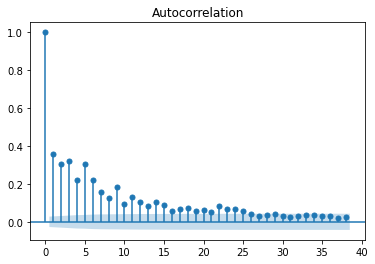

In [ ]:
plot_acf(y_train.GAZP_RV_EST_MEAN_TARGET)
plt.show()

In [ ]:
from statsmodels.tsa.api import VAR
model = VAR(y_train)
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Apr, 2022
Time:                     03:13:33
--------------------------------------------------------------------
No. of Equations:         43.0000    BIC:                   -769.735
Nobs:                     5075.00    HQIC:                  -771.317
Log likelihood:       1.65162e+06    FPE:                    0.00000
AIC:                     -772.170    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation AFKS_RV_EST_MEAN_TARGET
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.000037         0.000009            4.233           0.000
L1.AFKS_RV_EST_MEAN_TARGET          0.086638         0.014431            6.004   

In [ ]:
from arch import arch_model, unitroot, covariance

In [ ]:
X_train.loc[:, X_train.columns.str.startswith('AFKS')]

Index(['AFKS_CHL_bidask_MEAN_SHIFT1', 'AFKS_CHL_bidask_MEAN_REL_SHIFT1',
       'AFKS_CHL_bidask_RANGE_SHIFT1', 'AFKS_CHL_bidask_RANGE_REL_SHIFT1',
       'AFKS_CHL_bidask_STD_SHIFT1', 'AFKS_CHL_bidask_STD_REL_SHIFT1',
       'AFKS_CLOSE_MEAN_SHIFT1', 'AFKS_CLOSE_MEAN_REL_SHIFT1',
       'AFKS_CLOSE_RANGE_SHIFT1', 'AFKS_CLOSE_RANGE_REL_SHIFT1',
       ...
       'AFKS_RV_EST_RANGE_SHIFT3', 'AFKS_RV_EST_RANGE_REL_SHIFT3',
       'AFKS_RV_EST_STD_SHIFT3', 'AFKS_RV_EST_STD_REL_SHIFT3',
       'AFKS_VOL_MEAN_SHIFT3', 'AFKS_VOL_MEAN_REL_SHIFT3',
       'AFKS_VOL_RANGE_SHIFT3', 'AFKS_VOL_RANGE_REL_SHIFT3',
       'AFKS_VOL_STD_SHIFT3', 'AFKS_VOL_STD_REL_SHIFT3'],
      dtype='object', length=162)

In [ ]:
am = arch_model(100*X_train.AFKS_REVENUE_MEAN_SHIFT1, x=[X_train.loc[:, X_train.columns.str.startswith('AFKS')]], p=1, q=1, vol='GARCH')
res = am.fit(update_freq=1)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 74238.52192749137
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3788087.9396683923
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5883.7912926155805
Iteration:      4,   Func. Count:     31,   Neg. LLF: 11039.271930779596
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3645.5854497725018
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3648.0856582901342
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3645.028838599819
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3645.011094292159
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3645.011081451473
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3645.011075515214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3645.011081451473
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
                        Constant Mean - GARCH Model Results       

In [ ]:
forecasts = res.forecast(horizon=3, reindex=False)
print(forecasts.variance.dropna().head())

           h.1       h.2       h.3
5075  0.210841  0.216982  0.223123


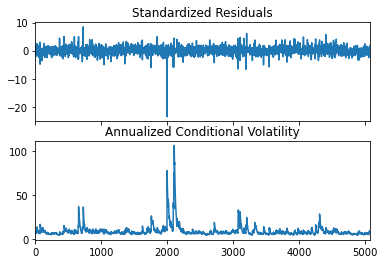

In [ ]:
fig = res.plot(annualize="D")

## EGARCH

## QGARCH

# Глубинное обучение

In [5]:
!pip install torch

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X_train = pd.read_csv('/content/drive/MyDrive/dataset_v2/X_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/dataset_v2/X_val.csv')
X_test = pd.read_csv('/content/drive/MyDrive/dataset_v2/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/dataset_v2/y_train.csv')
y_val = pd.read_csv('/content/drive/MyDrive/dataset_v2/y_val.csv')
y_test = pd.read_csv('/content/drive/MyDrive/dataset_v2/y_test.csv')

In [8]:
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

X_val.fillna(0, inplace=True)
y_val.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [9]:
X_train.loc[:, X_train.columns[(X_train.columns.str.endswith('SHIFT1')) & 
                               (~X_train.columns.str.endswith('REL_SHIFT1')) &
                             (~X_train.columns.str.startswith('year')) &
                            (~X_train.columns.str.startswith('month')) &
                            (~X_train.columns.str.startswith('day'))&
                            (~X_train.columns.str.startswith('weekday'))]] = X_train.loc[:, X_train.columns[(X_train.columns.str.endswith('SHIFT1')) & 
                               (~X_train.columns.str.endswith('REL_SHIFT1')) &
                             (~X_train.columns.str.startswith('year')) &
                            (~X_train.columns.str.startswith('month')) &
                            (~X_train.columns.str.startswith('day'))&
                            (~X_train.columns.str.startswith('weekday'))]].replace(1, 0)

In [10]:
X_val.loc[:, X_val.columns[(X_val.columns.str.endswith('SHIFT1')) & 
                               (~X_val.columns.str.endswith('REL_SHIFT1')) &
                             (~X_val.columns.str.startswith('year')) &
                            (~X_val.columns.str.startswith('month')) &
                            (~X_val.columns.str.startswith('day'))&
                            (~X_val.columns.str.startswith('weekday'))]] = X_val.loc[:, X_val.columns[(X_val.columns.str.endswith('SHIFT1')) & 
                               (~X_val.columns.str.endswith('REL_SHIFT1')) &
                             (~X_val.columns.str.startswith('year')) &
                            (~X_val.columns.str.startswith('month')) &
                            (~X_val.columns.str.startswith('day'))&
                            (~X_val.columns.str.startswith('weekday'))]].replace(1, 0)
X_test.loc[:, X_test.columns[(X_test.columns.str.endswith('SHIFT1')) & 
                              (~X_train.columns.str.endswith('REL_SHIFT1')) &
                             (~X_test.columns.str.startswith('year')) & 
                            (~X_test.columns.str.startswith('month')) &
                            (~X_test.columns.str.startswith('day'))&
                            (~X_test.columns.str.startswith('weekday'))]] = X_test.loc[:, X_test.columns[(X_test.columns.str.endswith('SHIFT1')) & 
                              (~X_train.columns.str.endswith('REL_SHIFT1')) &
                            (~X_test.columns.str.startswith('year')) &
                            (~X_test.columns.str.startswith('month')) &
                            (~X_test.columns.str.startswith('day'))&
                            (~X_test.columns.str.startswith('weekday'))]].replace(1, 0)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [12]:
torch.cuda.manual_seed(1)

## CNN

In [ ]:
X_train.loc[:, X_train.columns.str.contains('SHIFT3')]

,AFKS_CHL_bidask_MEAN_SHIFT3,AFKS_CHL_bidask_MEAN_REL_SHIFT3,AFKS_CHL_bidask_RANGE_SHIFT3,AFKS_CHL_bidask_RANGE_REL_SHIFT3,AFKS_CHL_bidask_STD_SHIFT3,AFKS_CHL_bidask_STD_REL_SHIFT3,AFKS_CLOSE_MEAN_SHIFT3,AFKS_CLOSE_MEAN_REL_SHIFT3,AFKS_CLOSE_RANGE_SHIFT3,AFKS_CLOSE_RANGE_REL_SHIFT3,...,YNDX_VOL_MEAN_REL_SHIFT3,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,year_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3
0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,2010,1.0,1.0,1.0,1.0
1,0.008551,1.000000,0.017102,1.000000,0.012093,1.000000,3.292106,1.000000,0.012714,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,2010,2.0,1.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.293575,1.001021,0.001039,0.096219,...,1.000000,0.000000,1.000000,0.000000,1.000000,2010,2.0,2.0,1.0,0.0
3,0.006334,10.000000,0.007400,10.000000,0.002663,10.000000,3.283051,0.996805,0.010202,9.816930,...,1.000000,0.000000,1.000000,0.000000,1.000000,2010,2.0,2.0,1.0,1.0
4,0.005002,0.789768,0.010005,1.352087,0.007075,2.657068,3.285263,1.000674,0.001198,0.117382,...,1.000000,0.000000,1.000000,0.000000,1.000000,2010,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,0.001189,0.185741,0.003849,0.283834,0.001431,0.216603,2.994087,0.997756,0.004008,0.129923,...,0.969906,2.384450,2.615641,0.874558,2.492874,2022,1.0,28.0,4.0,2.0
5072,0.004838,4.067971,0.014504,3.768116,0.006092,4.257062,3.017272,1.007744,0.014784,3.688597,...,0.982396,1.534325,0.643471,0.635858,0.727062,2022,1.0,31.0,0.0,0.0
5073,0.004353,0.899785,0.011940,0.823218,0.004943,0.811475,3.002858,0.995223,0.027429,1.855295,...,0.995403,0.538369,0.350883,0.232637,0.365863,2022,1.0,31.0,0.0,1.0
5074,0.001531,0.351678,0.010716,0.897494,0.004050,0.819378,3.010817,1.002651,0.027495,1.002416,...,1.045416,1.597880,2.967999,0.639157,2.747444,2022,1.0,31.0,0.0,2.0


In [13]:
X_train.drop('ind', axis=1, inplace=True)
X_train['year_SHIFT2'] = X_train['year_SHIFT1']
X_train['year_SHIFT3'] = X_train['year_SHIFT1']

In [14]:
column_to_move = X_train.pop("year_SHIFT2")

# insert column with insert(location, column_name, column_value)

X_train.insert(2322+6981//3, "year_SHIFT2", column_to_move)

column_to_move = X_train.pop("year_SHIFT3")

# insert column with insert(location, column_name, column_value)

X_train.insert(2322+6981//3*2, "year_SHIFT3", column_to_move)

In [15]:
X_val.drop('ind', axis=1, inplace=True)
X_val['year_SHIFT2'] = X_val['year_SHIFT1']
X_val['year_SHIFT3'] = X_val['year_SHIFT1']
column_to_move = X_val.pop("year_SHIFT2")
X_val.insert(2322+6981//3, "year_SHIFT2", column_to_move)
column_to_move = X_val.pop("year_SHIFT3")
X_val.insert(2322+6981//3*2, "year_SHIFT3", column_to_move)
X_val.shape[1]/3

X_test.drop('ind', axis=1, inplace=True)
X_test['year_SHIFT2'] = X_test['year_SHIFT1']
X_test['year_SHIFT3'] = X_test['year_SHIFT1']
column_to_move = X_test.pop("year_SHIFT2")
X_test.insert(2322+6981//3, "year_SHIFT2", column_to_move)
column_to_move = X_test.pop("year_SHIFT3")
X_test.insert(2322+6981//3*2, "year_SHIFT3", column_to_move)


In [ ]:
X_train.shape[1]/3


2327.0

In [ ]:
X_train.iloc[:25]

,AFKS_CHL_bidask_MEAN_SHIFT1,AFKS_CHL_bidask_MEAN_REL_SHIFT1,AFKS_CHL_bidask_RANGE_SHIFT1,AFKS_CHL_bidask_RANGE_REL_SHIFT1,AFKS_CHL_bidask_STD_SHIFT1,AFKS_CHL_bidask_STD_REL_SHIFT1,AFKS_CLOSE_MEAN_SHIFT1,AFKS_CLOSE_MEAN_REL_SHIFT1,AFKS_CLOSE_RANGE_SHIFT1,AFKS_CLOSE_RANGE_REL_SHIFT1,...,YNDX_VOL_RANGE_SHIFT3,YNDX_VOL_RANGE_REL_SHIFT3,YNDX_VOL_STD_SHIFT3,YNDX_VOL_STD_REL_SHIFT3,year_SHIFT3,month_SHIFT3,day_SHIFT3,weekday_SHIFT3,day_period_SHIFT3,ind
0,0.002810,0.328580,0.005401,0.315817,0.002174,0.179811,3.287779,0.998686,0.007164,0.563440,...,0.0,1.0,0.0,1.0,2010,1.0,1.0,1.0,1.0,1
1,0.005855,2.083942,0.007462,1.381582,0.005277,2.426595,3.290214,1.000741,0.010801,1.507788,...,0.0,1.0,0.0,1.0,2010,2.0,1.0,0.0,0.0,2
2,0.005002,0.789768,0.010005,1.352087,0.007075,2.657068,3.285263,1.000674,0.001198,0.117382,...,0.0,1.0,0.0,1.0,2010,2.0,2.0,1.0,0.0,5
3,0.012984,2.595559,0.007665,0.766112,0.005420,0.766112,3.298588,1.004056,0.005577,4.657177,...,0.0,1.0,0.0,1.0,2010,2.0,2.0,1.0,1.0,6
4,0.002543,0.195889,0.005736,0.748408,0.002583,0.476531,3.298378,0.999936,0.018338,3.287992,...,0.0,1.0,0.0,1.0,2010,2.0,2.0,1.0,2.0,7
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.286533,0.996409,0.003738,0.203846,...,0.0,1.0,0.0,1.0,2010,2.0,3.0,2.0,0.0,8
6,0.002504,10.000000,0.005009,10.000000,0.003542,10.000000,3.275240,0.996564,0.011342,3.034186,...,0.0,1.0,0.0,1.0,2010,2.0,3.0,2.0,1.0,9
7,0.001887,0.753544,0.009436,1.883860,0.004220,1.191458,3.258206,0.994799,0.009911,0.873815,...,0.0,1.0,0.0,1.0,2010,2.0,3.0,2.0,2.0,10
8,0.002589,1.371713,0.005177,0.548685,0.003661,0.867547,3.253045,0.998416,0.001469,0.148232,...,0.0,1.0,0.0,1.0,2010,2.0,4.0,3.0,0.0,11
9,0.012504,4.830026,0.025007,4.830026,0.017683,4.830026,3.202070,0.984330,0.006630,4.513145,...,0.0,1.0,0.0,1.0,2010,2.0,4.0,3.0,1.0,12


In [ ]:
torch.tensor(X_train.iloc[:2].values).T.reshape((2, 6981//3, 3))

tensor([[[2.8097e-03, 5.8553e-03, 3.2858e-01],
         [2.0839e+00, 5.4012e-03, 7.4622e-03],
         [3.1582e-01, 1.3816e+00, 2.1745e-03],
         ...,
         [1.0000e+00, 9.9677e-01, 1.5276e-02],
         [1.8865e-02, 1.0000e+00, 1.2349e+00],
         [1.0802e-02, 8.3926e-03, 1.0000e+00]],

        [[7.7697e-01, 4.5336e+00, 4.5181e+00],
         [1.0000e+00, 9.9657e-01, 1.3967e-03],
         [1.9435e-02, 1.0000e+00, 1.3915e+01],
         ...,
         [2.0100e+03, 1.0000e+00, 2.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00],
         [0.0000e+00, 1.0000e+00, 0.0000e+00]]], dtype=torch.float64)

In [ ]:
sample = torch.tensor(X_train.iloc[:25].values.astype(np.float32))
#sample = sample.view(25, 3, 6981//3)
sample.shape

torch.Size([25, 6981])

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(6981//3, 256, 3)
        self.drop1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv1d(256, 128, 1)
        self.drop2 = nn.Dropout(0.2)
        self.conv3 = nn.Conv1d(128, 64, 1)
        self.drop3 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981//3, 3)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        x = self.drop2(F.relu(self.conv2(x)))
        x = self.drop3(F.relu(self.conv3(x)))
        x = x.view(-1, 64)
        x = self.drop4(self.fc2(self.fc1(x)))
        return x

In [ ]:
model = Net()
# Set the loss function, which is used heremade error losses
criterion = nn.MSELoss()
# Set optimization function and learning rate LR
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
sample = torch.tensor(X_train.iloc[:25].values.astype(np.float32))
sample = sample.to(device)
sample.shape

torch.Size([25, 6981])

In [ ]:
len(X_train)//25

203

In [ ]:
batch_size = 25
batch_idx = 203
y_train.iloc[batch_idx*batch_size:(batch_idx+1)*batch_size]

,AFKS_RV_EST_MEAN_TARGET,AFLT_RV_EST_MEAN_TARGET,ALRS_RV_EST_MEAN_TARGET,CBOM_RV_EST_MEAN_TARGET,CHMF_RV_EST_MEAN_TARGET,DSKY_RV_EST_MEAN_TARGET,ENPG_RV_EST_MEAN_TARGET,FEES_RV_EST_MEAN_TARGET,FIVE_RV_EST_MEAN_TARGET,FIXP_RV_EST_MEAN_TARGET,...,SBERP_RV_EST_MEAN_TARGET,SNGS_RV_EST_MEAN_TARGET,SNGSP_RV_EST_MEAN_TARGET,TATN_RV_EST_MEAN_TARGET,TATNP_RV_EST_MEAN_TARGET,TCSG_RV_EST_MEAN_TARGET,TRNFP_RV_EST_MEAN_TARGET,VKCO_RV_EST_MEAN_TARGET,VTBR_RV_EST_MEAN_TARGET,YNDX_RV_EST_MEAN_TARGET
5075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def train(model, X_train, y_train,
          X_val, y_val, batch_size=200, epochs=5, steps_per_epoch=20, lr=0.001):
  # Switch model to training mode. This is necessary for layers like dropout, batchnorm, etc., which behave differently in training and evaluation mode
  model.train()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  train_loss = 0
  train_total = 0
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  model.to(device)
  # We loop over the data iterator, and feed the inputs to the network and adjust the weights.
  for epoch in range(epochs):
    for batch_idx in range(len(X_train)//batch_size-1):
      target = torch.tensor(y_train.iloc[batch_idx*batch_size:(batch_idx+1)*batch_size].values.astype(np.float32))
      # Load the input features and labels from the training dataset
      data = torch.tensor(X_train.iloc[batch_idx*batch_size:(batch_idx+1)*batch_size].values.astype(np.float32))
      data, target = data.to(device), target.to(device)
      
      # Reset the gradients to 0 for all learnable weight parameters
      optimizer.zero_grad()
      
      # Forward pass: Pass image data from training dataset, make predictions about class image belongs to (0-9 in this case)
      output = model(data)
      
      # Define our loss function, and compute the loss
      loss = torch.mean((output - target) ** 2)
      train_loss += loss.item()

      #train_correct += int(sum(predictions == target))
              
      # Reset the gradients to 0 for all learnable weight parameters
      optimizer.zero_grad()

      # Backward pass: compute the gradients of the loss w.r.t. the model's parameters
      loss.backward()
      
      # Update the neural network weights
      optimizer.step()
    
    y_pred = model(torch.tensor(X_val.values.astype(np.float32)).to(device)).cpu().detach().numpy()
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
    val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
    val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
    val_metrics = [val_rmse, val_mape, val_r2]
    if epoch==0:
      log_metrics = [val_metrics] 
    log_metrics.append(val_metrics)  
    if epoch % 10==0:
      print('Epoch [{}], r2: {}, rmse: {}'.format(epoch, val_metrics[2], val_metrics[0]))
  return log_metrics

In [ ]:
a = [[0, 1, 2]]
a.append([3, 4, 5])
a[1][2]

5

In [ ]:
model = Net()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=500)

Epoch [0], r2: -81571421096.6584, rmse: 19.060015179280775
Epoch [10], r2: -9364221.107792614, rmse: 0.2057714647730786
Epoch [20], r2: -3011104.5409841617, rmse: 0.11581635948091852
Epoch [30], r2: -418464.5331163706, rmse: 0.044966091200291915
Epoch [40], r2: -5617109.346677281, rmse: 0.13202741576739943
Epoch [50], r2: -213753.34317514396, rmse: 0.025853277933407404
Epoch [60], r2: -506.37413392216365, rmse: 0.0009967320967087317
Epoch [70], r2: -12.29666581194535, rmse: 0.00033392209602358763
Epoch [80], r2: -0.05998019464021838, rmse: 0.00021878399899368387
Epoch [90], r2: -0.0898805984125204, rmse: 0.00021928166533079037
Epoch [100], r2: -0.14886509419064964, rmse: 0.00022014754763792325
Epoch [110], r2: -0.26143650430075954, rmse: 0.0002218921854214251
Epoch [120], r2: -0.36409664781549295, rmse: 0.000223171592375701
Epoch [130], r2: -1816.4502897093735, rmse: 0.003768544297482808
Epoch [140], r2: -0.4607947623028492, rmse: 0.0002257875036857811
Epoch [150], r2: -1.0070631151981

In [ ]:
model = Net()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=300, lr=0.00001)

Epoch [0], r2: -300702619774.1849, rmse: 36.51320892919033
Epoch [10], r2: -195244899380.61075, rmse: 31.003748350083832
Epoch [20], r2: -194329793445.89832, rmse: 26.097425171945662
Epoch [30], r2: -171354456590.25735, rmse: 29.869874320146078
Epoch [40], r2: -354378247583.18665, rmse: 26.208644518582002
Epoch [50], r2: -46696222959.99187, rmse: 15.852923433679495
Epoch [60], r2: -252974961726.0902, rmse: 25.642267825981698
Epoch [70], r2: -37716878615.77845, rmse: 14.697590280697582
Epoch [80], r2: -26007433119.94509, rmse: 9.92157950614948
Epoch [90], r2: -42814612775.58641, rmse: 14.79022178198184
Epoch [100], r2: -48017049341.110214, rmse: 13.921080098558427
Epoch [110], r2: -28426381116.221264, rmse: 11.489510451656155
Epoch [120], r2: -8399300620.82696, rmse: 7.436433337867501
Epoch [130], r2: -25213792789.095173, rmse: 9.69112234882864
Epoch [140], r2: -7285070882.231708, rmse: 5.362290284306175
Epoch [150], r2: -15635501002.242613, rmse: 7.404311221861071
Epoch [160], r2: -119

In [19]:
model = Net()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=250, lr=0.001)

Epoch [0], r2: -557036347726.3331, rmse: 40.17431445234267
Epoch [10], r2: -702118186.3566127, rmse: 1.7196312122818898
Epoch [20], r2: -212011197.42452168, rmse: 1.121103960536287
Epoch [30], r2: -4960321.875333766, rmse: 0.13443618683336805
Epoch [40], r2: -6607834.739593807, rmse: 0.1568214185093434
Epoch [50], r2: -3259907.418047828, rmse: 0.11025209847745088
Epoch [60], r2: -1468041.9428089154, rmse: 0.07252842352948964
Epoch [70], r2: -614834.391464671, rmse: 0.04813021959935805
Epoch [80], r2: -173043.47510771328, rmse: 0.027672691315301107
Epoch [90], r2: -33034.83653704177, rmse: 0.012996320361857114
Epoch [100], r2: -60350.25491031654, rmse: 0.014713191381457645
Epoch [110], r2: -518911.30372859165, rmse: 0.043070535323587726
Epoch [120], r2: -221480.3071189354, rmse: 0.027968039614766422
Epoch [130], r2: -838003.1058808188, rmse: 0.05214508703052512
Epoch [140], r2: -45216.97300621182, rmse: 0.011489259482527698
Epoch [150], r2: -13400.380629640107, rmse: 0.00550321140542035

In [20]:
np.max(np.array(log_metrics), axis=0)

array([ 7.33554601e+01,  6.49318030e+15, -7.92336714e-02])

In [21]:
log_metrics[-1]

[0.00022283000352800176, 44921458963.93711, -1.161762975724159]

In [22]:
model.eval()

Net(
  (conv1): Conv1d(2327, 256, kernel_size=(3,), stride=(1,))
  (drop1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
  (drop2): Dropout(p=0.2, inplace=False)
  (conv3): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
  (drop3): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=64, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=43, bias=True)
  (drop4): Dropout(p=0.2, inplace=False)
)

In [32]:
y_pred = model(torch.tensor(X_val.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.0002212030598678735, 'mape': 44926591211.03066, 'r2': -0.914844085005795}


In [33]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-5.58459256e-04, -1.13623366e-04, -1.02822485e-05])

In [34]:
names.TICKER.unique()[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['SNGSP', 'HYDR', 'RUAL'], dtype=object)

In [35]:
y_pred = model(torch.tensor(X_test.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00020630160013114857, 'mape': 44738419502.51921, 'r2': -1.0115904146829098}


In [36]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.04949443, -0.00095923, -0.0038522 ])

In [37]:
names.TICKER.unique()[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['POGR', 'FEES', 'PLZL'], dtype=object)

In [26]:
names = pd.read_csv('/content/drive/MyDrive/dataset.csv')
names = names.drop(names.loc[names.TICKER.isin(['MVID', 'RNFT', 'SFIN', 'LNTA', 'UPRO', 'LSRG'])].index).reset_index(drop=True)

## CNN-LSTM

In [38]:
class CNN_LSTM(nn.Module):
    def __init__(self):
        super(CNN_LSTM, self).__init__()
        self.conv1 = nn.Conv1d(6981//3, 256, 3)
        self.drop1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv1d(256, 1, 1)
        self.drop2 = nn.Dropout(0.2)
        self.lstm = nn.LSTM(1, 64)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981//3, 3)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        x = self.drop2(F.relu(self.conv2(x)))
        # x is input, size (seq_len, batch, input_size)
        x, _ = self.lstm(x)
        # x is output, size (seq_len, batch, hidden_size)
        s, b, h = x.shape
        x = x.view(s * b, h)
        x = self.drop4(self.fc2(self.fc1(x)))
        return x

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.1)

Epoch [0], r2: -20196.499815180785, rmse: 0.009223343979243692
Epoch [10], r2: -1794.924327050549, rmse: 0.002666023850441423
Epoch [20], r2: -15460.553724993519, rmse: 0.007303994082063308
Epoch [30], r2: -5602.804808809976, rmse: 0.004678908958699103
Epoch [40], r2: -5418.579319790324, rmse: 0.00546881033967378
Epoch [50], r2: -1119.8369932883897, rmse: 0.0031557588528013823
Epoch [60], r2: -122468.06128898697, rmse: 0.025434460901681992
Epoch [70], r2: -42257.96121769135, rmse: 0.01488547015056754
Epoch [80], r2: -26032.9688143908, rmse: 0.012600283529720157
Epoch [90], r2: -34046.90814210698, rmse: 0.013921933985075366


In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.01)

Epoch [0], r2: -27.600103517915308, rmse: 0.00041878085081081064
Epoch [10], r2: -2.1084764963803537, rmse: 0.0002374093553679994
Epoch [20], r2: -141.35985554335008, rmse: 0.0006880903189838533
Epoch [30], r2: -60.802952329780986, rmse: 0.0004902719852703465
Epoch [40], r2: -121.40681145324254, rmse: 0.0005730363961865835
Epoch [50], r2: -102.01717559029841, rmse: 0.0005638847681233121
Epoch [60], r2: -57.8617205434091, rmse: 0.0005876825340467363
Epoch [70], r2: -54.8256809578807, rmse: 0.0004701036137981464
Epoch [80], r2: -49.578566600244294, rmse: 0.0005183783372298766
Epoch [90], r2: -5.64983152625069, rmse: 0.00026831477622176896


In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.001)

Epoch [0], r2: -18597.873760154947, rmse: 0.008710671879612185
Epoch [10], r2: -61.14067310020647, rmse: 0.0005856257818185596
Epoch [20], r2: -26.87079046705446, rmse: 0.0004152454767075987
Epoch [30], r2: -128.44683689701446, rmse: 0.0008337647925366347
Epoch [40], r2: -109.84416787585155, rmse: 0.000804516713762561
Epoch [50], r2: -19.04872821313485, rmse: 0.00038990699253472105
Epoch [60], r2: -225.79080976348726, rmse: 0.0011996025426449387
Epoch [70], r2: -21.958735888491322, rmse: 0.00042888234292317814
Epoch [80], r2: -28.217987393186135, rmse: 0.00045092004527489077
Epoch [90], r2: -11.830963528533806, rmse: 0.0003452070422663044


In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.0001)

Epoch [0], r2: -6793908.016811445, rmse: 0.15518706841505225
Epoch [10], r2: -5531.0456664239055, rmse: 0.004485600343324993
Epoch [20], r2: -456.00606317664693, rmse: 0.001313065563185237
Epoch [30], r2: -26.721711710393027, rmse: 0.00037745588045635177
Epoch [40], r2: -1.881937727719857, rmse: 0.0002364599675071109
Epoch [50], r2: -1.250389178749132, rmse: 0.0002323728133781328
Epoch [60], r2: -0.9722659131975262, rmse: 0.00022834224558846575
Epoch [70], r2: -0.8623103002566885, rmse: 0.00022873799039491066
Epoch [80], r2: -1.069625195081224, rmse: 0.00023287241653775854
Epoch [90], r2: -0.9343673153790812, rmse: 0.00023154959196007956


In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.00001)

Epoch [0], r2: -22202417.557556506, rmse: 0.2550991473699306
Epoch [10], r2: -9642608.310847608, rmse: 0.1883123809571358
Epoch [20], r2: -5888617.560907089, rmse: 0.13555277521530218
Epoch [30], r2: -3277108.6583076688, rmse: 0.09477296818586091
Epoch [40], r2: -1699050.1719956512, rmse: 0.06368113899049013
Epoch [50], r2: -743233.3618642983, rmse: 0.0404759443545975
Epoch [60], r2: -234941.19979918937, rmse: 0.022830574460244776
Epoch [70], r2: -41997.73525882845, rmse: 0.01005406599421888
Epoch [80], r2: -8642.438306863838, rmse: 0.005113310997797063
Epoch [90], r2: -3005.6406150432063, rmse: 0.0028214682910444235


In [ ]:
log_metrics[99]

{'mape': 33552486529.7387,
 'r2': -0.5555502387134477,
 'rmse': 0.0002250548776480745}

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=16, epochs=200, lr=0.00001)

Epoch [0], r2: -12431531.848544424, rmse: 0.20851436148530766
Epoch [10], r2: -4167448.600945532, rmse: 0.12983931190789202
Epoch [20], r2: -1343679.1680181522, rmse: 0.06858162065590924
Epoch [30], r2: -216594.3714235784, rmse: 0.025547709848937457
Epoch [40], r2: -4854.1276736909695, rmse: 0.004171469404079817
Epoch [50], r2: -2502.7685221219162, rmse: 0.003228386444810031
Epoch [60], r2: -1134.4237038636502, rmse: 0.0022634297720697085
Epoch [70], r2: -691.2913959007998, rmse: 0.0017707348904962574
Epoch [80], r2: -815.7562614396952, rmse: 0.0018214182409253825
Epoch [90], r2: -483.4135946616107, rmse: 0.0014187589476462703
Epoch [100], r2: -436.3745031991388, rmse: 0.0013387971103057533
Epoch [110], r2: -224.62623361384584, rmse: 0.0010010400212983122
Epoch [120], r2: -300.42133996171634, rmse: 0.0011506696400015405
Epoch [130], r2: -183.33966944010825, rmse: 0.0009235898781457808
Epoch [140], r2: -137.17186980691056, rmse: 0.000809396617226314
Epoch [150], r2: -105.27320372851862,

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=300, lr=0.00001)

Epoch [0], r2: -16461263.84138196, rmse: 0.23785636077635713
Epoch [10], r2: -12425327.242570309, rmse: 0.2048738507979205
Epoch [20], r2: -5876055.447841127, rmse: 0.1518718981912526
Epoch [30], r2: -3486349.3436109126, rmse: 0.12970136521605527
Epoch [40], r2: -2373934.844604121, rmse: 0.1103101913800901
Epoch [50], r2: -1609788.9827637374, rmse: 0.0934935646471643
Epoch [60], r2: -1110701.8962868804, rmse: 0.07914215482302595
Epoch [70], r2: -751315.0829276362, rmse: 0.06564557490918335
Epoch [80], r2: -515911.184068033, rmse: 0.054419228904682794
Epoch [90], r2: -345245.6728729193, rmse: 0.044592741050902995
Epoch [100], r2: -215276.44732293312, rmse: 0.03560531748663964
Epoch [110], r2: -148585.89996846358, rmse: 0.028715806837570173
Epoch [120], r2: -91289.77749130449, rmse: 0.021493507928608133
Epoch [130], r2: -49009.218413004295, rmse: 0.01517687251621202
Epoch [140], r2: -21917.998957631724, rmse: 0.009813966263610798
Epoch [150], r2: -10924.156336343232, rmse: 0.006108038889

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=300, lr=0.00001)

Epoch [0], r2: -15565194.688722814, rmse: 0.2290055638147817
Epoch [10], r2: -12707232.951168166, rmse: 0.20961727529142124
Epoch [20], r2: -10824147.498695577, rmse: 0.19839630329956748
Epoch [30], r2: -9662498.39876586, rmse: 0.18675017621963474
Epoch [40], r2: -8542651.444407485, rmse: 0.17625485159278292
Epoch [50], r2: -7652309.57795482, rmse: 0.165748385323716
Epoch [60], r2: -6868840.536366466, rmse: 0.15645843037302357
Epoch [70], r2: -6181491.787722212, rmse: 0.14676497471214456
Epoch [80], r2: -5604029.503822949, rmse: 0.13880914263817615
Epoch [90], r2: -4865955.390317165, rmse: 0.1297563366957882
Epoch [100], r2: -4456804.179676346, rmse: 0.12220560728793617
Epoch [110], r2: -3985019.2136066346, rmse: 0.11418182282332383
Epoch [120], r2: -3582477.0419528866, rmse: 0.10700500820478115
Epoch [130], r2: -3111127.131404028, rmse: 0.09967099791214004
Epoch [140], r2: -2776649.8664987744, rmse: 0.09280031308959105
Epoch [150], r2: -2421422.2838660995, rmse: 0.0855185321095365
Epo

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=256, epochs=400, lr=0.00001)

Epoch [0], r2: -8188333.908406212, rmse: 0.2124246764020006
Epoch [10], r2: -7511314.663363334, rmse: 0.20515839310899806
Epoch [20], r2: -6912710.464666549, rmse: 0.19970042360754775
Epoch [30], r2: -6433974.652717787, rmse: 0.19338752001814316
Epoch [40], r2: -6013707.481314763, rmse: 0.18740802133547826
Epoch [50], r2: -5644602.525498796, rmse: 0.18180765056031065
Epoch [60], r2: -5198183.286180349, rmse: 0.17389948490758753
Epoch [70], r2: -5071107.720565729, rmse: 0.1680490577582046
Epoch [80], r2: -4975500.566382236, rmse: 0.16255177546485278
Epoch [90], r2: -4801361.37572979, rmse: 0.1585013350712603
Epoch [100], r2: -4640513.261176708, rmse: 0.15507734422168556
Epoch [110], r2: -4450918.860133372, rmse: 0.15143898388623875
Epoch [120], r2: -4214541.061836861, rmse: 0.14782976164221617
Epoch [130], r2: -4079962.1634488334, rmse: 0.14527990317313322
Epoch [140], r2: -3843101.450165587, rmse: 0.14054766203263802
Epoch [150], r2: -3703592.0612513833, rmse: 0.1375845869171112
Epoch 

In [ ]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=500, lr=0.00001)

Epoch [0], r2: -11471330.568125932, rmse: 0.23543178610189586
Epoch [10], r2: -9724749.416642627, rmse: 0.21366046456115081
Epoch [20], r2: -7487921.18615941, rmse: 0.1849342116629544
Epoch [30], r2: -5247015.328890872, rmse: 0.16175529939150918
Epoch [40], r2: -3879391.942369241, rmse: 0.14070947166592845
Epoch [50], r2: -2941700.2429789742, rmse: 0.12223433721869735
Epoch [60], r2: -2066773.0194591165, rmse: 0.10168440054203202
Epoch [70], r2: -1501283.0727428093, rmse: 0.08454697810547307
Epoch [80], r2: -945441.6542203076, rmse: 0.06642691814539876
Epoch [90], r2: -519017.36405195505, rmse: 0.04878282208952925
Epoch [100], r2: -262614.0968538647, rmse: 0.03486447996204882
Epoch [110], r2: -102831.79539549365, rmse: 0.021817992990391038
Epoch [120], r2: -37651.586173117794, rmse: 0.013629325845236325
Epoch [130], r2: -13533.689062339552, rmse: 0.00831403024352643
Epoch [140], r2: -6731.500105089861, rmse: 0.006547022636455187
Epoch [150], r2: -5395.26806806816, rmse: 0.0056577957227

In [40]:
model = CNN_LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=300, lr=0.00001)

Epoch [0], r2: -9953089.406353436, rmse: 0.196857450140622
Epoch [10], r2: -6082040.981711542, rmse: 0.16716579556308972
Epoch [20], r2: -4297901.720496333, rmse: 0.14166201859093946
Epoch [30], r2: -2745355.9839063725, rmse: 0.11278026224831088
Epoch [40], r2: -1573869.190266559, rmse: 0.0856585619250422
Epoch [50], r2: -774984.6408703092, rmse: 0.06113276541397072
Epoch [60], r2: -354186.0977233189, rmse: 0.041928716312702285
Epoch [70], r2: -137554.46085952016, rmse: 0.026465469479868966
Epoch [80], r2: -42740.284514912295, rmse: 0.014649717104143686
Epoch [90], r2: -4814.818312853142, rmse: 0.005198962015534735
Epoch [100], r2: -363.0080620412037, rmse: 0.0012965403910980315
Epoch [110], r2: -3641.151172581391, rmse: 0.0035292436805285108
Epoch [120], r2: -3989.1609112334695, rmse: 0.003513843557143793
Epoch [130], r2: -1.8756694972731294, rmse: 0.00023579788028049703
Epoch [140], r2: -1.1053834778654061, rmse: 0.00022790749685271404
Epoch [150], r2: -0.8656834109393502, rmse: 0.00

In [41]:
model.eval()

CNN_LSTM(
  (conv1): Conv1d(2327, 256, kernel_size=(3,), stride=(1,))
  (drop1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(256, 1, kernel_size=(1,), stride=(1,))
  (drop2): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(1, 64)
  (fc1): Linear(in_features=64, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=43, bias=True)
  (drop4): Dropout(p=0.2, inplace=False)
)

In [42]:
y_pred = model(torch.tensor(X_val.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.0002233727199885193, 'mape': 34362966552.78004, 'r2': -0.48921235302249283}


In [43]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.00859823, -0.00799358, -0.00586214])

In [44]:
names.TICKER.unique()[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['CHMF', 'YNDX', 'PHOR'], dtype=object)

In [45]:
y_pred = model(torch.tensor(X_test.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00020809911674848523, 'mape': 34220823589.301453, 'r2': -0.5930526112107528}


In [46]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.00859823, -0.01427249, -0.00586214])

In [47]:
names.TICKER.unique()[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['CHMF', 'AFKS', 'PHOR'], dtype=object)

## CNN-LSTM (1 layer)

In [48]:
class CNN_LSTM_v2(nn.Module):
    def __init__(self):
        super(CNN_LSTM_v2, self).__init__()
        self.conv1 = nn.Conv1d(6981, 2048, 1)
        self.drop1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv1d(2048, 256, 1)
        self.drop2 = nn.Dropout(0.2)
        self.conv3 = nn.Conv1d(256, 1, 1)
        self.drop3 = nn.Dropout(0.2)
        self.lstm = nn.LSTM(1, 64)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981, 1)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        x = self.drop2(F.relu(self.conv2(x)))
        x = self.drop3(F.relu(self.conv3(x)))
        # x is input, size (seq_len, batch, input_size)
        x, _ = self.lstm(x)
        # x is output, size (seq_len, batch, hidden_size)
        s, b, h = x.shape
        x = x.view(s * b, h)
        x = self.drop4(self.fc2(self.fc1(x)))
        return x

In [49]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=300, lr=0.00001)

Epoch [0], r2: -14767320.837755753, rmse: 0.23510270068348393
Epoch [10], r2: -6409400.402512499, rmse: 0.16853957658738203
Epoch [20], r2: -3352907.029455352, rmse: 0.13141825693324247
Epoch [30], r2: -1529823.2327515222, rmse: 0.09548474413362183
Epoch [40], r2: -595430.6097957619, rmse: 0.06262978862237475
Epoch [50], r2: -182233.97323130324, rmse: 0.03473200709089682
Epoch [60], r2: -39948.16962648978, rmse: 0.01645860194602005
Epoch [70], r2: -7688.268098049965, rmse: 0.006461501912470224
Epoch [80], r2: -1220.5211149600934, rmse: 0.002301138332953021
Epoch [90], r2: -298.4489305610207, rmse: 0.0010735733459853844
Epoch [100], r2: -52.93107244027594, rmse: 0.0005062091604973183
Epoch [110], r2: -10.583858685280871, rmse: 0.00028523275917053553
Epoch [120], r2: -2.780058957838383, rmse: 0.00023756544581902402
Epoch [130], r2: -1.655922481974901, rmse: 0.00023025761867963981
Epoch [140], r2: -1.505141289920643, rmse: 0.0002281189057833716
Epoch [150], r2: -1.2850310035145684, rmse: 

In [51]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=50, lr=0.0001)

Epoch [0], r2: -10301068.207969256, rmse: 0.19884553125724064
Epoch [10], r2: -4922.607008749069, rmse: 0.004879552581958338
Epoch [20], r2: -767.1626419738278, rmse: 0.0019322398954338654
Epoch [30], r2: -35.267264284108016, rmse: 0.0004118995280488393
Epoch [40], r2: -2.35224675089984, rmse: 0.000237688087300496


In [52]:
log_metrics[-1]

[0.00023025450301919847, 74083317705.06288, -1.1995645891083373]

In [53]:
class CNN_LSTM_v2(nn.Module):
    def __init__(self):
        super(CNN_LSTM_v2, self).__init__()
        self.conv1 = nn.Conv1d(6981, 256, 1)
        self.drop1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv1d(256, 1, 1)
        self.drop2 = nn.Dropout(0.2)
        self.lstm = nn.LSTM(1, 64)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981, 1)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        x = self.drop2(F.relu(self.conv2(x)))
        # x is input, size (seq_len, batch, input_size)
        x, _ = self.lstm(x)
        # x is output, size (seq_len, batch, hidden_size)
        s, b, h = x.shape
        x = x.view(s * b, h)
        x = self.drop4(self.fc2(self.fc1(x)))
        return x

In [56]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100, lr=0.0001)
print(log_metrics[-1])

Epoch [0], r2: -7244256.520081302, rmse: 0.16594440354703197
Epoch [10], r2: -16217.534864201769, rmse: 0.008191152317968473
Epoch [20], r2: -567.8061192043475, rmse: 0.0015533744395158215
Epoch [30], r2: -2694.7266502612174, rmse: 0.00309799948644457
Epoch [40], r2: -565.4859075860849, rmse: 0.0013638879410579207
Epoch [50], r2: -163.29727085259373, rmse: 0.0008257922141871427
Epoch [60], r2: -90.45088874577822, rmse: 0.0005748008090665948
Epoch [70], r2: -76.403091031453, rmse: 0.0005218610748610261
Epoch [80], r2: -36.76381166096648, rmse: 0.00046073235379651204
Epoch [90], r2: -83.04285519940491, rmse: 0.000544417760730603
[0.00040556206897045184, 259245904757.48, -37.80858629737402]


In [61]:
class CNN_LSTM_v2(nn.Module):
    def __init__(self):
        super(CNN_LSTM_v2, self).__init__()
        self.conv1 = nn.Conv1d(6981, 1024, 1)
        self.drop1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv1d(1024, 32, 1)
        self.drop2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981, 1)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        x = self.drop2(F.relu(self.conv2(x)))
        x = x.view(-1, 32)
        x = self.drop4(self.fc2(x))
        return x

In [63]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=200, lr=0.0001)
print(log_metrics[-1])

Epoch [0], r2: -4793004946.945008, rmse: 4.18083280612592
Epoch [10], r2: -1312362015.8176758, rmse: 1.9543516829614926
Epoch [20], r2: -64471507.13697452, rmse: 0.4534874206896837
Epoch [30], r2: -2953926.020161266, rmse: 0.11522758138735417
Epoch [40], r2: -133170210.66342707, rmse: 0.6930152905217883
Epoch [50], r2: -4455381.824065662, rmse: 0.13038909961264405
Epoch [60], r2: -6021570.475299082, rmse: 0.15115675511772067
Epoch [70], r2: -2039624.7591183789, rmse: 0.09812644652610045
Epoch [80], r2: -1709783.9897574515, rmse: 0.09011820180194906
Epoch [90], r2: -56204086.321256995, rmse: 0.5811400548916349
Epoch [100], r2: -5496008.412927758, rmse: 0.14423471017062292
Epoch [110], r2: -1546899.9157729226, rmse: 0.07723938530724805
Epoch [120], r2: -297163.7864661654, rmse: 0.03954090728758357
Epoch [130], r2: -118431.40519654844, rmse: 0.025369482310657613
Epoch [140], r2: -215418031.4379803, rmse: 0.812116323893488
Epoch [150], r2: -3961736.098344736, rmse: 0.09750541262266825
Epoc

In [64]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=200, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -4375876.119485162, rmse: 0.12338672028975119
Epoch [10], r2: -1264111.64025158, rmse: 0.052923674597711155
Epoch [20], r2: -184884.18870409945, rmse: 0.01595921016375328
Epoch [30], r2: -9766.469117488212, rmse: 0.0032198179432365087
Epoch [40], r2: -112.52168723803281, rmse: 0.00039840925279038396
Epoch [50], r2: -0.20288689815839578, rmse: 0.000219122020268363
Epoch [60], r2: -0.04183986449906471, rmse: 0.00021849417165071186
Epoch [70], r2: -0.044277119006142125, rmse: 0.00021883554583464212
Epoch [80], r2: -0.05045764925816645, rmse: 0.00021878499225124918
Epoch [90], r2: -0.06450992476957369, rmse: 0.00021881894204575398
Epoch [100], r2: -0.09047807902596557, rmse: 0.00021938210654422782
Epoch [110], r2: -0.1318560761978587, rmse: 0.0002198035461022648
Epoch [120], r2: -0.170223305996626, rmse: 0.00021989966206576096
Epoch [130], r2: -0.24317546693173472, rmse: 0.00022071828973316951
Epoch [140], r2: -0.413162608759208, rmse: 0.00022329877567186222
Epoch [150], r2:

In [65]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=512, epochs=200, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -4353965.687123156, rmse: 0.13424289831752104
Epoch [10], r2: -5465205.046878583, rmse: 0.14221237116735805
Epoch [20], r2: -5290863.535103978, rmse: 0.14077291107487058
Epoch [30], r2: -5087526.35913393, rmse: 0.1397840535220601
Epoch [40], r2: -4906641.312522887, rmse: 0.13681250675555398
Epoch [50], r2: -4607561.0949662905, rmse: 0.13471514832216389
Epoch [60], r2: -4413183.357097112, rmse: 0.1324289893664435
Epoch [70], r2: -4137955.2465372, rmse: 0.1290652943274966
Epoch [80], r2: -3844929.3776259455, rmse: 0.12609013762241886
Epoch [90], r2: -3683582.4338984005, rmse: 0.12376048613810914
Epoch [100], r2: -3366574.087629415, rmse: 0.12016496815426687
Epoch [110], r2: -3183827.26560119, rmse: 0.11720774652902186
Epoch [120], r2: -2935429.5628670077, rmse: 0.11340812667468647
Epoch [130], r2: -2680150.615152861, rmse: 0.10971411500484743
Epoch [140], r2: -2513154.985062022, rmse: 0.10718830103826182
Epoch [150], r2: -2328899.9294934887, rmse: 0.10361629263536669
Epoch

In [69]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=200, lr=0.1)
print(log_metrics[-1])

Epoch [0], r2: -100842926.83913018, rmse: 0.6187826846292019
Epoch [10], r2: -205309619.12723067, rmse: 0.8942160184941783
Epoch [20], r2: -1426573.2877656855, rmse: 0.10896655834379691
Epoch [30], r2: -14700.985897179195, rmse: 0.010777243404540853
Epoch [40], r2: -3.4657836988750685, rmse: 0.000273794363589419
Epoch [50], r2: -0.07751782239303064, rmse: 0.00021898277373396576
Epoch [60], r2: -0.16193351801147707, rmse: 0.00021998256253101197
Epoch [70], r2: -0.3099618541249468, rmse: 0.00022016962622085817
Epoch [80], r2: -0.35987542495393116, rmse: 0.00022141377602825186
Epoch [90], r2: -0.4225118053336322, rmse: 0.00022508296490326388
Epoch [100], r2: -0.6774027702246521, rmse: 0.0002254103749569189
Epoch [110], r2: -1.7537983082538264, rmse: 0.00023088137053809213
Epoch [120], r2: -1.8691036764241895, rmse: 0.0002416010529040966
Epoch [130], r2: -1750.0278839373975, rmse: 0.0013721356834924664
Epoch [140], r2: -674.1699004006113, rmse: 0.0014096299982048804
Epoch [150], r2: -1364.

In [70]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=200, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -18521340.59067082, rmse: 0.2794156509313332
Epoch [10], r2: -363417.5122800035, rmse: 0.04608374500793375
Epoch [20], r2: -995.1347801338776, rmse: 0.002595694905238415
Epoch [30], r2: -0.1066255800254936, rmse: 0.00021911448452352941
Epoch [40], r2: -0.1798367099342153, rmse: 0.00022022463197301215
Epoch [50], r2: -0.281150674256093, rmse: 0.00022058109113333007
Epoch [60], r2: -0.48071652304272455, rmse: 0.000222906424123776
Epoch [70], r2: -0.1734550317131345, rmse: 0.0002205445020979721
Epoch [80], r2: -0.23467671211263585, rmse: 0.00021964171017056425
Epoch [90], r2: -0.25707344016367323, rmse: 0.00022255470930290203
Epoch [100], r2: -1.0938342588889114, rmse: 0.0002382616613075983
Epoch [110], r2: -1.5675904206543447, rmse: 0.0003934804370705983
Epoch [120], r2: -6.4000543870187725, rmse: 0.00040582538524668396
Epoch [130], r2: -7.150824582335599, rmse: 0.0003978495589390704
Epoch [140], r2: -40.45696851908928, rmse: 0.0006401567962278083
Epoch [150], r2: -273.541

In [71]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=200, lr=0.15)
print(log_metrics[-1])

Epoch [0], r2: -191965400.69035092, rmse: 0.861014305431608
Epoch [10], r2: -1872830801.4644842, rmse: 2.767418522095306
Epoch [20], r2: -692285788.7855028, rmse: 1.7841515481740347
Epoch [30], r2: -105634870.89095794, rmse: 0.7781271204117812
Epoch [40], r2: -3725368548.797469, rmse: 3.3425783424962483
Epoch [50], r2: -705324500.2787485, rmse: 1.4574546859082178
Epoch [60], r2: -18919101.33849484, rmse: 0.25409589476753885
Epoch [70], r2: -7419.7892780511265, rmse: 0.006994459584107026
Epoch [80], r2: -0.04555987081088298, rmse: 0.00021893468987078585
Epoch [90], r2: -0.05274232409118043, rmse: 0.00021864529563245195
Epoch [100], r2: -0.09029206434940941, rmse: 0.0002194176418694359
Epoch [110], r2: -0.20059519430924697, rmse: 0.00022021699459040642
Epoch [120], r2: -0.3493109730113914, rmse: 0.0002220337190314499
Epoch [130], r2: -0.4809902900899836, rmse: 0.00022442571407245245
Epoch [140], r2: -0.5404054814983585, rmse: 0.00022334029069085015
Epoch [150], r2: -1.0431237384032446, r

In [72]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=200, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -29878202.715361796, rmse: 0.37082137302312324
Epoch [10], r2: -2480175.2713891435, rmse: 0.11865787301904644
Epoch [20], r2: -403676893485.35645, rmse: 36.94319510681339
Epoch [30], r2: -738.43317563487, rmse: 0.0024816522462630546
Epoch [40], r2: -1.276379122708415, rmse: 0.00024122274947670563
Epoch [50], r2: -0.04013444599930569, rmse: 0.0002184545815708855
Epoch [60], r2: -95461978887.43813, rmse: 18.690945681928838
Epoch [70], r2: -685013899885.56, rmse: 49.65932996492467
Epoch [80], r2: -0.05762388973677719, rmse: 0.0002185936411356151
Epoch [90], r2: -2019698677858.6653, rmse: 72.76184905469354
Epoch [100], r2: -0.10171183201585034, rmse: 0.00021937544757809718
Epoch [110], r2: -607079230678.7805, rmse: 42.68297570254548
Epoch [120], r2: -0.2943539665512343, rmse: 0.00022168548264425838
Epoch [130], r2: -0.19021079839232571, rmse: 0.0002200591641652174
Epoch [140], r2: -0.3267896080520954, rmse: 0.00022143435864001318
Epoch [150], r2: -0.3714822672182676, rmse: 0

In [74]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=200, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -38060861.28009062, rmse: 0.3205867914879899
Epoch [10], r2: -14279422.986921323, rmse: 0.17124092260944965
Epoch [20], r2: -3595224.083357005, rmse: 0.07387996400722392
Epoch [30], r2: -264004.5022202062, rmse: 0.01822040156779002
Epoch [40], r2: -1246.9942437716375, rmse: 0.001225776938101446
Epoch [50], r2: -0.11410403082959837, rmse: 0.0002194332167563745
Epoch [60], r2: -0.1479058092780295, rmse: 0.00021987487467754567
Epoch [70], r2: -0.19667563911966232, rmse: 0.0002200821930616348
Epoch [80], r2: -0.34726174914544117, rmse: 0.0002218472756345988
Epoch [90], r2: -0.6824097541918723, rmse: 0.0002258788228117101
Epoch [100], r2: -0.8758609275414975, rmse: 0.0002272836491242104
Epoch [110], r2: -54.24002670007024, rmse: 0.0005285395654009489
Epoch [120], r2: -9.478218261780052, rmse: 0.00035251580502081056
Epoch [130], r2: -29.046647486184135, rmse: 0.0003567415021469114
Epoch [140], r2: -73.42898202309274, rmse: 0.0008693740395518123
Epoch [150], r2: -130.9294904073

In [75]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=200, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -20162936.644372195, rmse: 0.3006059057415907
Epoch [10], r2: -17461295.978793845, rmse: 0.2812028838575296
Epoch [20], r2: -7680779.450668145, rmse: 0.17494548702871376
Epoch [30], r2: -2821341.611444082, rmse: 0.10602271292528838
Epoch [40], r2: -892466.2581313142, rmse: 0.062138954892559335
Epoch [50], r2: -252238.23819908107, rmse: 0.03487588676547497
Epoch [60], r2: -64780.20186974385, rmse: 0.01822497243509384
Epoch [70], r2: -14443.065212676212, rmse: 0.008601262749175583
Epoch [80], r2: -2556.9082390056033, rmse: 0.0035590178565550953
Epoch [90], r2: -327.72810566236853, rmse: 0.0012576355625432765
Epoch [100], r2: -28.10801831316686, rmse: 0.0004154947436659904
Epoch [110], r2: -1.5215971053724353, rmse: 0.00023263569461501996
Epoch [120], r2: -0.08709655884788373, rmse: 0.0002191776667671463
Epoch [130], r2: -0.04295126558324454, rmse: 0.00021843068172913065
Epoch [140], r2: -0.04270654342384699, rmse: 0.00021884654979682707
Epoch [150], r2: -0.0445107060903794

In [76]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=500, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -18443680.255711146, rmse: 0.26001117585207156
Epoch [10], r2: -40445895.71174015, rmse: 0.3608313721295094
Epoch [20], r2: -13186358.95552331, rmse: 0.21454405761770118
Epoch [30], r2: -2494627.1483589406, rmse: 0.10232615713384961
Epoch [40], r2: -247809.52755887737, rmse: 0.03712794425017902
Epoch [50], r2: -11512.981729998755, rmse: 0.009098034364937039
Epoch [60], r2: -185.26655918875372, rmse: 0.001212409213293336
Epoch [70], r2: -0.5647608246468142, rmse: 0.00022694088724531516
Epoch [80], r2: -0.04290569872959938, rmse: 0.00021854638910923967
Epoch [90], r2: -0.046450593030327704, rmse: 0.00021864271211005304
Epoch [100], r2: -0.048906831676386986, rmse: 0.0002185420282603804
Epoch [110], r2: -0.05602716510087307, rmse: 0.0002188327560445264
Epoch [120], r2: -0.08069986019398791, rmse: 0.00021876159996551806
Epoch [130], r2: -0.10863498825184424, rmse: 0.00021939304361795283
Epoch [140], r2: -0.16850182781500117, rmse: 0.00021989294148761832
Epoch [150], r2: -0.2

In [73]:
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=200, lr=0.02)
print(log_metrics[-1])

Epoch [0], r2: -5129837.130269648, rmse: 0.1610300081438447
Epoch [10], r2: -890980.480844155, rmse: 0.07234860863792944
Epoch [20], r2: -5901131.157505116, rmse: 0.14843247972670504
Epoch [30], r2: -46373.332233085115, rmse: 0.012319609857131982
Epoch [40], r2: -168.31967264867114, rmse: 0.0008952416341037373
Epoch [50], r2: -0.178892151704795, rmse: 0.000220928413118418
Epoch [60], r2: -0.04695053408195364, rmse: 0.00021861756427951902
Epoch [70], r2: -0.044466011096870955, rmse: 0.00021871175684748376
Epoch [80], r2: -0.043675077868893054, rmse: 0.00021830674975221098
Epoch [90], r2: -0.0560721761902339, rmse: 0.0002190220470207566
Epoch [100], r2: -0.08373342485486816, rmse: 0.00021980916469333507
Epoch [110], r2: -0.11492596285571649, rmse: 0.0002196353045345793
Epoch [120], r2: -0.21028974613683088, rmse: 0.0002207905793004654
Epoch [130], r2: -0.2538740731766215, rmse: 0.00022154737336454
Epoch [140], r2: -0.32010668817864585, rmse: 0.00022229173413886778
Epoch [150], r2: -0.411

In [88]:
#best_r2 among cnn_1d
model = CNN_LSTM_v2()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=150, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -32211679.40277693, rmse: 0.3223092969043799
Epoch [10], r2: -14903041.885926683, rmse: 0.2630180426689478
Epoch [20], r2: -6554378.457298512, rmse: 0.1899951406099909
Epoch [30], r2: -3166052.242408776, rmse: 0.1359489895527541
Epoch [40], r2: -1580911.7163149565, rmse: 0.09455049562903307
Epoch [50], r2: -757662.2227232654, rmse: 0.06298802591603633
Epoch [60], r2: -326702.91655155213, rmse: 0.03935632328115984
Epoch [70], r2: -122735.0904080787, rmse: 0.023043162172497487
Epoch [80], r2: -37645.832332640806, rmse: 0.012316445469226516
Epoch [90], r2: -9982.193450394363, rmse: 0.006146104795157975
Epoch [100], r2: -1948.1437019208292, rmse: 0.002667466691364975
Epoch [110], r2: -277.1441938107466, rmse: 0.0010145854084690877
Epoch [120], r2: -27.249445009441075, rmse: 0.00037852655260958777
Epoch [130], r2: -1.5821919085267293, rmse: 0.00023057064742463673
Epoch [140], r2: -0.0891039436725839, rmse: 0.00021889911940669476
[0.00021885638928522338, 14863058486.971552, -0

In [89]:
model.eval()

CNN_LSTM_v2(
  (conv1): Conv1d(6981, 1024, kernel_size=(1,), stride=(1,))
  (drop1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(1024, 32, kernel_size=(1,), stride=(1,))
  (drop2): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=43, bias=True)
  (drop4): Dropout(p=0.2, inplace=False)
)

In [90]:
y_pred = model(torch.tensor(X_val.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00021767695262227545, 'mape': 14756018880.734875, 'r2': -0.011104880967642812}


In [91]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-9.59949664e-05, -2.83715173e-05, -8.87798669e-05])

In [92]:
names.TICKER.unique()[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['IRAO', 'PHOR', 'FIVE'], dtype=object)

In [93]:
y_pred = model(torch.tensor(X_test.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00020273837704256335, 'mape': 14733066262.083595, 'r2': -0.008749998419908955}


In [94]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.00666143, -0.00432344, -0.00611807])

In [95]:
names.TICKER.unique()[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['SNGS', 'MTSS', 'LKOH'], dtype=object)

## LSTM

In [98]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.conv1 = nn.Conv1d(6981, 1, 1)
        self.drop1 = nn.Dropout(0.2)
        self.lstm = nn.LSTM(1, 64)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981, 1)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        # x is input, size (seq_len, batch, input_size)
        x, _ = self.lstm(x)
        # x is output, size (seq_len, batch, hidden_size)
        s, b, h = x.shape
        x = x.view(s * b, h)
        x = self.drop4(self.fc2(self.fc1(x)))
        return x

In [99]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=150, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -513390.26223460067, rmse: 0.04194486257429679
Epoch [10], r2: -790.8716440784348, rmse: 0.001663135479081208
Epoch [20], r2: -202.30017767652257, rmse: 0.0009027870082910519
Epoch [30], r2: -768.5434286503705, rmse: 0.0016006045792395444
Epoch [40], r2: -43.68871274149391, rmse: 0.00045357049003472876
Epoch [50], r2: -297.0176476633715, rmse: 0.0010356134315491353
Epoch [60], r2: -90.85290325008118, rmse: 0.0006178345621721206
Epoch [70], r2: -23.17204452091003, rmse: 0.0003855747656403943
Epoch [80], r2: -151.95870919441947, rmse: 0.0009503264840267767
Epoch [90], r2: -141.58076469872947, rmse: 0.0008851862591896507
Epoch [100], r2: -414.1927085571875, rmse: 0.001280927906047562
Epoch [110], r2: -193.30929442120473, rmse: 0.0009866163440431853
Epoch [120], r2: -178.76589418306398, rmse: 0.0009083053131366831
Epoch [130], r2: -323.4313461424612, rmse: 0.001231745747342899
Epoch [140], r2: -125.55192912013914, rmse: 0.0007732499419607107
[0.00116146112245023, 65862166599

In [100]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=150, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -52757.95946501463, rmse: 0.018013629578936347
Epoch [10], r2: -52.282060724839084, rmse: 0.0005025579513601602
Epoch [20], r2: -13.398594899183786, rmse: 0.00031949647905765856
Epoch [30], r2: -14.590440145400244, rmse: 0.000321312247637685
Epoch [40], r2: -6.451848807473412, rmse: 0.00028301705730768945
Epoch [50], r2: -15.69640050957147, rmse: 0.00032595382662662314
Epoch [60], r2: -31.8447540752352, rmse: 0.00041915283406799994
Epoch [70], r2: -141.2243819313669, rmse: 0.0008027520608526981
Epoch [80], r2: -7.606953419774313, rmse: 0.00029757070468332486
Epoch [90], r2: -546.2232064531723, rmse: 0.0014212114015526001
Epoch [100], r2: -56.7919589071559, rmse: 0.0004763311185279555
Epoch [110], r2: -511.42676685242185, rmse: 0.0015645647503592954
Epoch [120], r2: -4.9160582899735354, rmse: 0.000275303012980013
Epoch [130], r2: -17.683204093993215, rmse: 0.0003559634021819133
Epoch [140], r2: -73.51169752968035, rmse: 0.0005891101396148017
[0.00040930677782204637, 34817

In [101]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=150, lr=0.005)
print(log_metrics[-1])

Epoch [0], r2: -106796.10723950343, rmse: 0.02031394803782946
Epoch [10], r2: -696.6463817546236, rmse: 0.001796502596053508
Epoch [20], r2: -846.0176283809982, rmse: 0.0020091008515047033
Epoch [30], r2: -146.5644455344793, rmse: 0.0008631110167584093
Epoch [40], r2: -52.371834223305264, rmse: 0.0005484079928498554
Epoch [50], r2: -41.308835404788006, rmse: 0.00045444654746776134
Epoch [60], r2: -96.43493362041626, rmse: 0.0006935543690161223
Epoch [70], r2: -106.14773659410488, rmse: 0.0007105219995483118
Epoch [80], r2: -203.20944995368103, rmse: 0.0009515083381293492
Epoch [90], r2: -226.43184869696097, rmse: 0.0010445665929744385
Epoch [100], r2: -306.0848234622046, rmse: 0.0011802730321509676
Epoch [110], r2: -113.93743871536635, rmse: 0.0006981785329559499
Epoch [120], r2: -146.38265777854272, rmse: 0.0008460533923911979
Epoch [130], r2: -217.43731609179633, rmse: 0.000952044898977769
Epoch [140], r2: -231.25226227955335, rmse: 0.0010061755612213827
[0.0010190686034697635, 58802

In [104]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=300, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -5742442.506663305, rmse: 0.1335538566656229
Epoch [10], r2: -2660.780178778186, rmse: 0.003555730501389392
Epoch [20], r2: -846.9487589361139, rmse: 0.0019605777106066094
Epoch [30], r2: -307.71174058821833, rmse: 0.0011969103474946453
Epoch [40], r2: -88.7279641199082, rmse: 0.0006763962925830543
Epoch [50], r2: -148.8811903845475, rmse: 0.0008412219879651518
Epoch [60], r2: -55.86225872871787, rmse: 0.0005396183806669993
Epoch [70], r2: -27.338533161329497, rmse: 0.0004047551132157486
Epoch [80], r2: -53.512977207509806, rmse: 0.0005056351389616535
Epoch [90], r2: -47.75912592663581, rmse: 0.00046037129418562134
Epoch [100], r2: -24.02096037323164, rmse: 0.00040274709376880767
Epoch [110], r2: -45.8750530024506, rmse: 0.0004858983715495696
Epoch [120], r2: -49.225280476891704, rmse: 0.00045361931302371057
Epoch [130], r2: -50.610717271005186, rmse: 0.0005069714064040961
Epoch [140], r2: -97.28127365061204, rmse: 0.0007945162171196303
Epoch [150], r2: -24.5995580335325

In [105]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=500, lr=0.0001)
print(log_metrics[-1])

Epoch [0], r2: -10758613.969047125, rmse: 0.21266709303569914
Epoch [10], r2: -3828668.749139469, rmse: 0.11417159387603262
Epoch [20], r2: -574100.0596130568, rmse: 0.04738958188610411
Epoch [30], r2: -70269.50390901766, rmse: 0.016596347962860632
Epoch [40], r2: -13647.921817038852, rmse: 0.0080644131343922
Epoch [50], r2: -9852.988316949606, rmse: 0.0070135752658129985
Epoch [60], r2: -7846.69771269707, rmse: 0.006454858446967391
Epoch [70], r2: -5756.714288881712, rmse: 0.005703554501654804
Epoch [80], r2: -5304.967545362286, rmse: 0.004779863718366085
Epoch [90], r2: -3185.2597948468574, rmse: 0.0043929733078724
Epoch [100], r2: -2148.52039790097, rmse: 0.0037185913377061237
Epoch [110], r2: -1682.1427931465407, rmse: 0.0030778861235827982
Epoch [120], r2: -1563.27981655192, rmse: 0.002778382359063643
Epoch [130], r2: -1307.8776343592212, rmse: 0.0025908959964185347
Epoch [140], r2: -711.6392783321788, rmse: 0.0018606305880762351
Epoch [150], r2: -615.771274306085, rmse: 0.0016969

In [106]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -944.7702779534083, rmse: 0.002026467400527771
Epoch [10], r2: -46.47829108198826, rmse: 0.0005143404255713409
Epoch [20], r2: -82.86361022259915, rmse: 0.0005375345770078304
Epoch [30], r2: -16.80691344563552, rmse: 0.00037032113036004406
Epoch [40], r2: -33.54909547014219, rmse: 0.00041398980684158483
Epoch [50], r2: -21.34026356291539, rmse: 0.0004152534364377238
Epoch [60], r2: -128.9074386796288, rmse: 0.0007601400083506129
Epoch [70], r2: -49.26536426995361, rmse: 0.0005075879057561163
Epoch [80], r2: -3.864554057136208, rmse: 0.00026162242548114856
Epoch [90], r2: -6.694683712316671, rmse: 0.0002769364604582642
Epoch [100], r2: -42.51468616191155, rmse: 0.00037764216957672384
Epoch [110], r2: -25.927229061494312, rmse: 0.0004076014443498945
Epoch [120], r2: -48.27172894315832, rmse: 0.0004462922684820373
Epoch [130], r2: -11.033566367516123, rmse: 0.0003276162006561792
Epoch [140], r2: -6.311811915377822, rmse: 0.0003001871417000913
[0.00039318921217596593, 340700

In [107]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=150, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -1516.6676927630742, rmse: 0.002364957434686391
Epoch [10], r2: -89.07996716211788, rmse: 0.0006977627723393615
Epoch [20], r2: -279.1846074002505, rmse: 0.0012189312143809296
Epoch [30], r2: -3574.3664478874293, rmse: 0.0038553358399834228
Epoch [40], r2: -55.99562787369335, rmse: 0.000503854034222289
Epoch [50], r2: -37.34063206953991, rmse: 0.00039619164533869405
Epoch [60], r2: -270.36501386500527, rmse: 0.0011099854012751834
Epoch [70], r2: -256.63681886492856, rmse: 0.0008616816206031659
Epoch [80], r2: -146.96836818224952, rmse: 0.0008219984064436038
Epoch [90], r2: -100.24572039796615, rmse: 0.0007444563286229982
Epoch [100], r2: -61.97089639524193, rmse: 0.0005170950277111392
Epoch [110], r2: -231.82359289001448, rmse: 0.0011587599714199413
Epoch [120], r2: -27.743842891703867, rmse: 0.00040178867821311065
Epoch [130], r2: -27.13435634347031, rmse: 0.0004166007606210594
Epoch [140], r2: -30.341931823216406, rmse: 0.00046422672113131014
[0.00047188560724754555, 3

In [113]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=256, epochs=300, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -438444.401083059, rmse: 0.038463896997143435
Epoch [10], r2: -2232.87780596703, rmse: 0.002403226726451926
Epoch [20], r2: -261.86421878656625, rmse: 0.001061346204938688
Epoch [30], r2: -304.6758996506143, rmse: 0.0009016989823326102
Epoch [40], r2: -130.62654357220447, rmse: 0.0006635600194269739
Epoch [50], r2: -269.96428585312924, rmse: 0.0009463738011186584
Epoch [60], r2: -2012.4829241270484, rmse: 0.002551973583791665
Epoch [70], r2: -267.35822631527714, rmse: 0.0009935917063986616
Epoch [80], r2: -343.8719976199755, rmse: 0.0012961489271283815
Epoch [90], r2: -246.20605702152514, rmse: 0.0010677456091805165
Epoch [100], r2: -171.10174697102536, rmse: 0.0008320777216462946
Epoch [110], r2: -75.65638315277249, rmse: 0.0007085012362058229
Epoch [120], r2: -202.5004621694932, rmse: 0.0008730016208281788
Epoch [130], r2: -334.92222550337834, rmse: 0.0012647215550651133
Epoch [140], r2: -4219.323272868277, rmse: 0.0034533633033163548
Epoch [150], r2: -622.386783709250

In [109]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=512, epochs=150, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -4992686.767702905, rmse: 0.11411349133415898
Epoch [10], r2: -830.0986303789847, rmse: 0.0018740634597046964
Epoch [20], r2: -2137.748818128067, rmse: 0.0028370125838479143
Epoch [30], r2: -34.92741330407176, rmse: 0.00047219660891048554
Epoch [40], r2: -26.45759554208043, rmse: 0.0004025676438489851
Epoch [50], r2: -124.65787665003128, rmse: 0.000805665814175152
Epoch [60], r2: -17.97929375716487, rmse: 0.0003686561387209301
Epoch [70], r2: -16.176513219929166, rmse: 0.00033766951036585594
Epoch [80], r2: -13.574619880367772, rmse: 0.00032520899387760457
Epoch [90], r2: -14.359690688795505, rmse: 0.0003131005952898209
Epoch [100], r2: -8.841234262702615, rmse: 0.0002925353103145975
Epoch [110], r2: -13.446896721405228, rmse: 0.000310707172305503
Epoch [120], r2: -120.71906385404124, rmse: 0.0006352945717255178
Epoch [130], r2: -574.3239148009791, rmse: 0.0014199717112103193
Epoch [140], r2: -2368.3070202593262, rmse: 0.0029605222050418717
[0.0013986320232958207, 665739

In [110]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=300, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -17413.443988775936, rmse: 0.008169482698097374
Epoch [10], r2: -503.1652650162261, rmse: 0.0015072850624761973
Epoch [20], r2: -442.0614012228402, rmse: 0.0013154579292949866
Epoch [30], r2: -238.20900995276236, rmse: 0.0008770644425276552
Epoch [40], r2: -204.40509361659832, rmse: 0.0008283607189350607
Epoch [50], r2: -82.94739846824334, rmse: 0.0006724179531063322
Epoch [60], r2: -620.4176695890229, rmse: 0.0013681392200664024
Epoch [70], r2: -89.68055238451733, rmse: 0.0007047733334036478
Epoch [80], r2: -237.6134405345429, rmse: 0.0008484647512585317
Epoch [90], r2: -29.62681583377967, rmse: 0.000377158145724343
Epoch [100], r2: -87.64939462541999, rmse: 0.0005396366816910794
Epoch [110], r2: -133.75793948593008, rmse: 0.0007037068472203625
Epoch [120], r2: -209.22293490298583, rmse: 0.0008188703456524449
Epoch [130], r2: -13.381014233708866, rmse: 0.00032968452061359494
Epoch [140], r2: -13.996857677282753, rmse: 0.00031446958991422516
Epoch [150], r2: -6.139926930

In [111]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=300, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -1308317.5090053442, rmse: 0.06372357091574916
Epoch [10], r2: -427.2746364164405, rmse: 0.0012353186180530838
Epoch [20], r2: -202.61456048912945, rmse: 0.0008791771993599404
Epoch [30], r2: -147.46041157940084, rmse: 0.0007395051255796832
Epoch [40], r2: -188.59229670188148, rmse: 0.0008178133335724119
Epoch [50], r2: -126.06534791436357, rmse: 0.0007837330616811478
Epoch [60], r2: -119.90259291612958, rmse: 0.000746169397870305
Epoch [70], r2: -145.399564829144, rmse: 0.0009227332739369534
Epoch [80], r2: -55.35517455887123, rmse: 0.0005499950613772908
Epoch [90], r2: -60.30906756454658, rmse: 0.0005317261723074958
Epoch [100], r2: -96.840818277837, rmse: 0.0006102330570447314
Epoch [110], r2: -41.31651636846392, rmse: 0.00041822576017558295
Epoch [120], r2: -110.30243302677455, rmse: 0.0005847697595108388
Epoch [130], r2: -48.226977181501276, rmse: 0.0004841111011820364
Epoch [140], r2: -27.347032807008958, rmse: 0.0003761674693088422
Epoch [150], r2: -54.77965830530

In [112]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=256, epochs=300, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -17024589.823926605, rmse: 0.2096821220773679
Epoch [10], r2: -43578.954248465896, rmse: 0.010374540026147848
Epoch [20], r2: -24475.318379950975, rmse: 0.008048767724815742
Epoch [30], r2: -16827.121474683765, rmse: 0.006378877851333695
Epoch [40], r2: -10496.46625964826, rmse: 0.004995757937554561
Epoch [50], r2: -7647.998213145952, rmse: 0.004399868494206276
Epoch [60], r2: -4644.914359785247, rmse: 0.0033441351962486157
Epoch [70], r2: -3426.3148817888386, rmse: 0.002905108012304758
Epoch [80], r2: -1429.2790162366298, rmse: 0.0020670267208879214
Epoch [90], r2: -1109.4517715792354, rmse: 0.0016382016256898985
Epoch [100], r2: -619.7762531381497, rmse: 0.0011987949067318788
Epoch [110], r2: -274.515158519876, rmse: 0.0009114137227257091
Epoch [120], r2: -155.3929856854942, rmse: 0.0007349512816086144
Epoch [130], r2: -136.59609952057667, rmse: 0.0007115241565525697
Epoch [140], r2: -100.01852068272788, rmse: 0.0006193780966611218
Epoch [150], r2: -91.79095059934721, 

## LSTM 3 layers

In [128]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.conv1 = nn.Conv1d(6981//3, 3, 1)
        self.drop1 = nn.Dropout(0.2)
        self.lstm = nn.LSTM(3, 64)
        self.fc1 = nn.Linear(64, 8)
        self.fc2 = nn.Linear(8*3, 43)
        self.drop4 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 6981//3, 3)
        x = self.conv1(x)
        
        x = F.relu(x)
        x = self.drop1(x)
        # x is input, size (seq_len, batch, input_size)
        x, _ = self.lstm(x)
        # x is output, size (seq_len, batch, hidden_size)
        s, b, h = x.shape
        x = x.view(s * b, h)
        x = self.fc1(x)
        x = x.view(-1, 8*3)
        x = self.drop4(self.fc2(x))
        return x

In [129]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.01)
print(log_metrics[-1])

Epoch [0], r2: -7793.507259677951, rmse: 0.0050777941648253635
Epoch [10], r2: -650.1522400856525, rmse: 0.0012951211971497037
Epoch [20], r2: -167.57701043271288, rmse: 0.0007577212228803894
Epoch [30], r2: -70.03782823109027, rmse: 0.0005300626848279604
Epoch [40], r2: -27.32177635753977, rmse: 0.0004277084056431497
Epoch [50], r2: -56.97336195088091, rmse: 0.0005248272112924723
Epoch [60], r2: -64.72768743956348, rmse: 0.0005181303548726249
Epoch [70], r2: -197.03310284968313, rmse: 0.000961283887253342
Epoch [80], r2: -82.24452108257272, rmse: 0.0006691726675052786
Epoch [90], r2: -61.104940030005736, rmse: 0.0005408839088107196
Epoch [100], r2: -75.73210209385188, rmse: 0.000599051137287108
Epoch [110], r2: -42.33978948797544, rmse: 0.0004933341504965772
Epoch [120], r2: -35.81723538500625, rmse: 0.00046893791028951423
Epoch [130], r2: -16771.466583347577, rmse: 0.009047885370334921
Epoch [140], r2: -250.2538390030603, rmse: 0.0009904293545436088
[0.0003505008425145786, 2109488846

In [130]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.05)
print(log_metrics[-1])

Epoch [0], r2: -14063.71914944916, rmse: 0.007361922436233044
Epoch [10], r2: -144.93728889058363, rmse: 0.0007631428435100251
Epoch [20], r2: -43.50540033833171, rmse: 0.0005385187844091235
Epoch [30], r2: -888.9204629542774, rmse: 0.0016879604002484352
Epoch [40], r2: -360.0028396173029, rmse: 0.001576849461048078
Epoch [50], r2: -2062499.9187538852, rmse: 0.09062075788076011
Epoch [60], r2: -62110.86757855913, rmse: 0.015484370999037187
Epoch [70], r2: -9164.23667823126, rmse: 0.006588506804111229
Epoch [80], r2: -3862.7788530035236, rmse: 0.00448084177843523
Epoch [90], r2: -30544.863354905418, rmse: 0.011478748434563172
Epoch [100], r2: -13518.779560698396, rmse: 0.008085854407003233
Epoch [110], r2: -1215.8156263391559, rmse: 0.0021076243026195065
Epoch [120], r2: -2518.8244630122676, rmse: 0.0036591360290631376
Epoch [130], r2: -250.27466909313844, rmse: 0.001058298133849615
Epoch [140], r2: -491.036630588042, rmse: 0.00121879353526478
[0.0027821870829442532, 1578588331866.45, -

In [131]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -28061.325394398376, rmse: 0.010621376494336069
Epoch [10], r2: -1174.8252323015358, rmse: 0.002113531040475363
Epoch [20], r2: -623.1687953356842, rmse: 0.0014392012997452685
Epoch [30], r2: -353.25295501142415, rmse: 0.001344329316475725
Epoch [40], r2: -101.43312033656984, rmse: 0.0007050193582310148
Epoch [50], r2: -561.1216190242376, rmse: 0.0016274063578236959
Epoch [60], r2: -104.61184766534066, rmse: 0.0007349269086387991
Epoch [70], r2: -51.191691883692286, rmse: 0.0005568162138101253
Epoch [80], r2: -145.29093107775498, rmse: 0.0007627242114979166
Epoch [90], r2: -13.685967276277259, rmse: 0.00035810073715812933
Epoch [100], r2: -13.26388063213557, rmse: 0.00033205704444418826
Epoch [110], r2: -135.69024784645035, rmse: 0.000817566793410262
Epoch [120], r2: -162.2343719071806, rmse: 0.0009225453561664198
Epoch [130], r2: -9.798334640223691, rmse: 0.0003011503115512981
Epoch [140], r2: -17.30678181376765, rmse: 0.00033835147853749335
[0.0003136465152298113, 1507

In [132]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.0001)
print(log_metrics[-1])

Epoch [0], r2: -2554453.8140544677, rmse: 0.09375057822678615
Epoch [10], r2: -29536.723014408555, rmse: 0.010764315411836544
Epoch [20], r2: -10619.904644945047, rmse: 0.006344897187233272
Epoch [30], r2: -4327.27280702734, rmse: 0.004288066243254947
Epoch [40], r2: -1760.585464667254, rmse: 0.002682135734496186
Epoch [50], r2: -2029.1470185066478, rmse: 0.0022506935813937684
Epoch [60], r2: -779.0669548385202, rmse: 0.001871371245878751
Epoch [70], r2: -597.5238333941345, rmse: 0.001594804061054299
Epoch [80], r2: -553.9831932830798, rmse: 0.001539331841092962
Epoch [90], r2: -294.4113116121408, rmse: 0.0010739218003802877
Epoch [100], r2: -432.78722949454874, rmse: 0.0011780866464366458
Epoch [110], r2: -164.66918558240968, rmse: 0.0007326204473468336
Epoch [120], r2: -156.89181124511546, rmse: 0.0008885492724144403
Epoch [130], r2: -95.0277368795618, rmse: 0.0005804371251836249
Epoch [140], r2: -105.237733999493, rmse: 0.0006781415770588
[0.00041523732800368167, 173582148861.60736,

In [133]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.00001)
print(log_metrics[-1])

Epoch [0], r2: -5487786.5079327645, rmse: 0.137566418438118
Epoch [10], r2: -1647379.3794179652, rmse: 0.073788304805201
Epoch [20], r2: -479825.970022592, rmse: 0.04070465120330362
Epoch [30], r2: -164055.09082490855, rmse: 0.02510172136795916
Epoch [40], r2: -82516.94812200296, rmse: 0.018160413650343488
Epoch [50], r2: -54494.245473498275, rmse: 0.014603277201650491
Epoch [60], r2: -38673.02036338817, rmse: 0.012004715656692547
Epoch [70], r2: -23199.852932075028, rmse: 0.009313095048288042
Epoch [80], r2: -16557.404567763788, rmse: 0.008068181674843612
Epoch [90], r2: -12778.080806078638, rmse: 0.007102643540653323
Epoch [100], r2: -7325.967287852088, rmse: 0.005555197322769878
Epoch [110], r2: -6811.392127996355, rmse: 0.005126330294828469
Epoch [120], r2: -5623.585924685813, rmse: 0.004534920632468356
Epoch [130], r2: -4184.728975082085, rmse: 0.004103356452184386
Epoch [140], r2: -3063.772225127871, rmse: 0.0035169075848401135
[0.003301534457505843, 1698988937481.1704, -2949.384

In [134]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=16, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -12041.34914141532, rmse: 0.0074725104534514334
Epoch [10], r2: -307.91439671546385, rmse: 0.0012094176358711675
Epoch [20], r2: -108.89582190015221, rmse: 0.0007101883943331476
Epoch [30], r2: -33.90531986020628, rmse: 0.00047568690287477826
Epoch [40], r2: -48.52825808486062, rmse: 0.00048304222221859074
Epoch [50], r2: -12.687722914169465, rmse: 0.0003198822226673471
Epoch [60], r2: -44.53151917826622, rmse: 0.00046249967164260357
Epoch [70], r2: -3.9164124328029293, rmse: 0.0002605370648352198
Epoch [80], r2: -12.452914739538372, rmse: 0.0003125490470423098
Epoch [90], r2: -8.84854567598544, rmse: 0.00029379964533750964
Epoch [100], r2: -31.761105375471647, rmse: 0.0004386877979651159
Epoch [110], r2: -12.20685929126134, rmse: 0.0002998343984667945
Epoch [120], r2: -3.3401991933200676, rmse: 0.0002530354199157717
Epoch [130], r2: -7.79469575773119, rmse: 0.0002813511063683819
Epoch [140], r2: -11.258852863220454, rmse: 0.0003194316345546284
[0.0003041991818456237, 22

In [135]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -99454.0752799659, rmse: 0.019227915059208914
Epoch [10], r2: -2210.4742783341208, rmse: 0.0028809347261601866
Epoch [20], r2: -965.6685142499389, rmse: 0.00202906719604426
Epoch [30], r2: -501.9120511183086, rmse: 0.001472010166346644
Epoch [40], r2: -529.3310689085433, rmse: 0.0015615600006576196
Epoch [50], r2: -564.1330407689716, rmse: 0.0015560610999214037
Epoch [60], r2: -339.3991692228376, rmse: 0.0012803089827056518
Epoch [70], r2: -524.3993974276033, rmse: 0.0013416610083961777
Epoch [80], r2: -163.50272292506273, rmse: 0.0008950527479454651
Epoch [90], r2: -114.2904503845854, rmse: 0.0007142322675798654
Epoch [100], r2: -90.01637758525419, rmse: 0.0006879406460116769
Epoch [110], r2: -83.71989316717882, rmse: 0.0006525467915448746
Epoch [120], r2: -144.52858689882854, rmse: 0.0007846383779718544
Epoch [130], r2: -24.48870770758172, rmse: 0.0003943551220322863
Epoch [140], r2: -47.617341535298095, rmse: 0.0005546579827057162
[0.0003688347956709922, 219133310871.

In [136]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=128, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -208290.85359983143, rmse: 0.030228166207037853
Epoch [10], r2: -6791.253322348068, rmse: 0.00516032903946445
Epoch [20], r2: -3245.0950281649516, rmse: 0.0038872081505576684
Epoch [30], r2: -2071.6207984772172, rmse: 0.0031064620779515783
Epoch [40], r2: -1200.2926005785482, rmse: 0.0022379125123613117
Epoch [50], r2: -1063.704509112269, rmse: 0.002069502547693431
Epoch [60], r2: -1028.1059561086408, rmse: 0.00216770340459979
Epoch [70], r2: -1346.0701410970787, rmse: 0.0023635417496553927
Epoch [80], r2: -1491.179571101125, rmse: 0.0023259330736832688
Epoch [90], r2: -1257.71225213835, rmse: 0.002146112305087256
Epoch [100], r2: -473.96640141646606, rmse: 0.0013377374483395626
Epoch [110], r2: -681.3796054733637, rmse: 0.0016406256676280398
Epoch [120], r2: -230.65468362480007, rmse: 0.0010146979175606637
Epoch [130], r2: -454.5161467613709, rmse: 0.0013507187677590407
Epoch [140], r2: -276.2712242298026, rmse: 0.0011144884386043163
[0.0012647898194423806, 685207462349

In [137]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=256, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -1589701.5141064432, rmse: 0.08126336318125278
Epoch [10], r2: -21758.7017428892, rmse: 0.009386046667947739
Epoch [20], r2: -11016.894116590493, rmse: 0.006722855504716495
Epoch [30], r2: -6659.982266738706, rmse: 0.005407474791738729
Epoch [40], r2: -3884.704761306402, rmse: 0.004073920327585961
Epoch [50], r2: -3470.8633409342815, rmse: 0.003889446667951516
Epoch [60], r2: -2574.0842658797665, rmse: 0.0033649642344492103
Epoch [70], r2: -1938.0423714659062, rmse: 0.0029706659116115076
Epoch [80], r2: -1334.0990922438648, rmse: 0.0023867336282375924
Epoch [90], r2: -1214.602456336334, rmse: 0.002288911875563365
Epoch [100], r2: -907.8319971880799, rmse: 0.0020092144328828386
Epoch [110], r2: -954.0491660942733, rmse: 0.0020923615057184238
Epoch [120], r2: -646.8292625944224, rmse: 0.0017040547134440677
Epoch [130], r2: -648.6509922154161, rmse: 0.0017700298969424116
Epoch [140], r2: -653.0608991285399, rmse: 0.0017482907135911506
[0.0019897327484024135, 869368149596.43

In [138]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=150, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -25360.600970529482, rmse: 0.010679320006023599
Epoch [10], r2: -1005.5029034526812, rmse: 0.002122104367109553
Epoch [20], r2: -856.6132662648437, rmse: 0.0017899894690323452
Epoch [30], r2: -347.78507267265303, rmse: 0.0013431564427836347
Epoch [40], r2: -129.2858595401267, rmse: 0.0007356956764944206
Epoch [50], r2: -46.98449562222292, rmse: 0.0004351322979700369
Epoch [60], r2: -44.308022521449345, rmse: 0.000482438507127988
Epoch [70], r2: -60.124570854540316, rmse: 0.0005248169126238631
Epoch [80], r2: -44.344996365559616, rmse: 0.00046555760116344527
Epoch [90], r2: -67.33012232442766, rmse: 0.0006285789312204484
Epoch [100], r2: -48.29002225903198, rmse: 0.000497017526263956
Epoch [110], r2: -10.527513636757696, rmse: 0.0003106903323195484
Epoch [120], r2: -17.548004878387477, rmse: 0.0003521282098689662
Epoch [130], r2: -26.595020018178015, rmse: 0.0004079892559952072
Epoch [140], r2: -9.506792107990231, rmse: 0.00030941658228589574
[0.0003225295875048579, 14310

In [139]:
model = LSTM()
log_metrics = train(model, X_train, y_train, X_val, y_val, batch_size=16, epochs=500, lr=0.001)
print(log_metrics[-1])

Epoch [0], r2: -12127.916185045333, rmse: 0.006758015961075516
Epoch [10], r2: -972.8955845162816, rmse: 0.0018462616587586835
Epoch [20], r2: -509.9060741384208, rmse: 0.0014770245971417455
Epoch [30], r2: -152.20319950452205, rmse: 0.0007516908113757001
Epoch [40], r2: -79.31612985258175, rmse: 0.0005973541669774027
Epoch [50], r2: -152.16550843006235, rmse: 0.0007485506109235506
Epoch [60], r2: -9.728372953473814, rmse: 0.00028410036574343366
Epoch [70], r2: -13.250385118422878, rmse: 0.0003151942986618126
Epoch [80], r2: -7.077233429845494, rmse: 0.00028014280585100836
Epoch [90], r2: -5.267660222729149, rmse: 0.0002771315916213286
Epoch [100], r2: -18.760039886438108, rmse: 0.00031422485921233577
Epoch [110], r2: -6.297963776797942, rmse: 0.0002773256535885453
Epoch [120], r2: -4.722272933663266, rmse: 0.00025889340360665635
Epoch [130], r2: -5.96976852191358, rmse: 0.00026851209633983617
Epoch [140], r2: -4.608733220001898, rmse: 0.0002733647128458877
Epoch [150], r2: -3.58660016

In [140]:
model.eval()

LSTM(
  (conv1): Conv1d(2327, 3, kernel_size=(1,), stride=(1,))
  (drop1): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(3, 64)
  (fc1): Linear(in_features=64, out_features=8, bias=True)
  (fc2): Linear(in_features=24, out_features=43, bias=True)
  (drop4): Dropout(p=0.2, inplace=False)
)

In [147]:
y_pred = model(torch.tensor(X_train.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_train, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_train, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_train, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00029228150561771033, 'mape': 113066117914.49573, 'r2': -1.8258833790017932}


In [141]:
y_pred = model(torch.tensor(X_val.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_val, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_val, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.00024461295969799664, 'mape': 112417395595.65503, 'r2': -3.99959671178887}


In [142]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.00336277, -0.001058  , -0.00254923])

In [143]:
names.TICKER.unique()[np.argpartition(r2_score(y_val, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['TATNP', 'MTSS', 'AFKS'], dtype=object)

In [144]:
y_pred = model(torch.tensor(X_test.values.astype(np.float32)).to('cuda:0')).cpu().detach().numpy()
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
val_mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='uniform_average')
val_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
val_metrics = {"rmse": val_rmse, "mape": val_mape, "r2": val_r2}
print(val_metrics)

{'rmse': 0.0002309196271781448, 'mape': 112054497791.28041, 'r2': -3.721683138968786}


In [145]:
r2_score(y_val, y_pred, multioutput='raw_values')[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array([-0.02827521, -0.00434176, -0.00220892])

In [146]:
names.TICKER.unique()[np.argpartition(r2_score(y_test, y_pred, multioutput='raw_values'), -3)[-3:]]

array(['RTKM', 'MTSS', 'AFKS'], dtype=object)